In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
pip install sastrawi

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
import string
import re
import spacy
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/datasetfix.csv')
df

reviewId                userName  \
0      eic90ad-1204-4a77-8ded-13e593766f33       Maulina Nia Rahma   
1     aeb81eb7-5004-4a27-8ded-07e593866e33        Rachman Fadhilla   
2     9a98caaa-0125-0862-1029-ae19bd93cb76            Maudi sintia   
3     ec3d76d6-3acf-4463-885a-b0b69e135307   Rachmawati Ariningsih   
4     77ec6c12-1890-5f19-b760-d9a0af0c6b51            Muhammad Nur   
...                                    ...                     ...   
2002  b61ee485-7303-4282-b214-529013c8e59b        Muhammad Tubagus   
2003  d5d0c794-059a-4f71-8148-e60ce787e87b           Reza Agustian   
2004  497b3fef-3225-4730-b4fa-453ce04fe95a         Pengguna Google   
2005  d17fb53b-2528-4feb-88e2-68d1749dff0f  Ronika Epiphani Gultom   
2006  dafa22aa-010d-44f5-857a-c62154aa0c15         Dwi Tri Ningsih   

                                              userImage  \
0     https://play-lh.googleusercontent.com/a-/ALV-U...   
1     https://play-lh.googleusercontent.com/a-/ALV-U...   
2     https://play-lh.googleusercontent.com/a-/ALV-U...   
3     https://play-lh.googleusercontent.com/a/ACg8oc...   
4     https://play-lh.googleusercontent.com/a-/ALV-U...   
...                                                 ...   
2002  https://play-lh.googleusercontent.com/a/ACg8oc...   
2003  https://play-lh.googleusercontent.com/a-/ALV-U...   
2004  https://play-lh.googleusercontent.com/EGemoI2N...   
2005  https://play-lh.googleusercontent.com/a/ACg8oc...   
2006  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                                content  score  thumbsUpCount  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2             17   
1     Secara umum, jika sistem aplikasi yang digunak...      1             24   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4              5   
3     Mw menambahkan, rekening tersebut terus ditola...      1             12   
4     Performa dan tampilan aplikasi sangat bagus ka...      5              0   
...                                                 ...    ...            ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3              2   
2003  Saya melakukan penarikan tanggal 9 september k...      3              0   
2004     Transaksi lambat banget, aplikasi kurang bagus      3              0   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3              0   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3              0   

     reviewCreatedVersion                   at  \
0                   4.0.1   19/11/2023 2:12:44   
1                   4.0.1   2023-11-21 6:21:44   
2                   4.0.1   2023-11-14 6:06:12   
3                4.1.2000   2023-11-28 7:06:17   
4                   4.0.1   2023-11-16 8:53:10   
...                   ...                  ...   
2002             3.7.2001   2023-10-13 1:47:47   
2003               1.7.10   2021-09-14 6:45:48   
2004                  NaN  2019-04-16 11:22:18   
2005            2.10.2000  2022-10-05 13:04:41   
2006             1.4.2005  2021-04-11 11:50:34   

                                           replyContent            repliedAt  \
0     Terima kasih telah memberikan feedback terhada...   2023-11-23 1:59:26   
1     Mohon maaf atas ketidaknyamanannya, untuk kend...   2023-11-23 2:59:26   
2     Terima kasih telah memberikan feedback terhada...   2023-11-16 3:50:04   
3     Mohon maaf atas ketidaknyamanannya, untuk kend...   2023-12-01 4:19:58   
4     Terima kasih telah memberikan feedback terhada...   2023-11-18 3:18:06   
...                                                 ...                  ...   
2002  Mohon maaf atas ketidaknyamanannya. Perihal pe...   2023-10-12 9:51:32   
2003  Perihal kendala bapak/ibu apakah sudah tersele...   2021-09-21 8:14:27   
2004  Silahkan update aplikasi Bareksa Anda ke versi...  2019-12-16 15:22:44   
2005  Terima kasih telah memberikan feedback terhada...   2022-10-06 3:49:23   
2006  Perihal tersebut di moho

In [50]:
print('Ukuran Dataset :', df.shape)
print('Kolom :', df.columns)

Ukuran Dataset : (2007, 11)
Kolom : Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion'],
      dtype='object')


In [51]:
kolom_hapus = ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent','repliedAt', 'appVersion', 'at']
df = df.drop(kolom_hapus, axis=1)

df.head(10)

content  score
0  Aplikasinya ringan, fitur reksa dananya lengka...      2
1  Secara umum, jika sistem aplikasi yang digunak...      1
2  Bareksa adalah aplikasi investasi yang bagus, ...      4
3  Mw menambahkan, rekening tersebut terus ditola...      1
4  Performa dan tampilan aplikasi sangat bagus ka...      5
5  Kesalahan validasi muatan. Sampai ulasan ini d...      1
6  Stok fitur aplikasi tidak lengkap, tampilan bi...      3
7  Tampilannya kurang jelas, apalagi di dark mode...      1
8  Saya telah menggunakan aplikasi ini sejak tahu...      5
9  Setelah menghubungi Cs. Lewat telpon akhirnya ...      5

## Handling Missing value-Ignore tuple




In [52]:
df.dropna(subset=['content'],inplace = True)

In [53]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
2002     True
2003     True
2004    False
2005     True
2006     True
Length: 2007, dtype: bool>

In [54]:
df.isnull().sum

<bound method DataFrame.sum of       content  score
0       False  False
1       False  False
2       False  False
3       False  False
4       False  False
...       ...    ...
2002    False  False
2003    False  False
2004    False  False
2005    False  False
2006    False  False

[2007 rows x 2 columns]>

In [55]:
df.shape

(2007, 2)

# Teks Peprocessing

tahapan pada teks preprocessing yakni :
- Tokenizing
- Clean & Case Folding
- Normalisasi
- Stopword
- Lemmatization

## Tokenizing serta Clean & Case Folding

In [56]:
import pandas as pd
import re

# Fungsi untuk memisahkan tanda baca yang terhubung dengan kata
def separate_punctuation(text):
    # Define pattern to separate punctuation
    pattern = r'(?<=[A-Za-z])([.,!?])|([.,!?])(?=[A-Za-z])'
    separated_text = re.sub(pattern, r' \1\2 ', text)
    return separated_text

# Fungsi untuk membersihkan teks
def clean_text(df, text_field, new_text_field_name):
    # Lowercasing
    df[new_text_field_name] = df[text_field].apply(lambda x: ' '.join(x)).str.lower()
    # Menghapus tanda baca, mention, link, dan karakter khusus lainnya
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Menghapus angka
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    # Pisahkan tanda baca yang terhubung dengan kata
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: separate_punctuation(elem))
    # Tokenisasi kembali setelah pemisahan tanda baca
    df[new_text_field_name] = df[new_text_field_name].apply(lambda x: x.split())
    return df

# Tokenisasi awal
df['text_token'] = df['content'].apply(lambda x: x.split())

# Pembersihan teks
df = clean_text(df, 'text_token', 'text_clean')

# Menampilkan DataFrame
df

content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  
0     [aplikasinya, ringan, fitur, reksa, dananya, l...  
1     [secara, umum, jika, sistem, aplikasi, yang, d...  
2     [bareksa, adalah, aplikasi, investasi, yang, b...  
3     [mw, menambahkan, rekening, tersebut, terus, d...  
4     [performa, dan, tampilan, aplikasi, sangat, ba...  
...                                                 ...  
2002  [mengapa, upload, bukti, transaksi, tertunda, ...  
2003  [saya, melakukan, penarikan, tanggal, septembe...  
2004  [transaksi, lambat, banget, aplikasi, kurang, ...  
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...  
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...  

[2007 rows x 4 columns]

## Normalisasi

In [57]:
import pandas as pd

# Membaca kamus bahasa dari file CSV
data_kamus = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/kamus_normalization.csv')

# Fungsi untuk normalisasi
def normalisasi(teks, kamus):
    kalimat_final = []
    for kata in teks:
        kata_benar = kamus[kamus['Tidak Baku'] == kata]['Baku'].values
        if len(kata_benar) > 0:
            kalimat_final.append(kata_benar[0])
        else:
            kalimat_final.append(kata)
    return kalimat_final


# Normalisasi teks
df['content_norm'] = df['text_clean'].apply(lambda x: normalisasi(x, data_kamus))

df


content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mw, menambahkan, rekening, tersebut, terus, d...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                           content_norm  
0     [aplikasinya, ringan, fitur, reksa, dananya, l...  
1     [secara, umum, jika, sistem, aplikasi, yang, d...  
2     [bareksa, adalah, aplikasi, investasi, yang, b...  
3     [mau, menambahkan, rekening, tersebut, terus, ...  
4     [performa, dan, tampilan, aplikasi, sangat, ba...  
...                                                 ...  
2002  [mengapa, upload, bukti, transaksi, tertunda, ...  
2003  [saya, melakukan, penarikan, tanggal, septembe...  
2004  [transaksi, lambat, banget, aplikasi, kurang, ...  
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...  
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...  

[2007 rows x 5 columns]

## STOPWORD REMOVAL

In [58]:
# Daftar kata-kata stop words tambahan
more_stopwords = {
    'dar', 'hai', 'txffzhybv', 'bg', 'bot', 'yg', 'deh', 'ypdhl', 'tidak', 'nic', 'bos', 'hmmm', 'ky', 'yaa', 'mo', 'fb', 'laah', 'br', 'blg', 'da', 'x', 'jt', 'dan',
    'y', 'b', 't', 'yang', 'sj', 'faq', 'jsajan', 'aja', 'mis', 'mf', 'hmm', 'jii', 'issi', 'the', 'kok', 'ng', 'di', 'nih', 'lah', 'adm', 'nig', 'min', 'y', 'kak', 'k', 'va',
    'dong', 'ai', 'nya', 'e', 'tuh', 'nih', 'di' , 'min','ke', 'dgn', 'nya', 'jadi', 'ada', 'nya', 'ah', 'aamiin', 'hehehe', 'hhhh', 'hey', 'hmmm', 'hmm', 'ram', 'the', 'tfr', 'wkwk'
}

# Membuat daftar kata-kata stop words
stop_words_factory = StopWordRemoverFactory()
stop_words = stop_words_factory.get_stop_words()
stop_words = stop_words.extend(more_stopwords)

# Menginisialisasi StopWordRemover dengan daftar stop words yang diperbarui
stopword_remover = stop_words_factory.create_stop_word_remover()

# Fungsi untuk menghapus stop words dari teks
def remove_stopwords(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return stopword_remover.remove(text)

#proses stopword
df['text_stopword'] = df['content_norm'].apply(remove_stopwords)

df

content  score  \
0     Aplikasinya ringan, fitur reksa dananya lengka...      2   
1     Secara umum, jika sistem aplikasi yang digunak...      1   
2     Bareksa adalah aplikasi investasi yang bagus, ...      4   
3     Mw menambahkan, rekening tersebut terus ditola...      1   
4     Performa dan tampilan aplikasi sangat bagus ka...      5   
...                                                 ...    ...   
2002  Mengapa upload bukti transaksi tertunda? Itu t...      3   
2003  Saya melakukan penarikan tanggal 9 september k...      3   
2004     Transaksi lambat banget, aplikasi kurang bagus      3   
2005  Mohon maaf kebetulan ektp yang buram tidak bis...      3   
2006  Mohon diperbaiki lebih lanjut, saat edit profi...      3   

                                             text_token  \
0     [Aplikasinya, ringan,, fitur, reksa, dananya, ...   
1     [Secara, umum,, jika, sistem, aplikasi, yang, ...   
2     [Bareksa, adalah, aplikasi, investasi, yang, b...   
3     [Mw, menambahkan,, rekening, tersebut, terus, ...   
4     [Performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [Mengapa, upload, bukti, transaksi, tertunda?,...   
2003  [Saya, melakukan, penarikan, tanggal, 9, septe...   
2004  [Transaksi, lambat, banget,, aplikasi, kurang,...   
2005  [Mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [Mohon, diperbaiki, lebih, lanjut,, saat, edit...   

                                             text_clean  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mw, menambahkan, rekening, tersebut, terus, d...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                           content_norm  \
0     [aplikasinya, ringan, fitur, reksa, dananya, l...   
1     [secara, umum, jika, sistem, aplikasi, yang, d...   
2     [bareksa, adalah, aplikasi, investasi, yang, b...   
3     [mau, menambahkan, rekening, tersebut, terus, ...   
4     [performa, dan, tampilan, aplikasi, sangat, ba...   
...                                                 ...   
2002  [mengapa, upload, bukti, transaksi, tertunda, ...   
2003  [saya, melakukan, penarikan, tanggal, septembe...   
2004  [transaksi, lambat, banget, aplikasi, kurang, ...   
2005  [mohon, maaf, kebetulan, ektp, yang, buram, ti...   
2006  [mohon, diperbaiki, lebih, lanjut, saat, edit,...   

                                          text_stopword  
0     aplikasinya ringan fitur reksa dananya lengkap...  
1     umum sistem aplikasi digunakan aplikasi standa...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau menambahkan rekening tersebut terus ditola...  
4     performa tampilan aplikasi sangat bagus ringan...  
...                                                 ...  
2002  upload bukti transaksi tertunda terus gagal pe...  
2003  melakukan penarikan tanggal september kemarin ...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf kebetulan ektp buram bisa terbaca k...  
2006   mohon diperbaiki lebih lanjut edit profil update  

[2007 rows x 6 columns]

## Lemmatisasi

In [59]:
nlp = spacy.load("en_core_web_sm")

In [60]:
from spacy.tokens import Token
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi Stemmer dari Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi lemmatization menggunakan Sastrawi
def lemmatize_indonesian(token):
    return stemmer.stem(token.text)

# Tambahkan ekstensi untuk Token spaCy
Token.set_extension('lemma_indonesian', getter=lemmatize_indonesian, force=True)

# Inisialisasi spaCy dengan model bahasa Indonesia
nlp = spacy.blank('id')

# Tambahkan pipeline tokenizer spaCy
def custom_tokenizer(nlp):
    return spacy.tokenizer.Tokenizer(nlp.vocab)

nlp.tokenizer = custom_tokenizer(nlp)

# Contoh teks dalam bahasa Indonesia (harus diubah sesuai dengan kebutuhan)
data = df['text_stopword']
df = pd.DataFrame(data)

# Lakukan lemmatization pada kolom 'text_stopword'
df['hasil_lemma'] = df['text_stopword'].apply(lambda x: ' '.join([token._.lemma_indonesian for token in nlp(x)]))

# Tampilkan dataframe hasil
df


text_stopword  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            hasil_lemma  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

In [61]:
df = df.rename(columns={'text_stopword' : 'text asli','hasil_lemma': 'text_prepro'})
df

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

In [62]:
data = df

df = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [63]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/hasilpreprofix.csv')
data.head(10)

text asli  \
0  aplikasinya ringan fitur reksa dananya lengkap...   
1  umum sistem aplikasi digunakan aplikasi standa...   
2  bareksa aplikasi investasi bagus ringan jelas ...   
3  mau menambahkan rekening tersebut terus ditola...   
4  performa tampilan aplikasi sangat bagus ringan...   
5  kesalahan validasi muatan ulasan diupload lebi...   
6  stok fitur aplikasi lengkap tampilan biasa nam...   
7  tampilannya kurang jelas di dark mode metode p...   
8  telah menggunakan aplikasi sejak tahun merasa ...   
9  menghubungi customer service lewat telepon akh...   

                                         text_prepro  
0  aplikasi ringan fitur reksa dana lengkap cocok...  
1  umum sistem aplikasi guna aplikasi standard mi...  
2  bareksa aplikasi investasi bagus ringan jelas ...  
3  mau tambah rekening sebut terus tolak alas ktp...  
4  performa tampil aplikasi sangat bagus ringan f...  
5  salah validasi muat ulas diupload lebih hari s...  
6  stok fitur aplikasi lengkap tampil biasa namun...  
7  tampil kurang jelas di dark mode metode bayar ...  
8  telah guna aplikasi sejak tahun rasa iring jal...  
9  hubung customer service lewat telepon akhir so...

In [64]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  
0     aplikasi ringan fitur reksa dana lengkap cocok...  
1     umum sistem aplikasi guna aplikasi standard mi...  
2     bareksa aplikasi investasi bagus ringan jelas ...  
3     mau tambah rekening sebut terus tolak alas ktp...  
4     performa tampil aplikasi sangat bagus ringan f...  
...                                                 ...  
2002  upload bukti transaksi tunda terus gagal pesan...  
2003  laku tari tanggal september kemarin kata sukse...  
2004      transaksi lambat banget aplikasi kurang bagus  
2005  mohon maaf betul ektp buram bisa baca kamera h...  
2006         mohon baik lebih lanjut edit profil update  

[2007 rows x 2 columns]

## Labelling

In [65]:
 pip install vaderSentiment

In [66]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

lexiconpos = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/positifbersih.csv')
lexiconneg = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Kamus Lexicon/negatifbersih.csv')

# Inisialisasi Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk melakukan pelabelan sentimen menggunakan VADER
def label_sentiment_vader(text, lexiconpos, lexiconneg):
    # Mendapatkan compound score dari VADER untuk teks
    compound_score = analyzer.polarity_scores(text)['compound']

    # Mengambil kata-kata dalam teks
    words = text.split()

    # Inisialisasi nilai score
    score = 0

    # Tentukan skor sentimen berdasarkan kata-kata dalam teks
    for word in words:
        if word in lexiconpos['word'].values:
            score += lexiconpos[lexiconpos['word'] == word]['weight'].values[0]
        elif word in lexiconneg['word'].values:
            score += lexiconneg[lexiconneg['word'] == word]['weight'].values[0]

    # Tentukan label sentimen berdasarkan nilai skor
    polarity = 'Positif' if score >= 0 else 'Negatif'

    return score, polarity

# Terapkan fungsi analisis sentimen pada kolom 'text_prepro'
labels = df['text_prepro'].apply(label_sentiment_vader, lexiconpos=lexiconpos, lexiconneg=lexiconneg)

# Pisahkan hasil labels menjadi skor dan polaritas
compound_scores, polarities = zip(*labels)

# Tambahkan kolom baru untuk skor dan sentimen
df['compound scores'] = compound_scores
df['Sentimen'] = polarities

# Menampilkan 10 baris pertama dari DataFrame
df.head(10)

# Menghitung jumlah sentimen positif, negatif, dan total
# Menghitung jumlah sentimen positif, negatif, dan total
jumlah_positif = df[df['Sentimen'] == 'Positif'].shape[0]
jumlah_negatif = df[df['Sentimen'] == 'Negatif'].shape[0]
jumlah_total = df.shape[0]

# Menampilkan hasil
print(f"Jumlah sentimen positif: {jumlah_positif}")
print(f"Jumlah sentimen negatif: {jumlah_negatif}")
print(f"Jumlah sentimen total: {jumlah_total}")



Jumlah sentimen positif: 1210
Jumlah sentimen negatif: 797
Jumlah sentimen total: 2007


In [67]:
df

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

In [68]:
data = df

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv'

# Simpan DataFrame ke dalam file CSV
df.to_csv(file_path, index=False)

In [69]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [70]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

# PROSES PEMBOBOTAN KATA DENGAN TF-IDF


In [71]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

# Memuat data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
column = "text_prepro"

# Mengganti nilai NaN dengan string kosong
data[column] = data[column].fillna('')

# Membuat objek CountVectorizer dan TfidfVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks dengan CountVectorizer
TF_vector = count_vectorizer.fit_transform(data[column])
normalized_tf_vector = normalize(TF_vector, norm='l1', axis=1)

# Transformasi teks dengan TfidfVectorizer
tfs = tfidf_vectorizer.fit_transform(data[column])
IDF_vector = tfidf_vectorizer.idf_

# Mengalikan matriks TF yang sudah dinormalisasi dengan IDF
tfidf_mat = normalized_tf_vector.multiply(IDF_vector).toarray()

# Mengubah hasil menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=tfidf_vectorizer.get_feature_names_out())

# Menampilkan DataFrame TF-IDF
df_tfidf

#yng typo dan spasi nyatu diganti di labelling atau engga di kamus normalisasi


aamiin  abai  abal  acak  acara  acc  accnya  account  aceh  action  \
0        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
1        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
3        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
4        0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
...      ...   ...   ...   ...    ...  ...     ...      ...   ...     ...   
2002     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2003     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2004     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2005     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   
2006     0.0   0.0   0.0   0.0    0.0  0.0     0.0      0.0   0.0     0.0   

      ...  yaitu  yakin  yang   yo  youtube  youtuber  yowes  yuk  zaman  zonk  
0     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
1     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
3     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
4     ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
...   ...    ...    ...   ...  ...      ...       ...    ...  ...    ...   ...  
2002  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2003  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2004  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2005  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  
2006  ...    0.0    0.0   0.0  0.0      0.0       0.0    0.0  0.0    0.0   0.0  

[2007 rows x 2047 columns]

In [72]:
data = df_tfidf

data = pd.DataFrame(data)

file_path = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv'

# Simpan DataFrame ke dalam file CSV
data.to_csv(file_path, index=False)

In [73]:
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')

In [74]:
data

text asli  \
0     aplikasinya ringan fitur reksa dananya lengkap...   
1     umum sistem aplikasi digunakan aplikasi standa...   
2     bareksa aplikasi investasi bagus ringan jelas ...   
3     mau menambahkan rekening tersebut terus ditola...   
4     performa tampilan aplikasi sangat bagus ringan...   
...                                                 ...   
2002  upload bukti transaksi tertunda terus gagal pe...   
2003  melakukan penarikan tanggal september kemarin ...   
2004      transaksi lambat banget aplikasi kurang bagus   
2005  mohon maaf kebetulan ektp buram bisa terbaca k...   
2006   mohon diperbaiki lebih lanjut edit profil update   

                                            text_prepro  compound scores  \
0     aplikasi ringan fitur reksa dana lengkap cocok...               16   
1     umum sistem aplikasi guna aplikasi standard mi...              -11   
2     bareksa aplikasi investasi bagus ringan jelas ...                9   
3     mau tambah rekening sebut terus tolak alas ktp...               -1   
4     performa tampil aplikasi sangat bagus ringan f...                4   
...                                                 ...              ...   
2002  upload bukti transaksi tunda terus gagal pesan...               -6   
2003  laku tari tanggal september kemarin kata sukse...              -11   
2004      transaksi lambat banget aplikasi kurang bagus                2   
2005  mohon maaf betul ektp buram bisa baca kamera h...                8   
2006         mohon baik lebih lanjut edit profil update                8   

     Sentimen  
0     Positif  
1     Negatif  
2     Positif  
3     Negatif  
4     Positif  
...       ...  
2002  Negatif  
2003  Negatif  
2004  Positif  
2005  Positif  
2006  Positif  

[2007 rows x 4 columns]

#Smote


In [75]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
column = "text_prepro"
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')


# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)

# Menampilkan hasil SMOTE
print("Sebelum SMOTE:")
print(y_train.value_counts())
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Sebelum SMOTE:
Sentimen
Positif    972
Negatif    633
Name: count, dtype: int64

Setelah SMOTE:
Sentimen
Positif    972
Negatif    972
Name: count, dtype: int64


#Klasifikasi SVM + CHISQUARE + SMOTE

##k=5

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Sebelum SMOTE:
Sentimen
Positif    972
Negatif    633
Name: count, dtype: int64

Setelah SMOTE:
Sentimen
Positif    972
Negatif    972
Name: count, dtype: int64


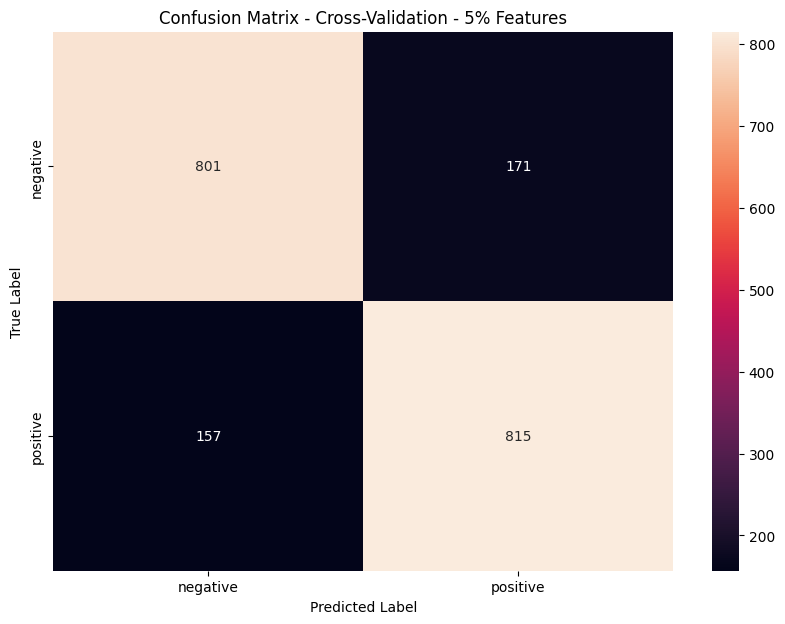

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.82      0.83       972
     Positif       0.83      0.84      0.83       972

    accuracy                           0.83      1944
   macro avg       0.83      0.83      0.83      1944
weighted avg       0.83      0.83      0.83      1944

Cross-Validation Scores (5% features): [0.83547558 0.80205656 0.80719794 0.8714653  0.84020619]
Mean Accuracy: 0.8312803116635304
Standard Deviation: 0.02508422939271793
Test Accuracy: 0.7935323383084577
Test Precision: 0.7933437773015969
Test Recall: 0.7935323383084577
Test F1 Score: 0.7934330616454013


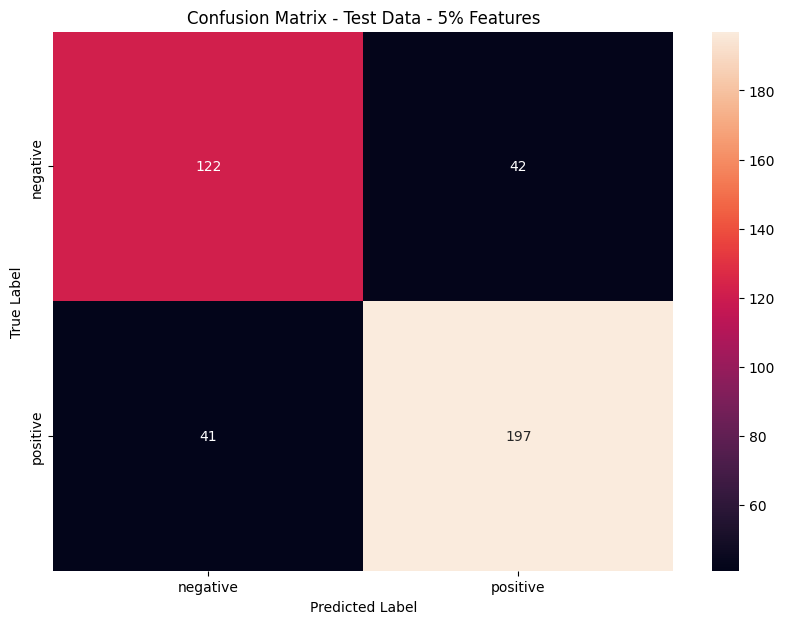

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.75      0.74      0.75       164
     Positif       0.82      0.83      0.83       238

    accuracy                           0.79       402
   macro avg       0.79      0.79      0.79       402
weighted avg       0.79      0.79      0.79       402



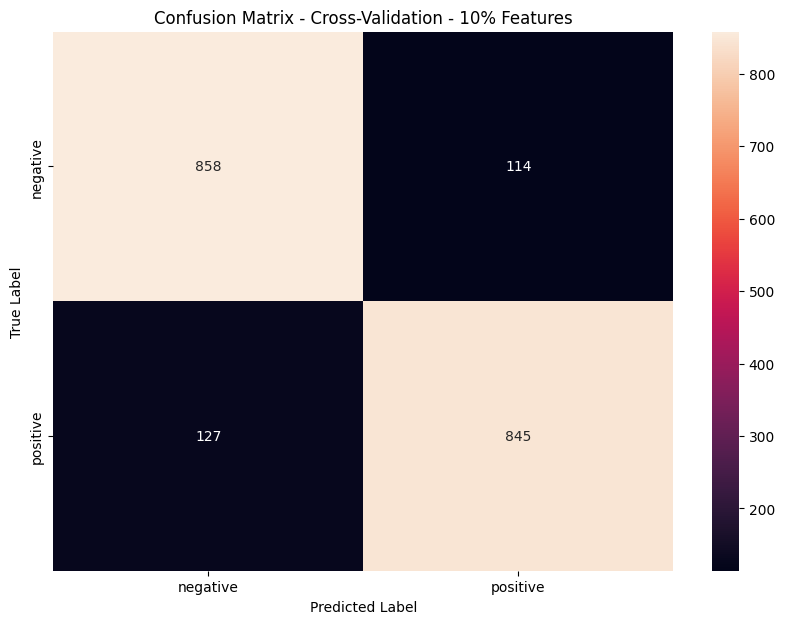

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.88      0.88       972
     Positif       0.88      0.87      0.88       972

    accuracy                           0.88      1944
   macro avg       0.88      0.88      0.88      1944
weighted avg       0.88      0.88      0.88      1944

Cross-Validation Scores (10% features): [0.88946015 0.84575835 0.83290488 0.9151671  0.89690722]
Mean Accuracy: 0.8760395409853444
Standard Deviation: 0.03138180070926578
Test Accuracy: 0.8159203980099502
Test Precision: 0.8163003646257178
Test Recall: 0.8159203980099502
Test F1 Score: 0.8160898613949814


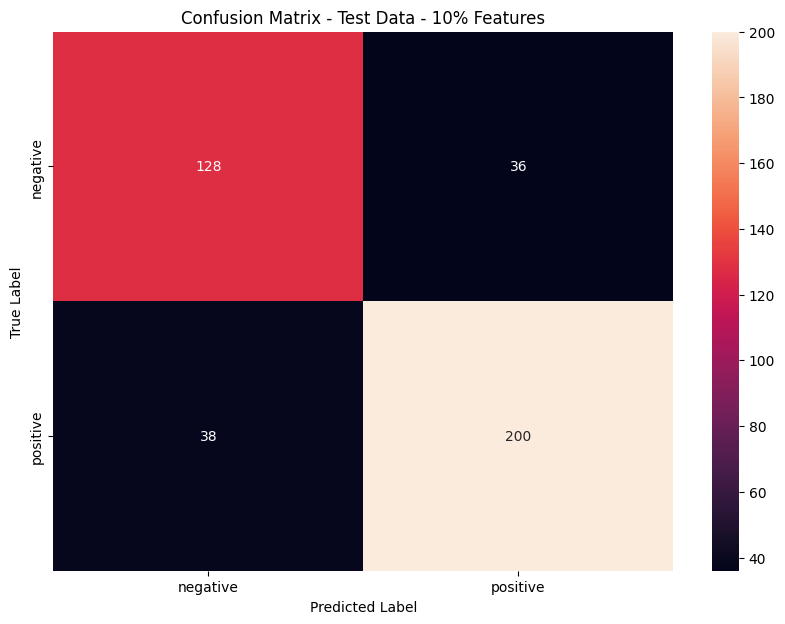

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.77      0.78      0.78       164
     Positif       0.85      0.84      0.84       238

    accuracy                           0.82       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.82      0.82      0.82       402



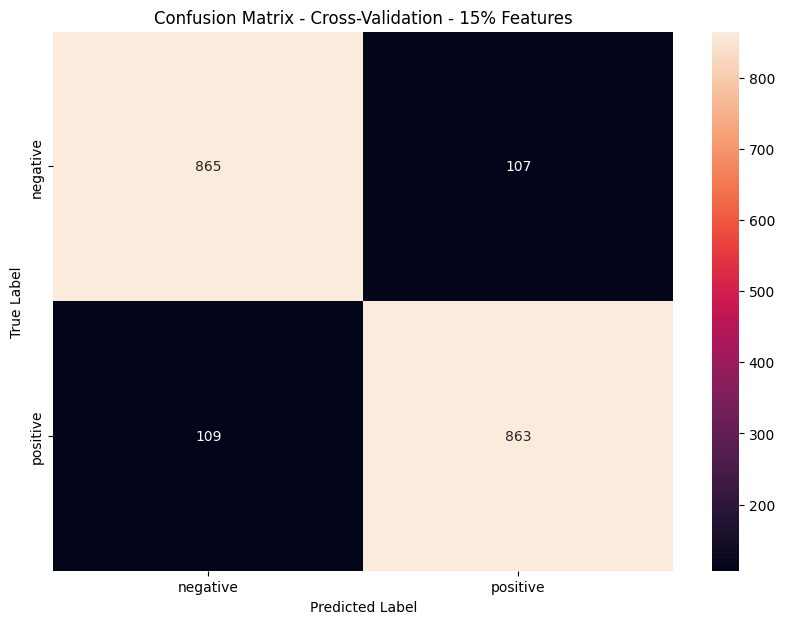

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.89      0.89       972
     Positif       0.89      0.89      0.89       972

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944

Cross-Validation Scores (15% features): [0.88174807 0.8714653  0.85861183 0.9151671  0.91752577]
Mean Accuracy: 0.8889036122227228
Standard Deviation: 0.02358765624505975
Test Accuracy: 0.835820895522388
Test Precision: 0.8351146083217434
Test Recall: 0.835820895522388
Test F1 Score: 0.8351255088195387


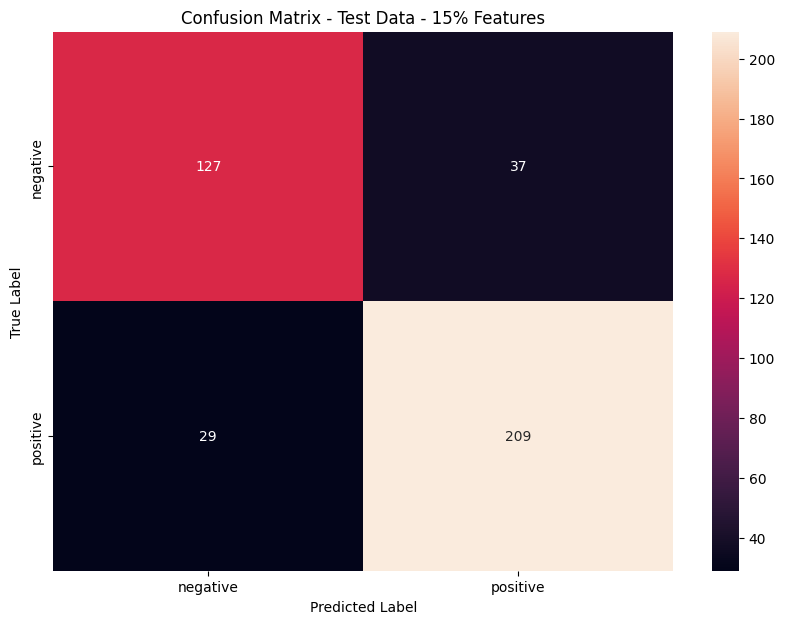

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.81      0.77      0.79       164
     Positif       0.85      0.88      0.86       238

    accuracy                           0.84       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.84      0.84      0.84       402



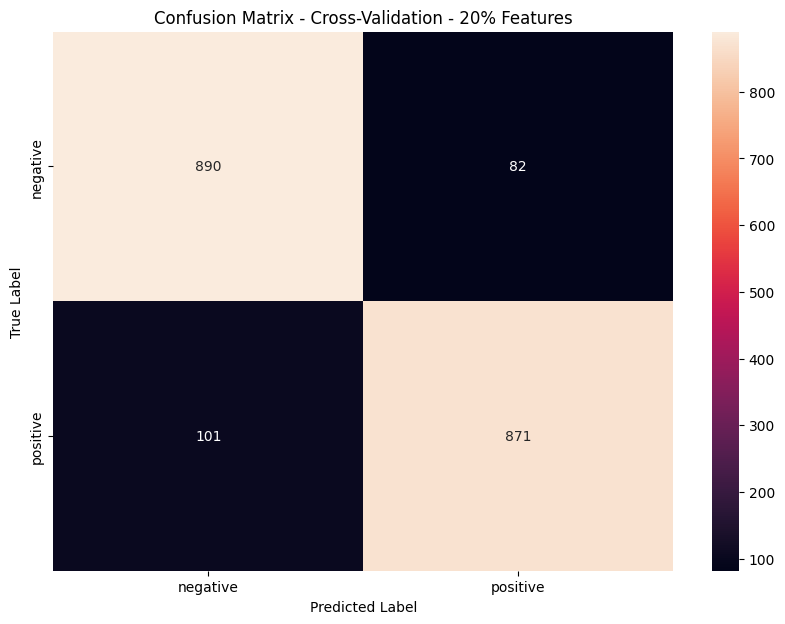

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.91      0.90      0.90       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (20% features): [0.89717224 0.89203085 0.87917738 0.93573265 0.92525773]
Mean Accuracy: 0.9058741684997218
Standard Deviation: 0.021200618302047353
Test Accuracy: 0.8731343283582089
Test Precision: 0.8744290244683018
Test Recall: 0.8731343283582089
Test F1 Score: 0.8735130318556471


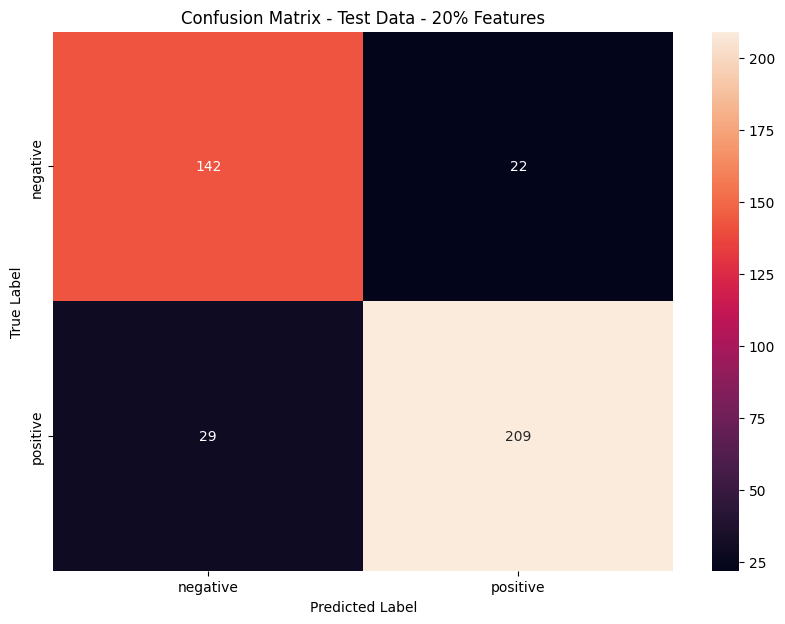

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.87      0.85       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



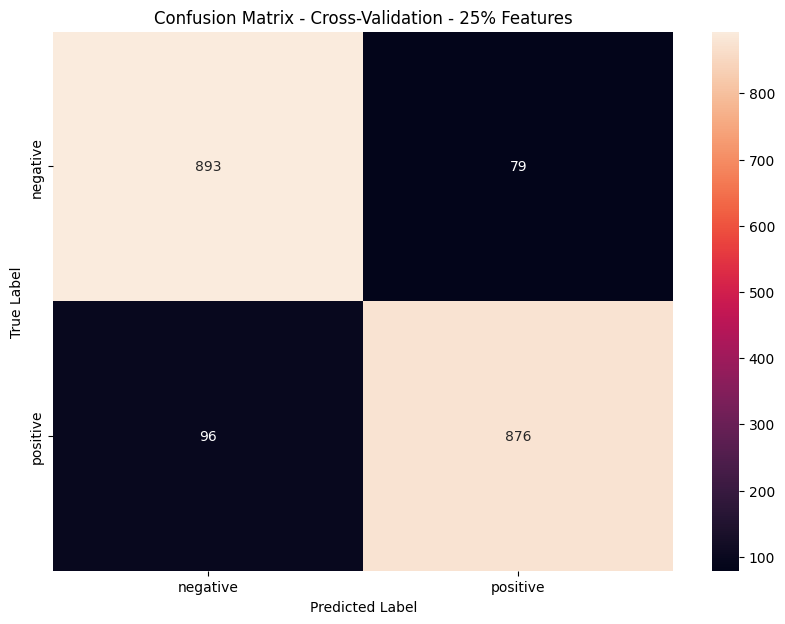

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (25% features): [0.89460154 0.89203085 0.89460154 0.93316195 0.93556701]
Mean Accuracy: 0.9099925794397477
Standard Deviation: 0.019936214510205278
Test Accuracy: 0.8681592039800995
Test Precision: 0.8690123549911767
Test Recall: 0.8681592039800995
Test F1 Score: 0.8684492078350811


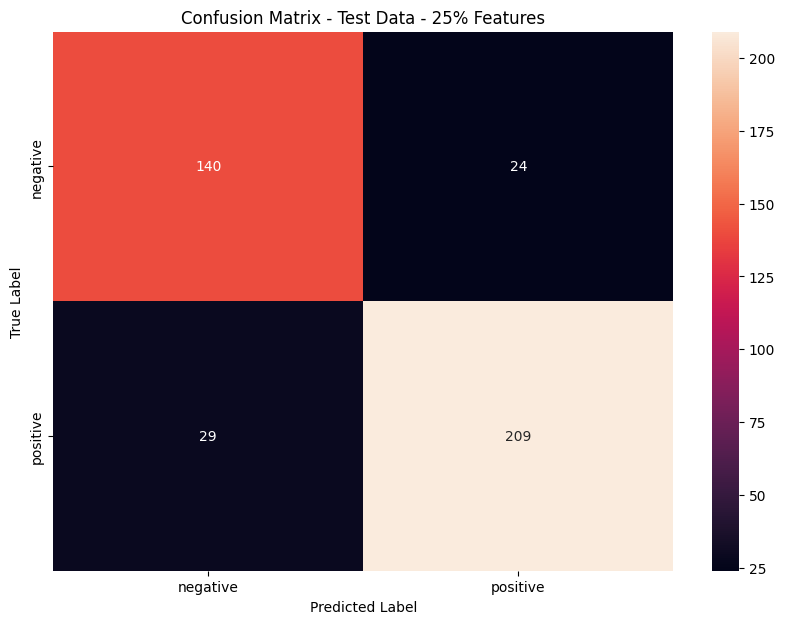

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402



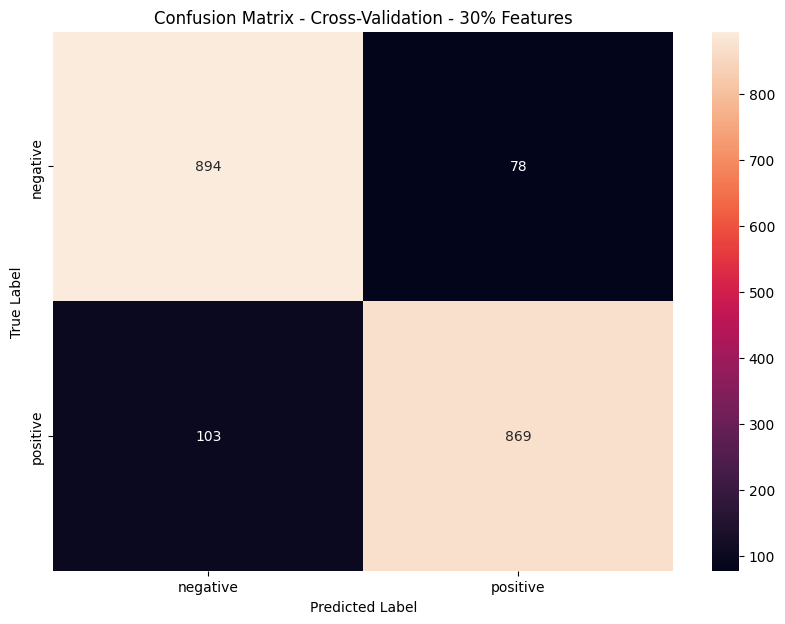

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.89      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (30% features): [0.88946015 0.88946015 0.88946015 0.93316195 0.93298969]
Mean Accuracy: 0.9069064214348183
Standard Deviation: 0.021367295709043287
Test Accuracy: 0.8681592039800995
Test Precision: 0.868616530039318
Test Recall: 0.8681592039800995
Test F1 Score: 0.8683385700471283


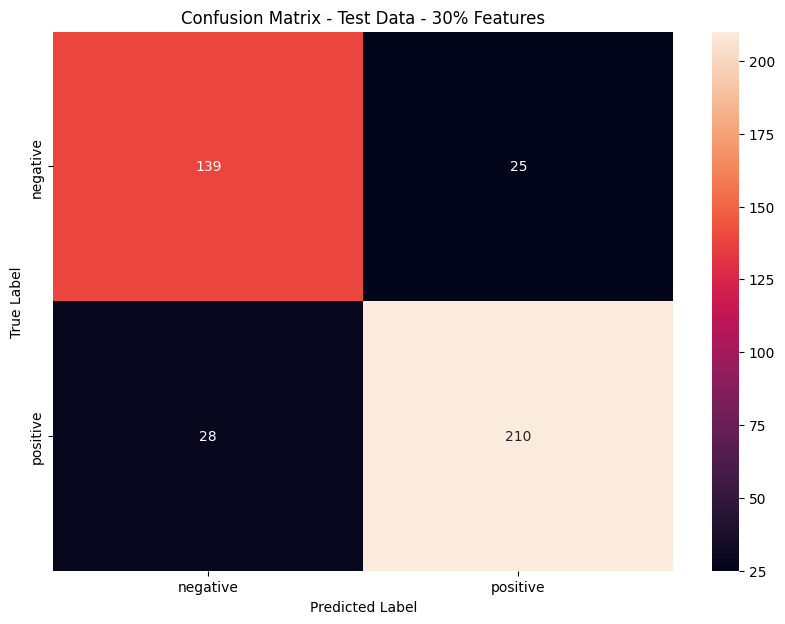

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.89      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



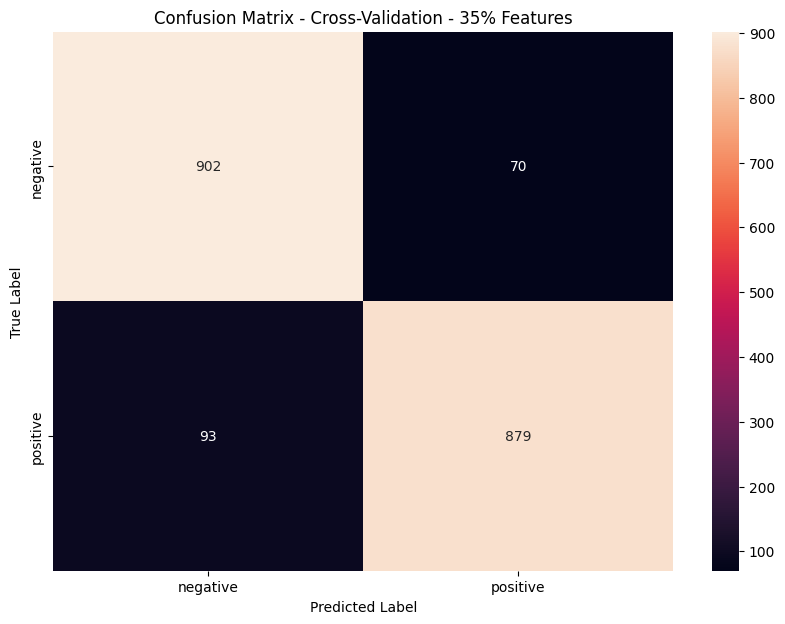

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       972
     Positif       0.93      0.90      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (35% features): [0.89203085 0.88946015 0.89974293 0.95115681 0.94845361]
Mean Accuracy: 0.9161688707497415
Standard Deviation: 0.027684911074274683
Test Accuracy: 0.8855721393034826
Test Precision: 0.8865681733321223
Test Recall: 0.8855721393034826
Test F1 Score: 0.8858695438592489


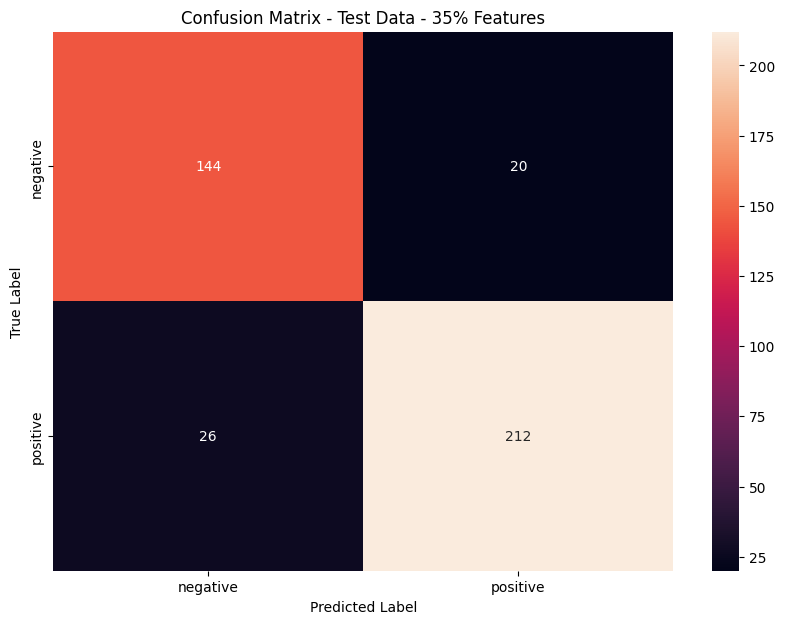

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.88      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



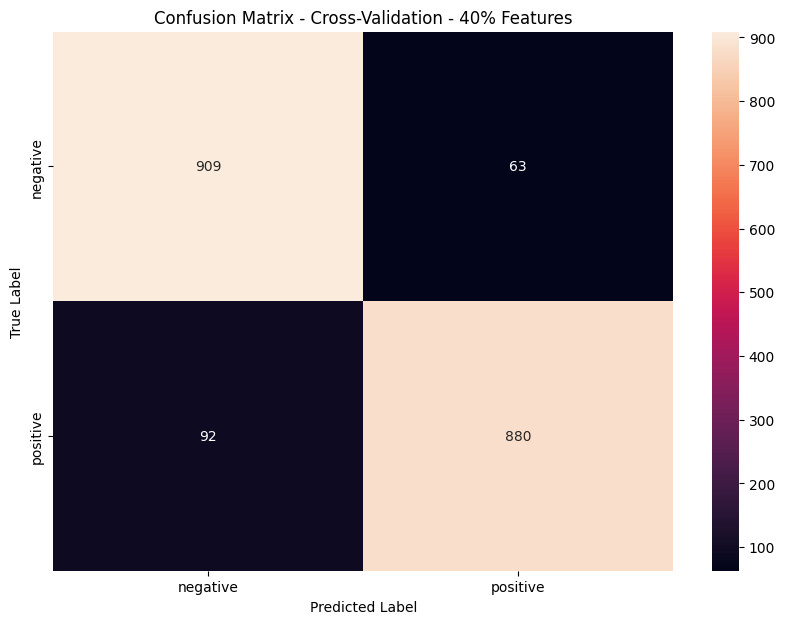

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (40% features): [0.89974293 0.88688946 0.89974293 0.96143959 0.95360825]
Mean Accuracy: 0.9202846314896774
Standard Deviation: 0.03086536667868097
Test Accuracy: 0.8805970149253731
Test Precision: 0.882106152754931
Test Recall: 0.8805970149253731
Test F1 Score: 0.8809979406994332


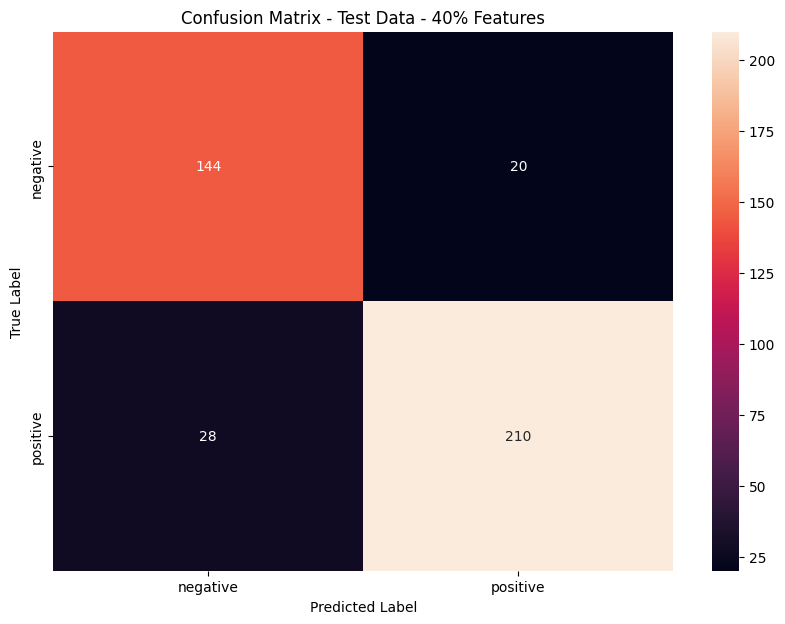

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.88      0.86       164
     Positif       0.91      0.88      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



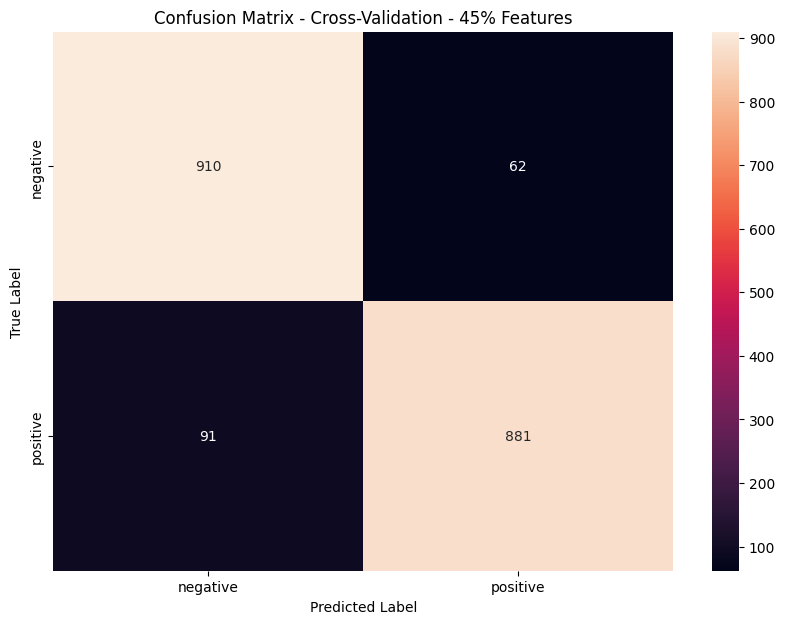

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (45% features): [0.91002571 0.89974293 0.89460154 0.94858612 0.95360825]
Mean Accuracy: 0.9213129091246388
Standard Deviation: 0.02487158551589601
Test Accuracy: 0.8805970149253731
Test Precision: 0.8805970149253731
Test Recall: 0.8805970149253731
Test F1 Score: 0.8805970149253731


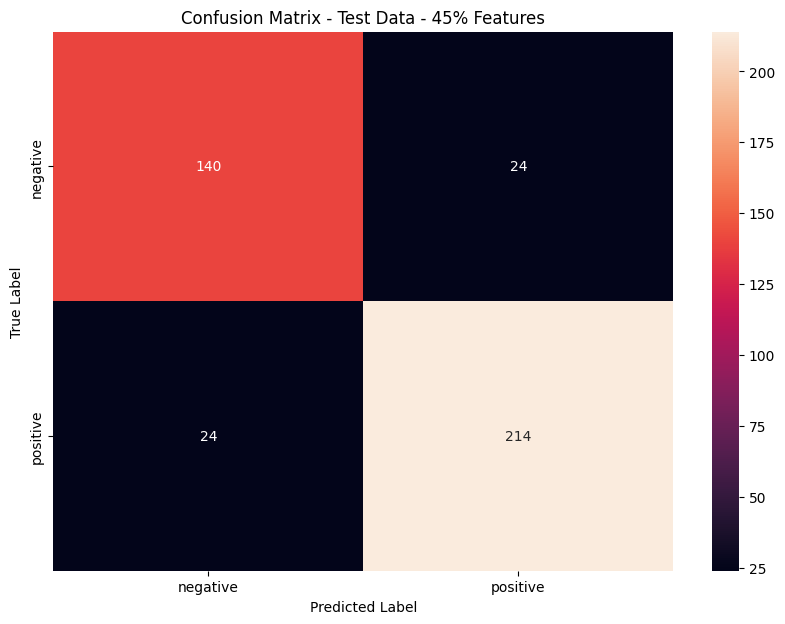

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       164
     Positif       0.90      0.90      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



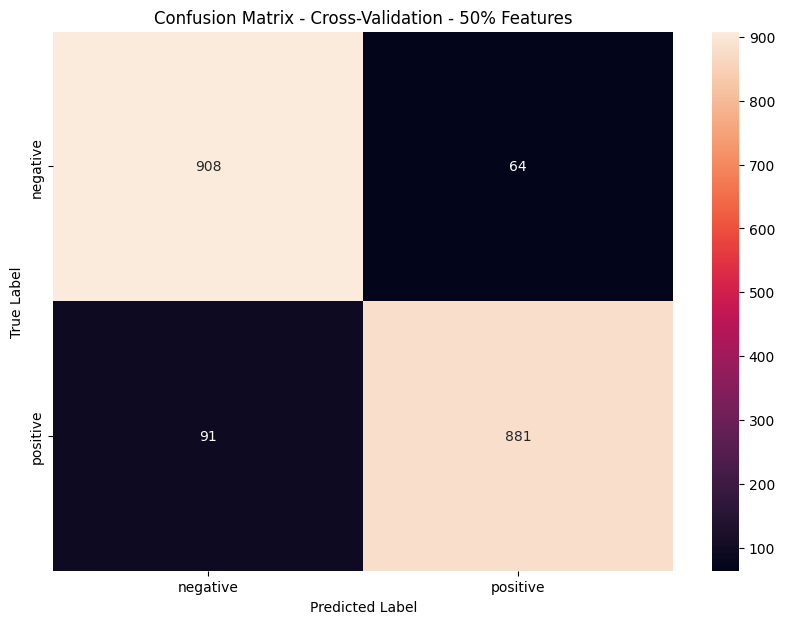

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (50% features): [0.90745501 0.89203085 0.89203085 0.94858612 0.96134021]
Mean Accuracy: 0.9202886067898126
Standard Deviation: 0.029146821190911054
Test Accuracy: 0.8731343283582089
Test Precision: 0.873578723784568
Test Recall: 0.8731343283582089
Test F1 Score: 0.8733069258944066


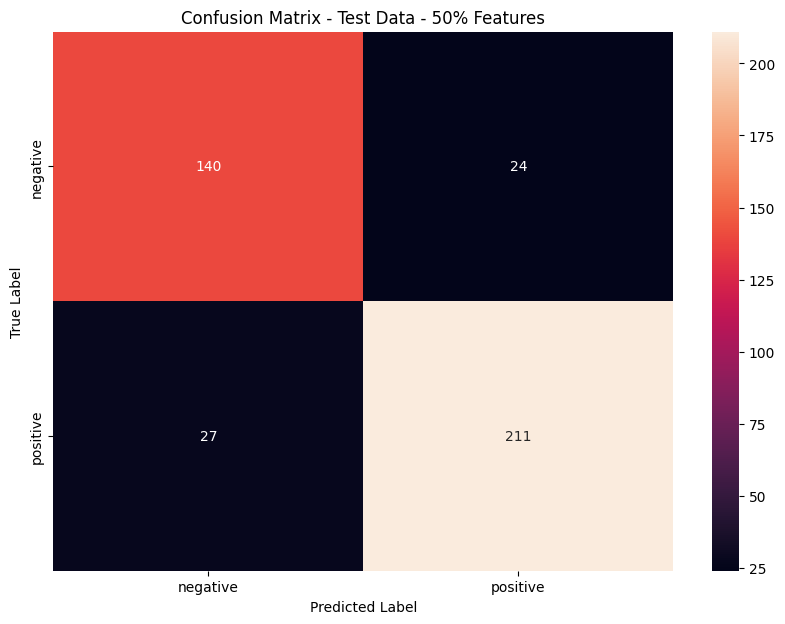

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



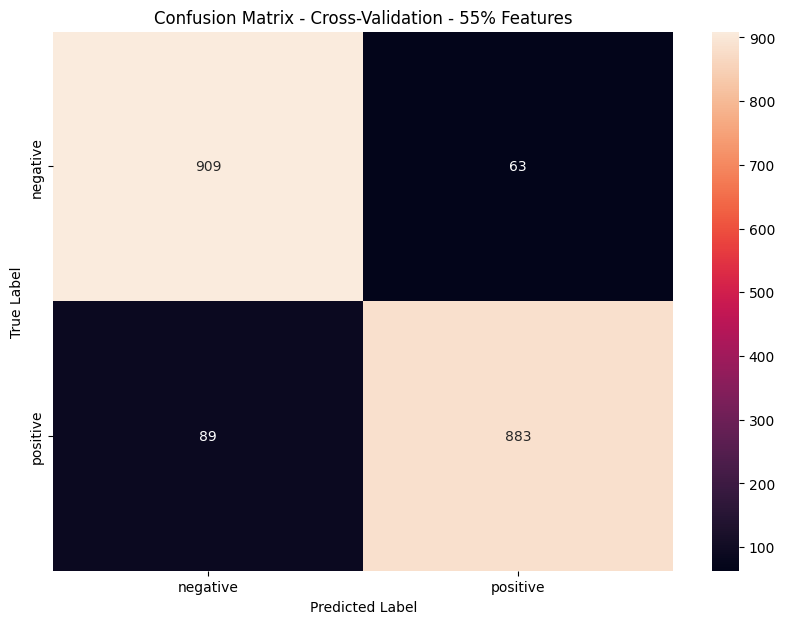

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (55% features): [0.9125964  0.88946015 0.89717224 0.95115681 0.95876289]
Mean Accuracy: 0.9218296981422096
Standard Deviation: 0.028160865040012462
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


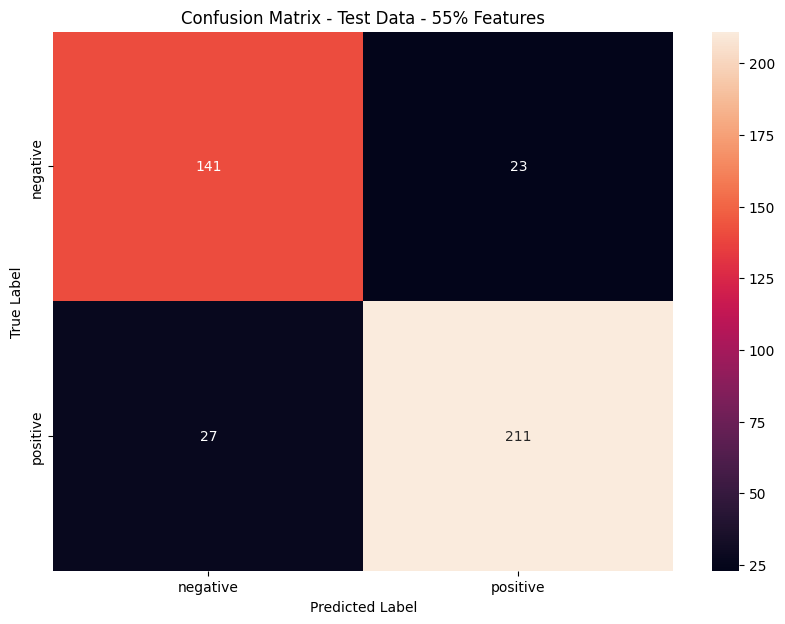

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



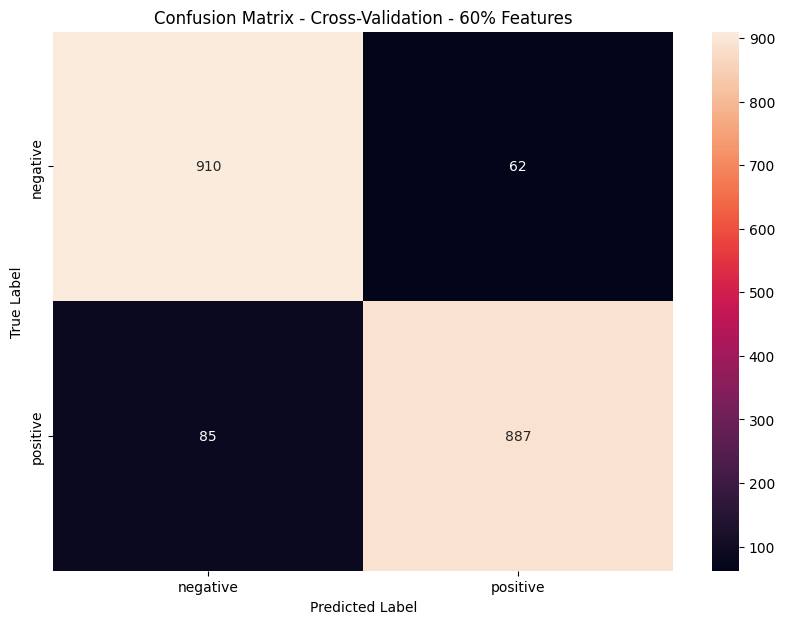

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.93       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (60% features): [0.9125964  0.89974293 0.88946015 0.95372751 0.96649485]
Mean Accuracy: 0.9244043675297485
Standard Deviation: 0.030332053626207597
Test Accuracy: 0.8781094527363185
Test Precision: 0.878540917529818
Test Recall: 0.8781094527363185
Test F1 Score: 0.8782752817416848


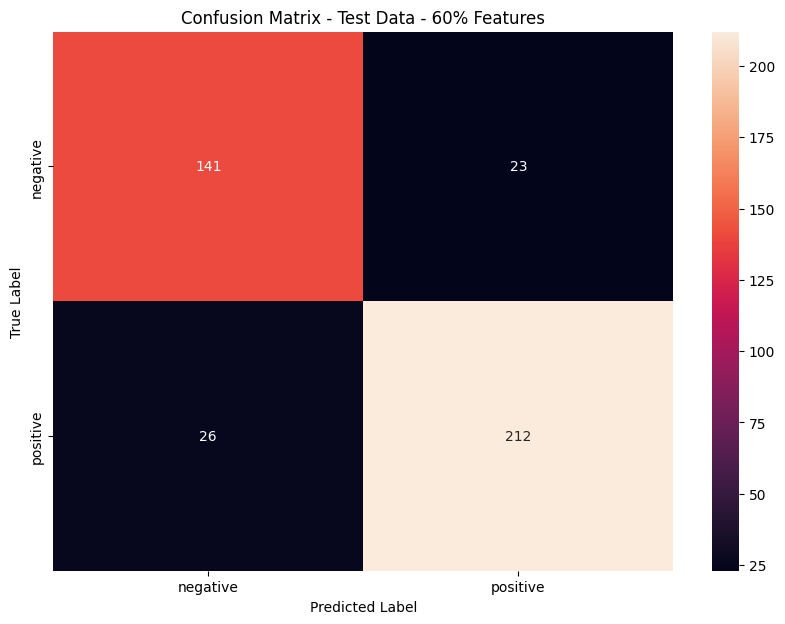

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402



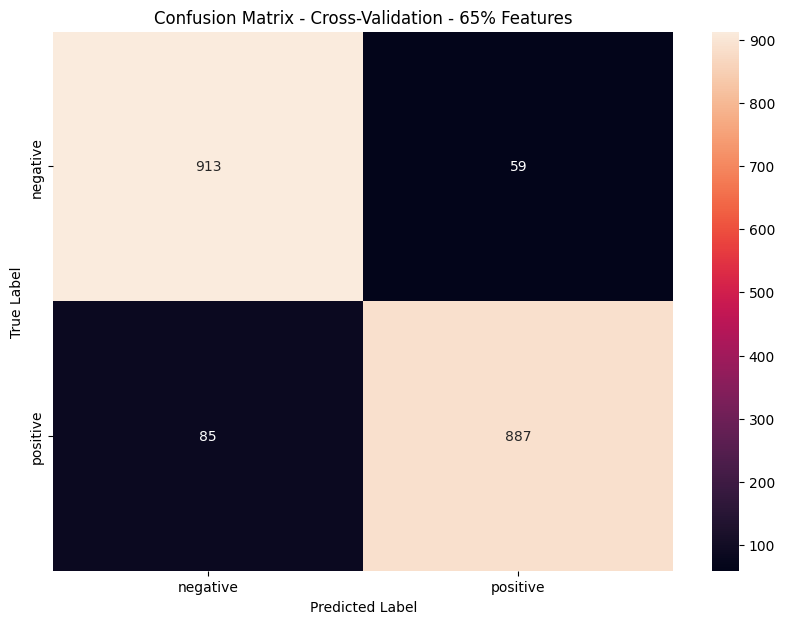

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.93       972
     Positif       0.94      0.91      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (65% features): [0.9125964  0.90745501 0.89203085 0.95372751 0.96391753]
Mean Accuracy: 0.9259454588821455
Standard Deviation: 0.027871185043487897
Test Accuracy: 0.8756218905472637
Test Precision: 0.8758951820436311
Test Recall: 0.8756218905472637
Test F1 Score: 0.8757363928344468


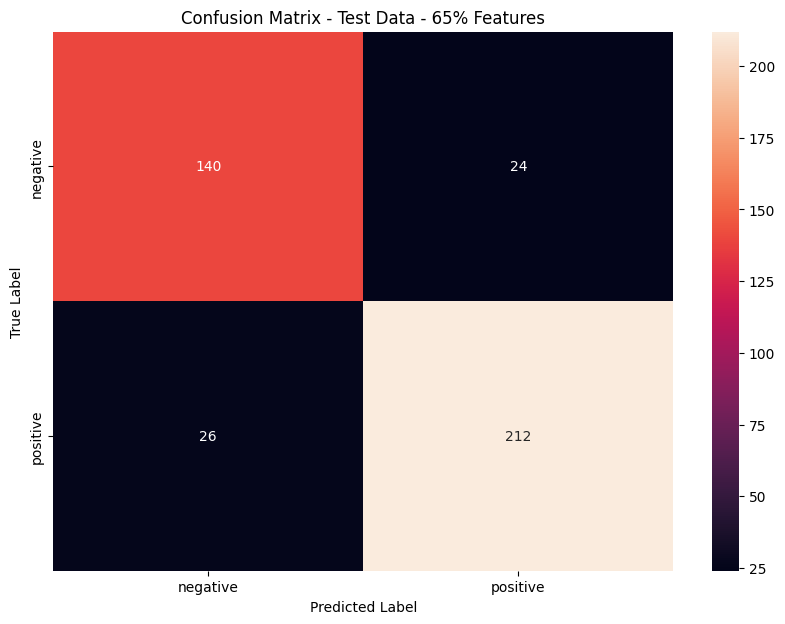

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



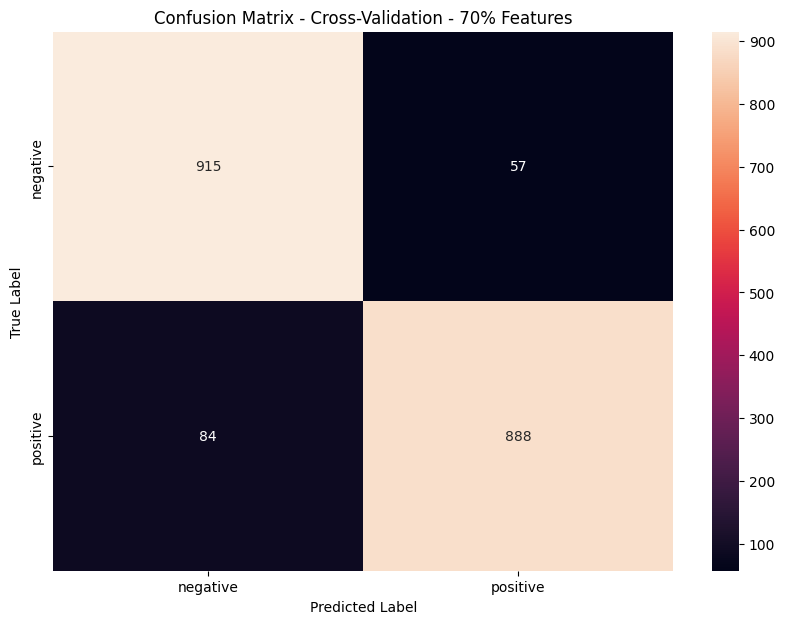

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (70% features): [0.90745501 0.90488432 0.89974293 0.96143959 0.96391753]
Mean Accuracy: 0.9274878753345878
Standard Deviation: 0.02885084601296712
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


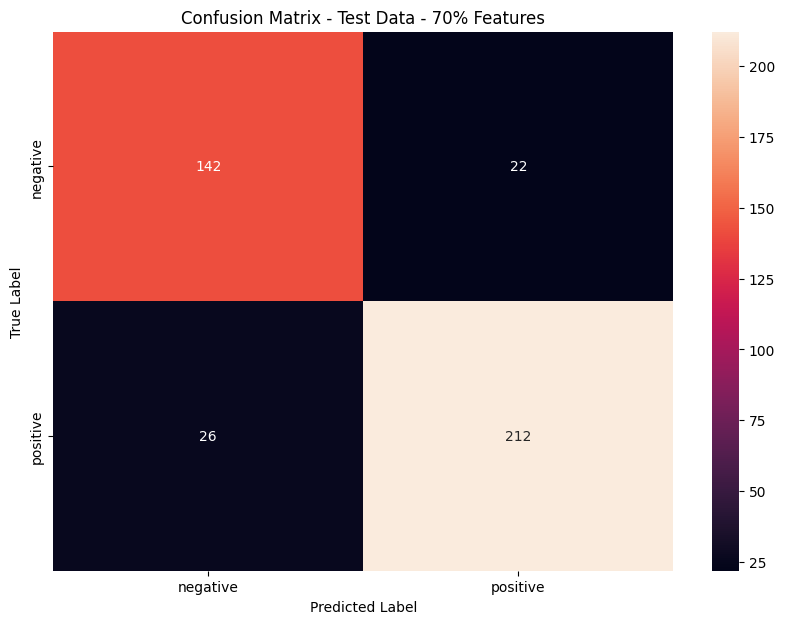

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



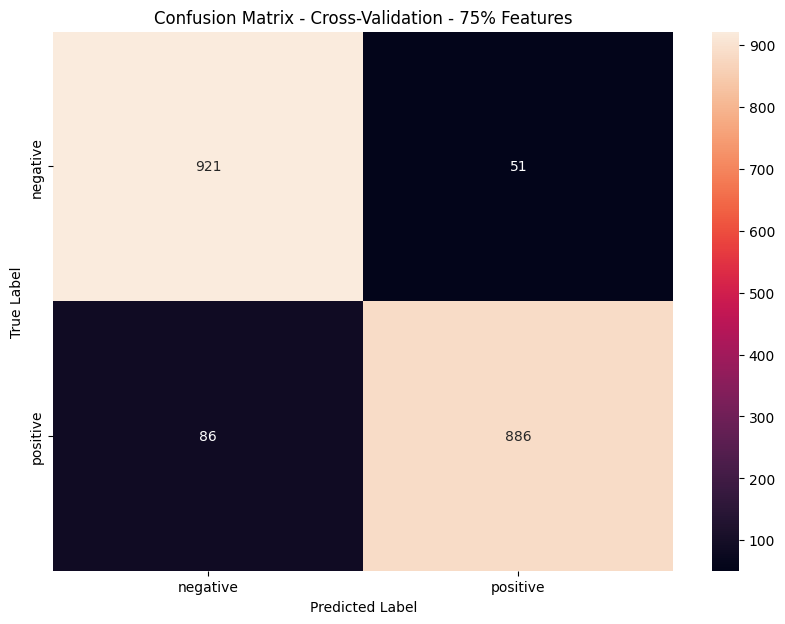

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       972
     Positif       0.95      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (75% features): [0.90488432 0.92030848 0.90488432 0.95372751 0.96391753]
Mean Accuracy: 0.9295444306045108
Standard Deviation: 0.024770449258160288
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


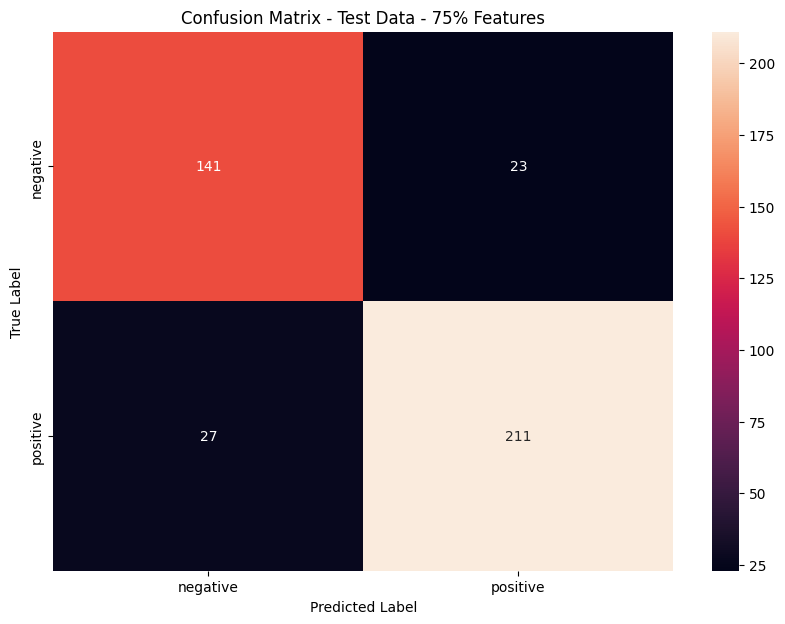

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



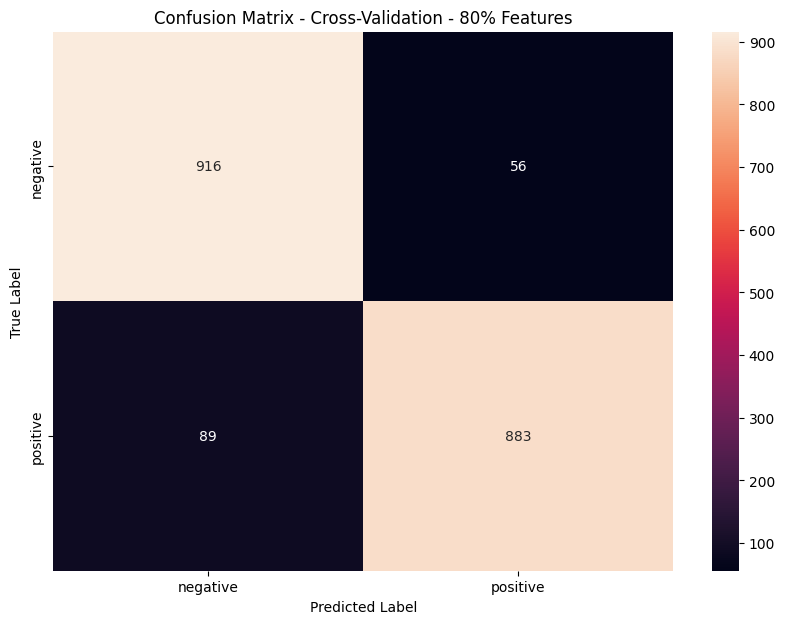

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.93       972
     Positif       0.94      0.91      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (80% features): [0.90488432 0.9151671  0.89717224 0.94858612 0.96134021]
Mean Accuracy: 0.9254299949646198
Standard Deviation: 0.025106581418512804
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


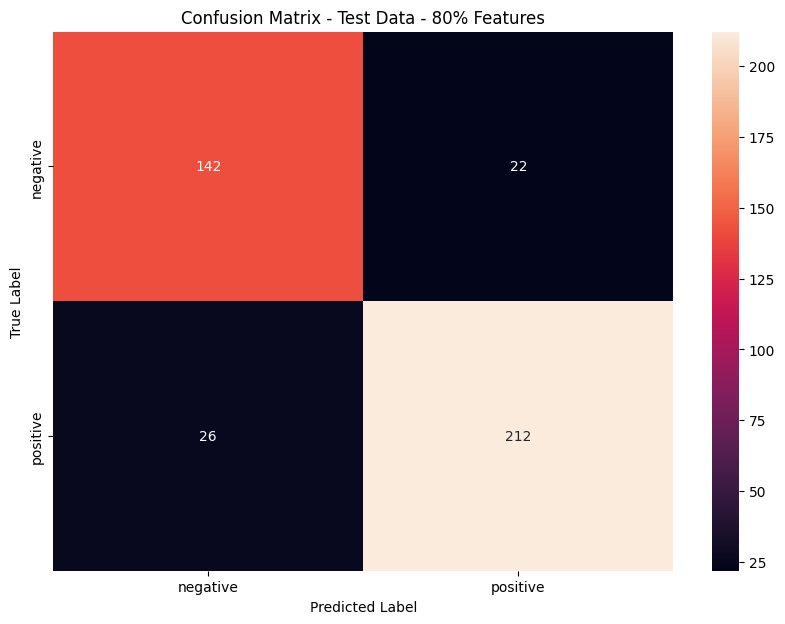

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



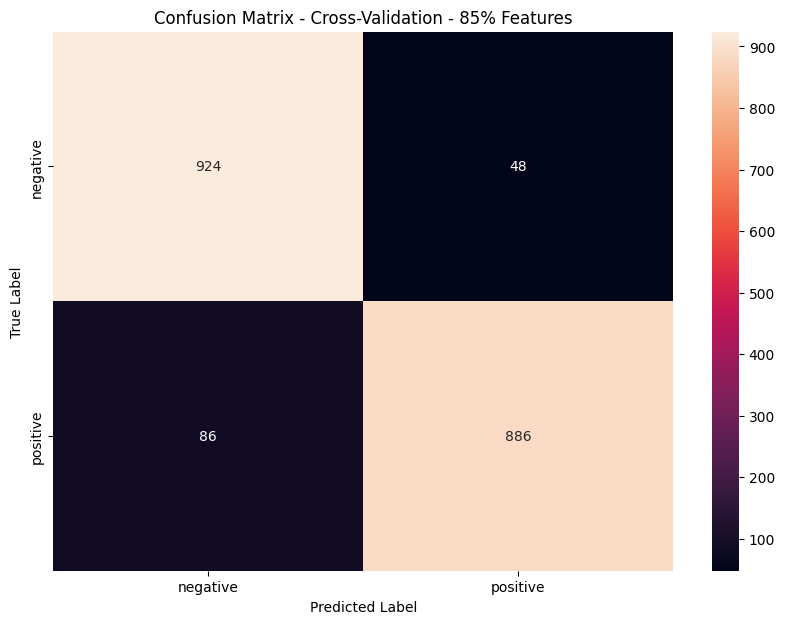

Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       972
     Positif       0.95      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (85% features): [0.9125964  0.92287918 0.90488432 0.94601542 0.96907216]
Mean Accuracy: 0.9310894972570429
Standard Deviation: 0.023501411359285997
Test Accuracy: 0.8930348258706468
Test Precision: 0.8942237245457983
Test Recall: 0.8930348258706468
Test F1 Score: 0.8933541248978986


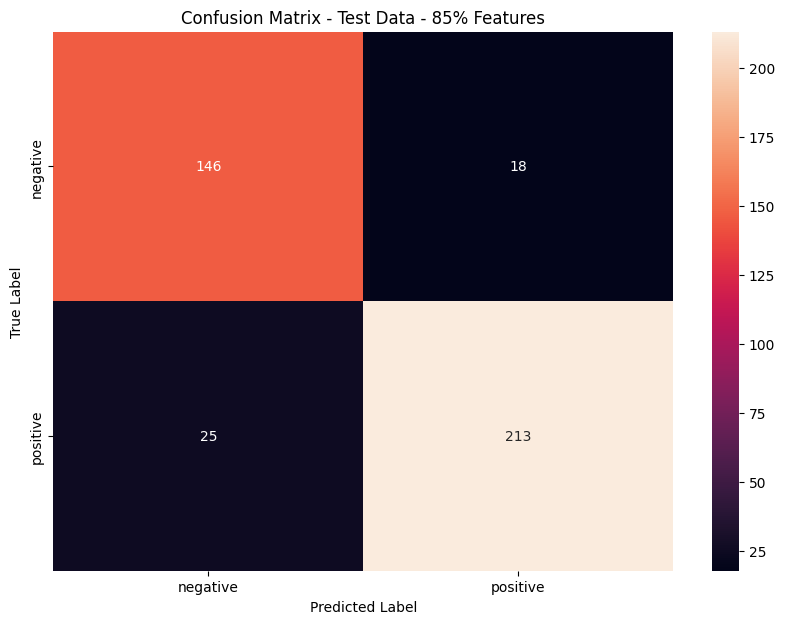

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.89      0.87       164
     Positif       0.92      0.89      0.91       238

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



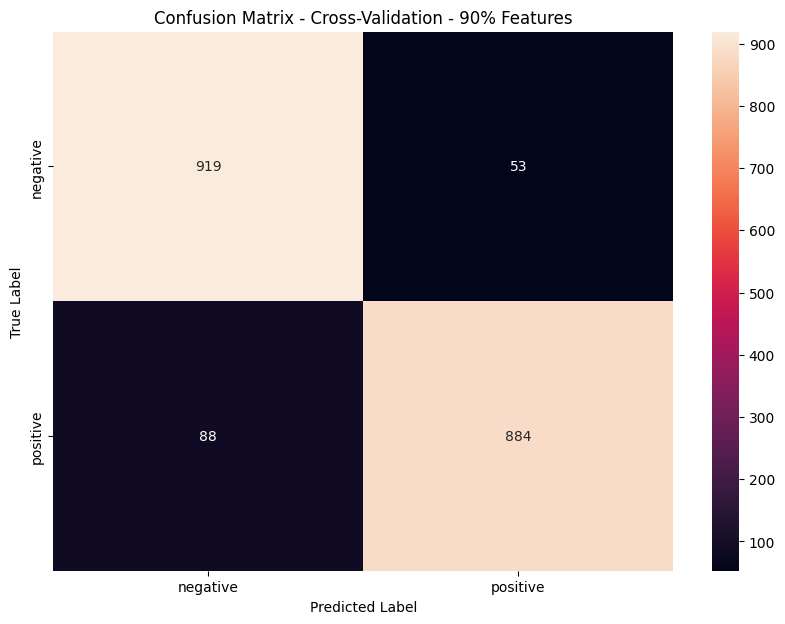

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (90% features): [0.89974293 0.92287918 0.91002571 0.94344473 0.96134021]
Mean Accuracy: 0.9274865502345427
Standard Deviation: 0.02234524955875771
Test Accuracy: 0.900497512437811
Test Precision: 0.9014231580434542
Test Recall: 0.900497512437811
Test F1 Score: 0.9007561250949989


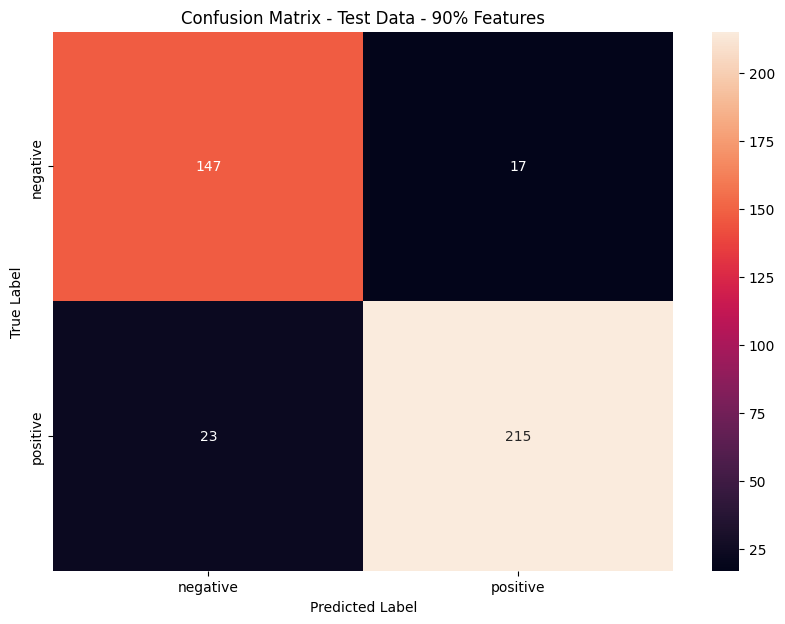

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88       164
     Positif       0.93      0.90      0.91       238

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



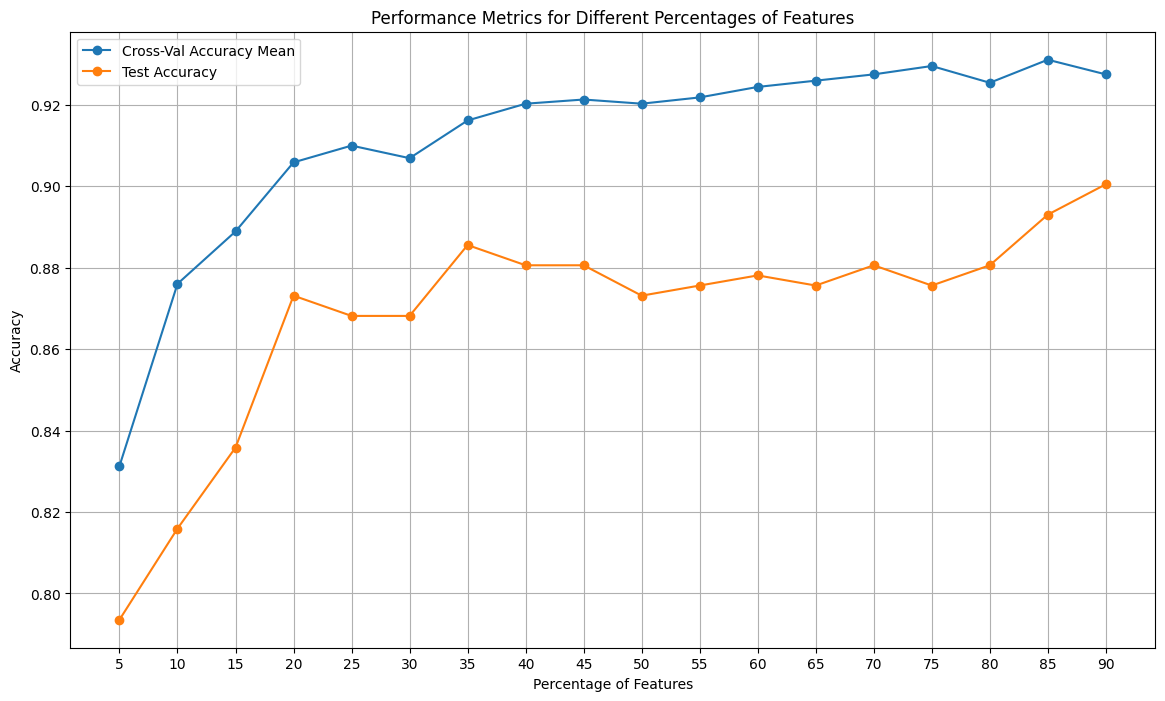

In [76]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)

# Menampilkan hasil SMOTE
print("Sebelum SMOTE:")
print(y_train.value_counts())
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * X_train_resampled.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest dengan Chi-Square
    selector = SelectKBest(chi2, k=num_feature_to_select)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=5
    k = 5
    scores = cross_val_score(modelsvm, X_train_selected, y_train_resampled, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train_selected, y_train_resampled, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train_resampled, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train_selected, y_train_resampled)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test_selected)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

##K=7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


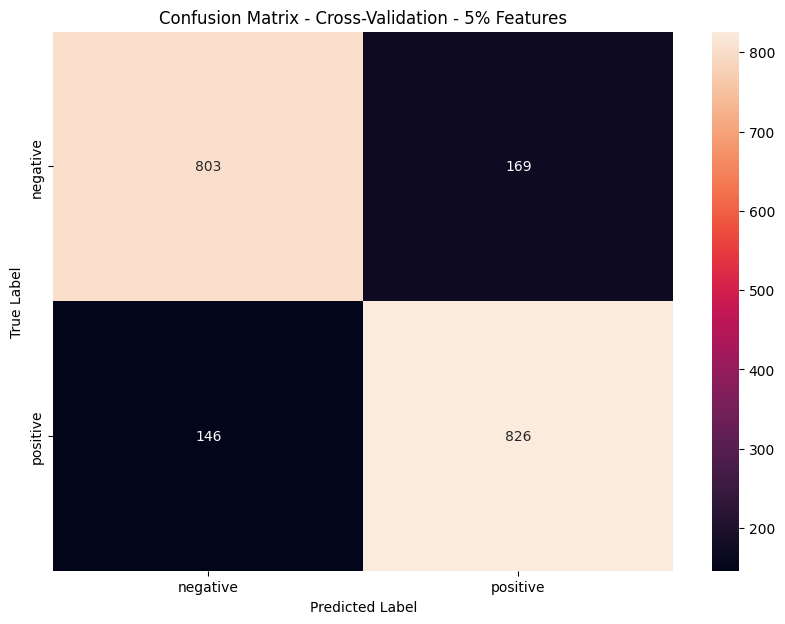

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.83      0.84       972
     Positif       0.83      0.85      0.84       972

    accuracy                           0.84      1944
   macro avg       0.84      0.84      0.84      1944
weighted avg       0.84      0.84      0.84      1944

Cross-Validation Scores (5% features): [0.85611511 0.80215827 0.83093525 0.81654676 0.85971223 0.84837545
 0.85198556]
Mean Accuracy: 0.8379755195328007
Standard Deviation: 0.020345589818599394
Test Accuracy: 0.7935323383084577
Test Precision: 0.7933437773015969
Test Recall: 0.7935323383084577
Test F1 Score: 0.7934330616454013


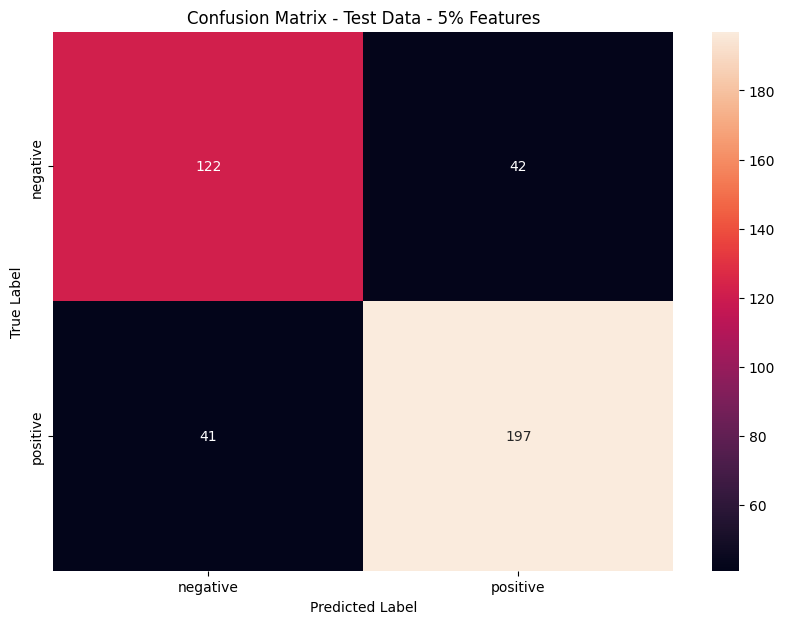

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.75      0.74      0.75       164
     Positif       0.82      0.83      0.83       238

    accuracy                           0.79       402
   macro avg       0.79      0.79      0.79       402
weighted avg       0.79      0.79      0.79       402



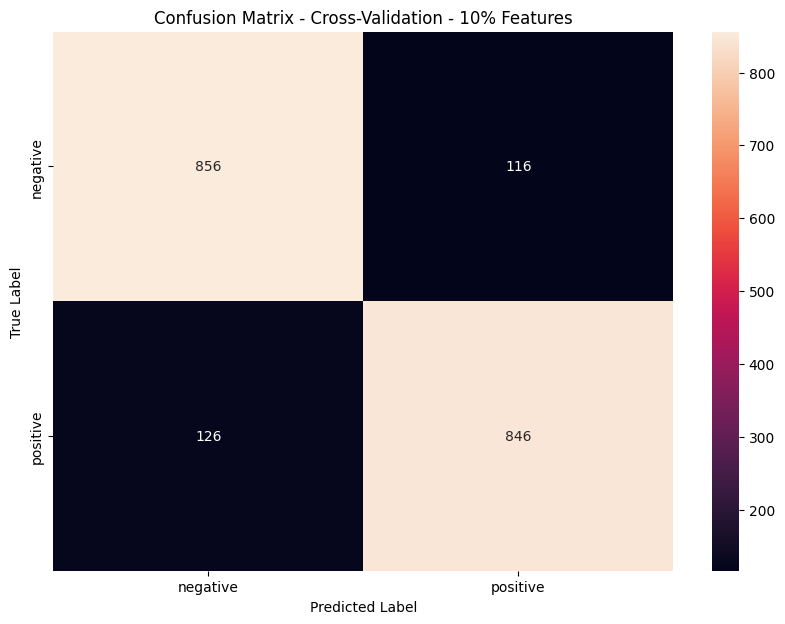

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.88      0.88       972
     Positif       0.88      0.87      0.87       972

    accuracy                           0.88      1944
   macro avg       0.88      0.88      0.88      1944
weighted avg       0.88      0.88      0.88      1944

Cross-Validation Scores (10% features): [0.88129496 0.86330935 0.85251799 0.83453237 0.90647482 0.89530686
 0.89530686]
Mean Accuracy: 0.87553474497349
Standard Deviation: 0.02429805173539142
Test Accuracy: 0.8159203980099502
Test Precision: 0.8163003646257178
Test Recall: 0.8159203980099502
Test F1 Score: 0.8160898613949814


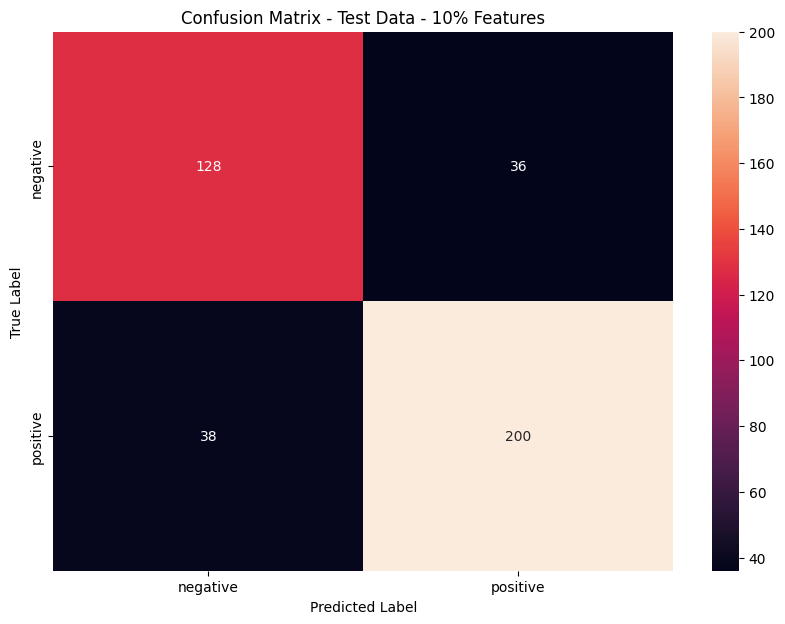

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.77      0.78      0.78       164
     Positif       0.85      0.84      0.84       238

    accuracy                           0.82       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.82      0.82      0.82       402



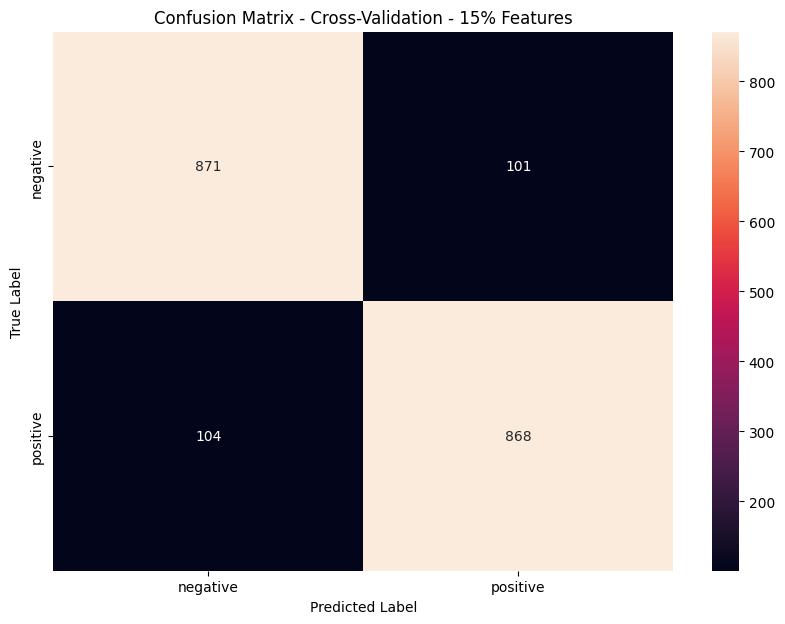

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.90      0.89       972
     Positif       0.90      0.89      0.89       972

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944

Cross-Validation Scores (15% features): [0.9028777  0.87769784 0.88129496 0.85611511 0.91366906 0.90613718
 0.92418773]
Mean Accuracy: 0.894568512286612
Standard Deviation: 0.02198855725912327
Test Accuracy: 0.835820895522388
Test Precision: 0.8351146083217434
Test Recall: 0.835820895522388
Test F1 Score: 0.8351255088195387


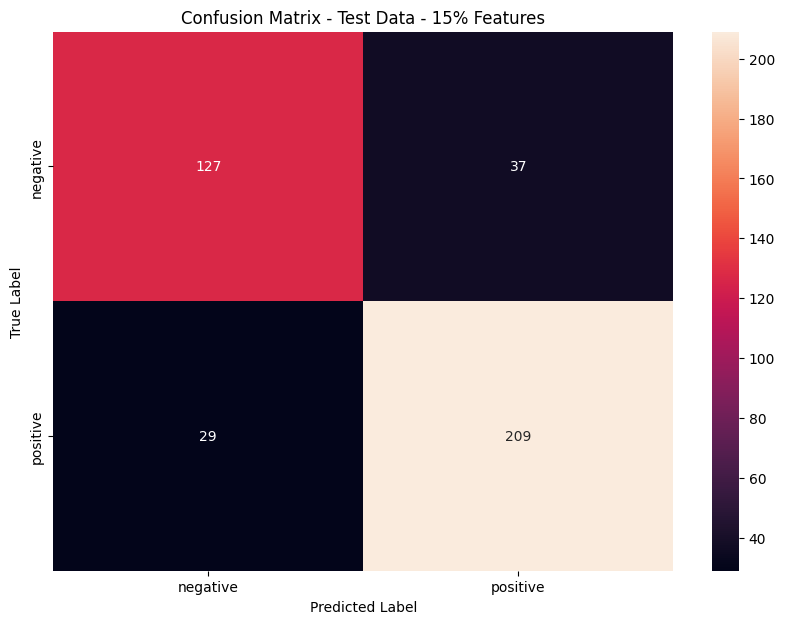

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.81      0.77      0.79       164
     Positif       0.85      0.88      0.86       238

    accuracy                           0.84       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.84      0.84      0.84       402



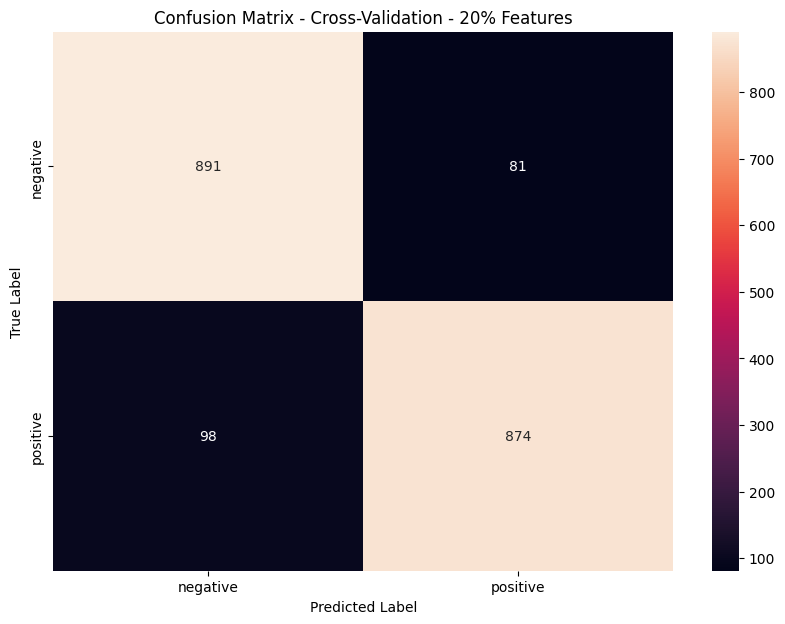

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (20% features): [0.90647482 0.89208633 0.91007194 0.88129496 0.92446043 0.9133574
 0.92779783]
Mean Accuracy: 0.907934817695096
Standard Deviation: 0.015420741915461443
Test Accuracy: 0.8731343283582089
Test Precision: 0.8744290244683018
Test Recall: 0.8731343283582089
Test F1 Score: 0.8735130318556471


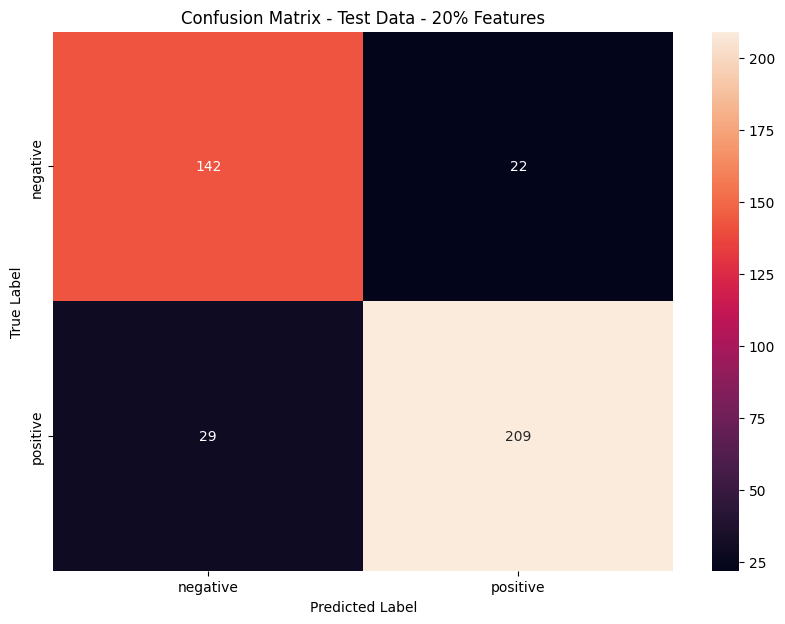

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.87      0.85       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



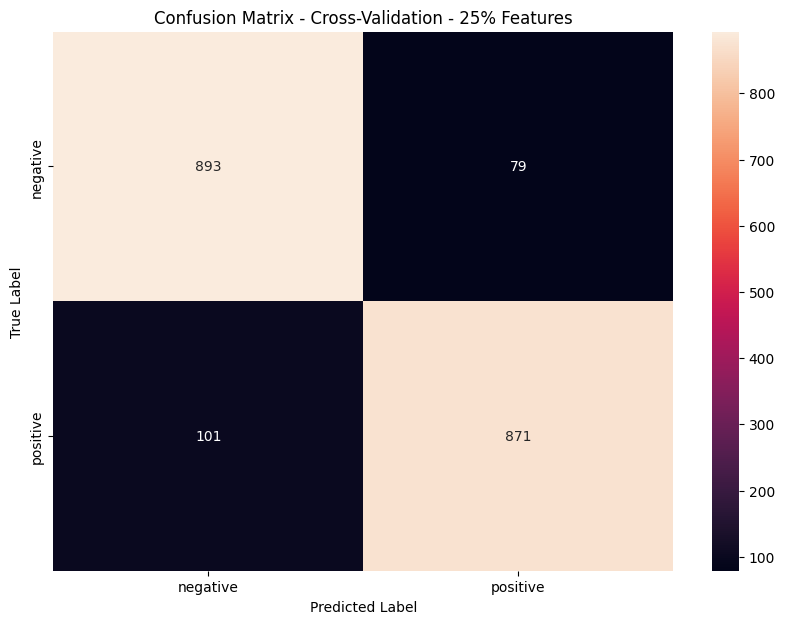

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (25% features): [0.89928058 0.89568345 0.90647482 0.88489209 0.92446043 0.9133574
 0.92779783]
Mean Accuracy: 0.907420943080502
Standard Deviation: 0.014408738259758977
Test Accuracy: 0.8681592039800995
Test Precision: 0.8690123549911767
Test Recall: 0.8681592039800995
Test F1 Score: 0.8684492078350811


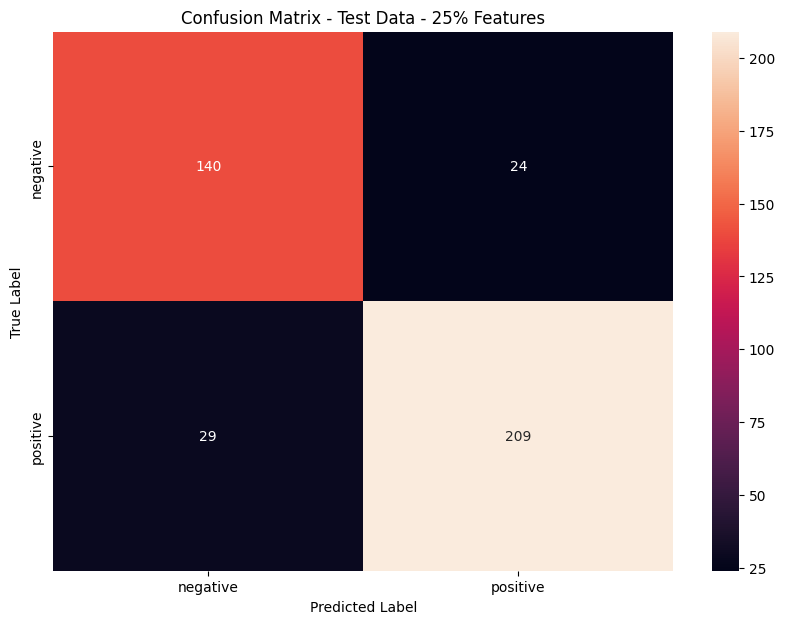

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402



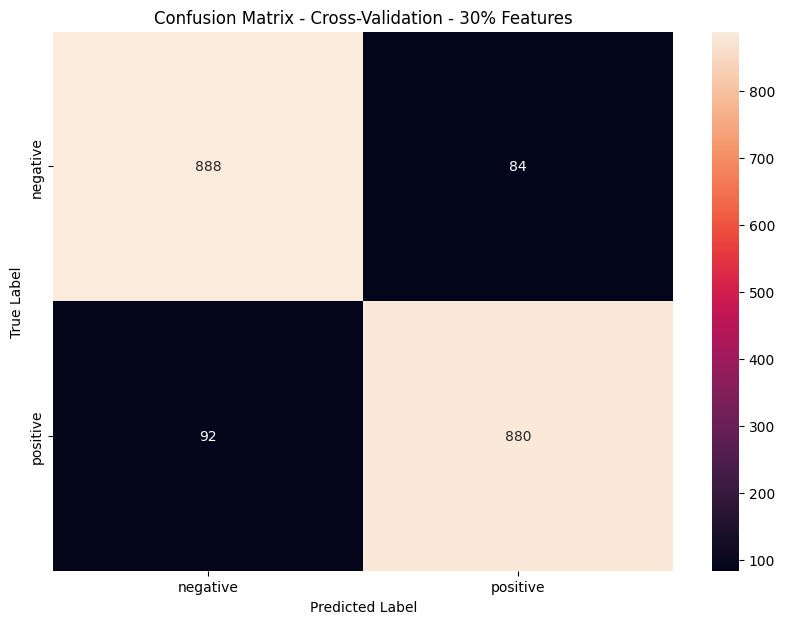

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.91      0.91       972
     Positif       0.91      0.91      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (30% features): [0.89928058 0.89568345 0.91366906 0.87769784 0.91726619 0.93501805
 0.92779783]
Mean Accuracy: 0.909487572396956
Standard Deviation: 0.0184018096268586
Test Accuracy: 0.8681592039800995
Test Precision: 0.868616530039318
Test Recall: 0.8681592039800995
Test F1 Score: 0.8683385700471283


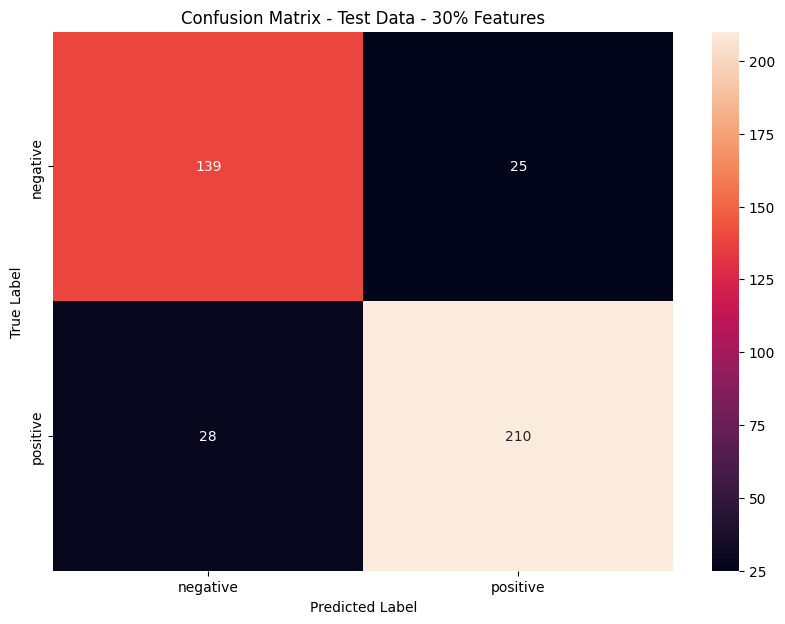

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.89      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



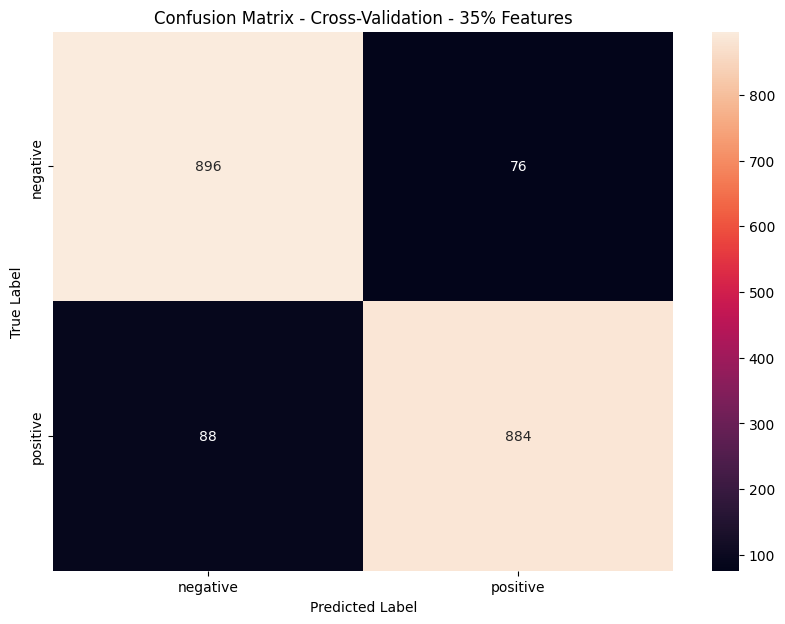

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.92      0.92       972
     Positif       0.92      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (35% features): [0.9028777  0.89208633 0.91007194 0.88489209 0.92086331 0.9566787
 0.94223827]
Mean Accuracy: 0.9156726192022143
Standard Deviation: 0.02423989450065085
Test Accuracy: 0.8855721393034826
Test Precision: 0.8865681733321223
Test Recall: 0.8855721393034826
Test F1 Score: 0.8858695438592489


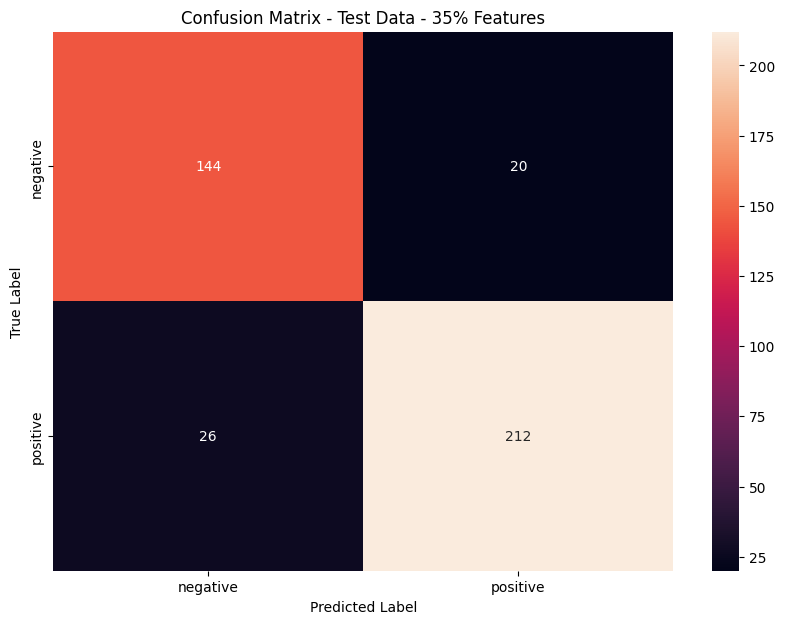

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.88      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



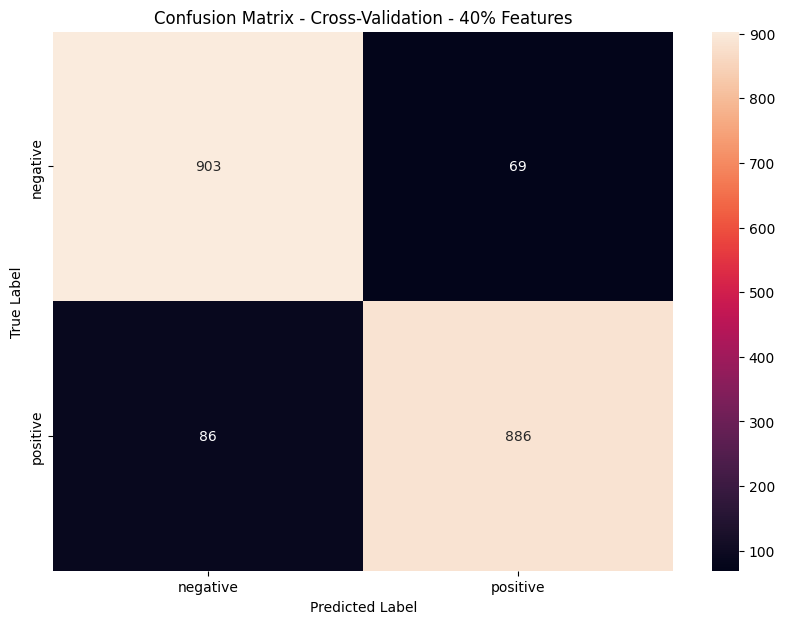

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (40% features): [0.91366906 0.89568345 0.91007194 0.88848921 0.93165468 0.96028881
 0.94223827]
Mean Accuracy: 0.9202993458765737
Standard Deviation: 0.023832164158488645
Test Accuracy: 0.8805970149253731
Test Precision: 0.882106152754931
Test Recall: 0.8805970149253731
Test F1 Score: 0.8809979406994332


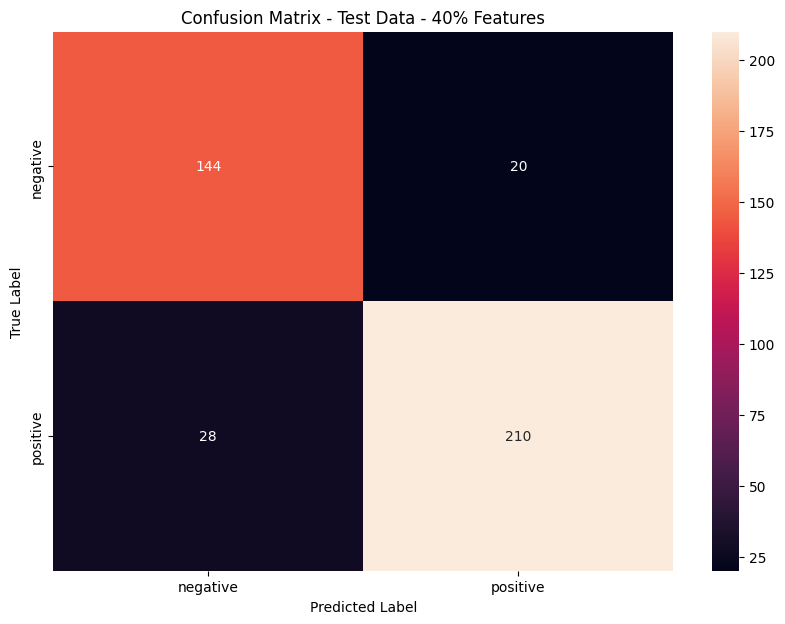

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.88      0.86       164
     Positif       0.91      0.88      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



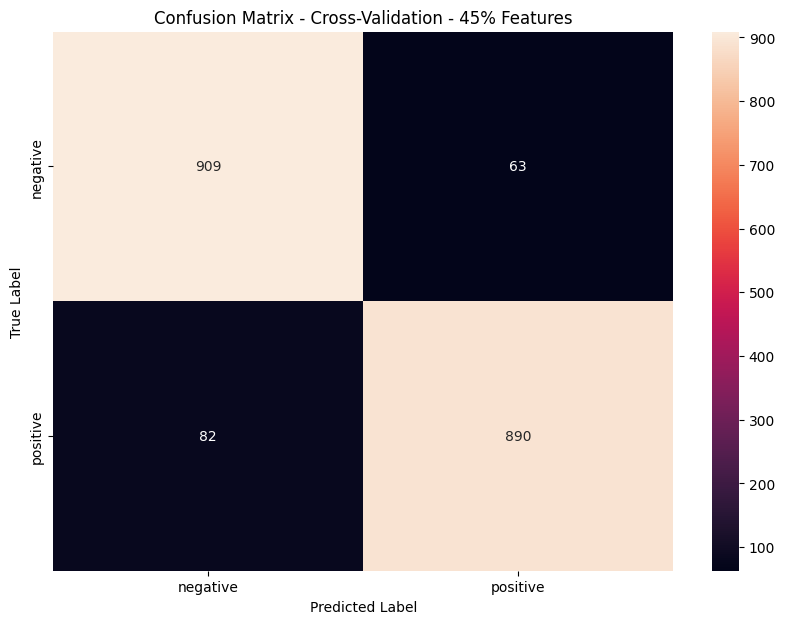

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (45% features): [0.92086331 0.89208633 0.92805755 0.89928058 0.92086331 0.96028881
 0.9566787 ]
Mean Accuracy: 0.925445512594566
Standard Deviation: 0.024011372794414787
Test Accuracy: 0.8805970149253731
Test Precision: 0.8805970149253731
Test Recall: 0.8805970149253731
Test F1 Score: 0.8805970149253731


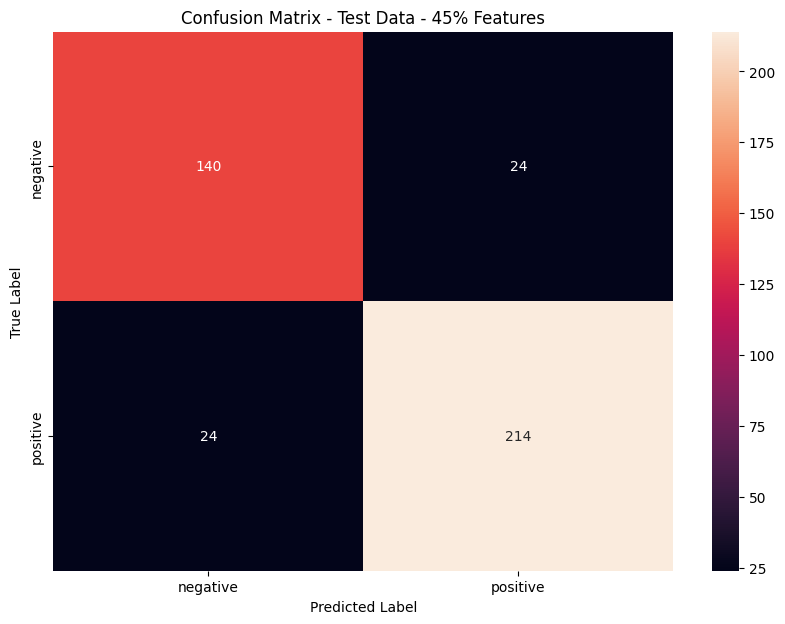

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       164
     Positif       0.90      0.90      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



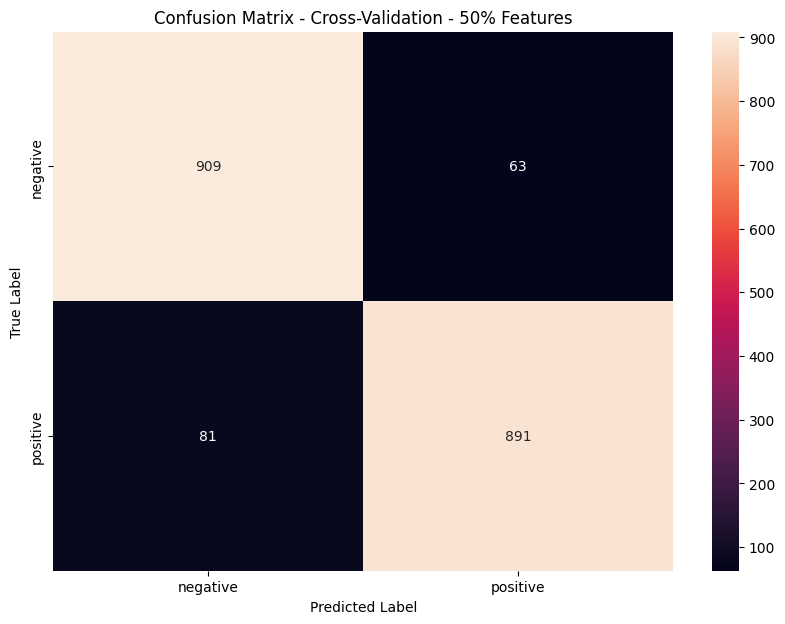

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (50% features): [0.92086331 0.90647482 0.92086331 0.89568345 0.91726619 0.96389892
 0.9566787 ]
Mean Accuracy: 0.925961242352173
Standard Deviation: 0.02332036625031277
Test Accuracy: 0.8731343283582089
Test Precision: 0.873578723784568
Test Recall: 0.8731343283582089
Test F1 Score: 0.8733069258944066


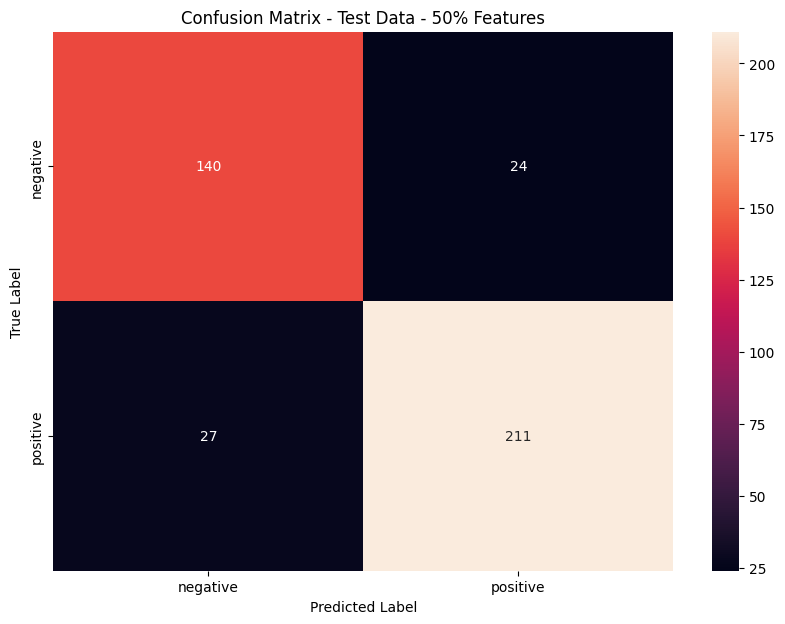

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



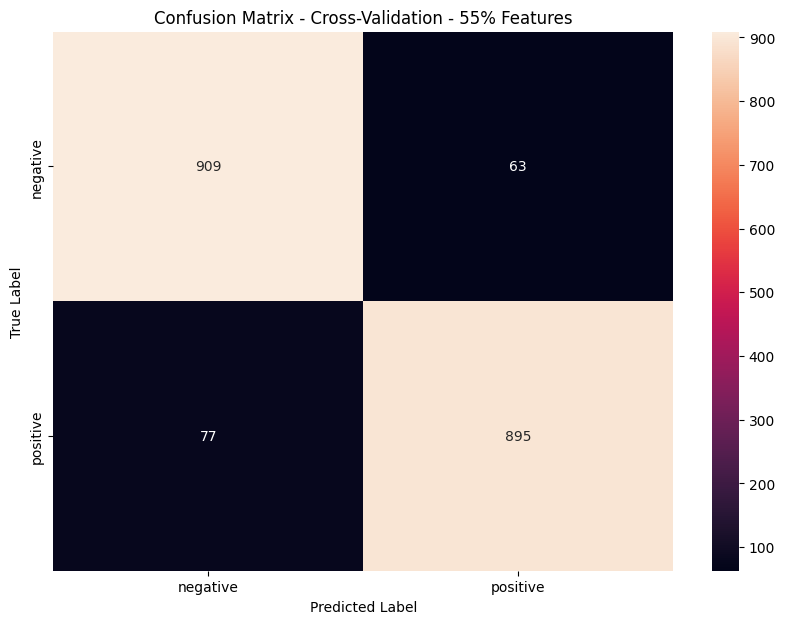

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (55% features): [0.92805755 0.91007194 0.91726619 0.89568345 0.92446043 0.96389892
 0.9566787 ]
Mean Accuracy: 0.9280167408105492
Standard Deviation: 0.02269272750507551
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


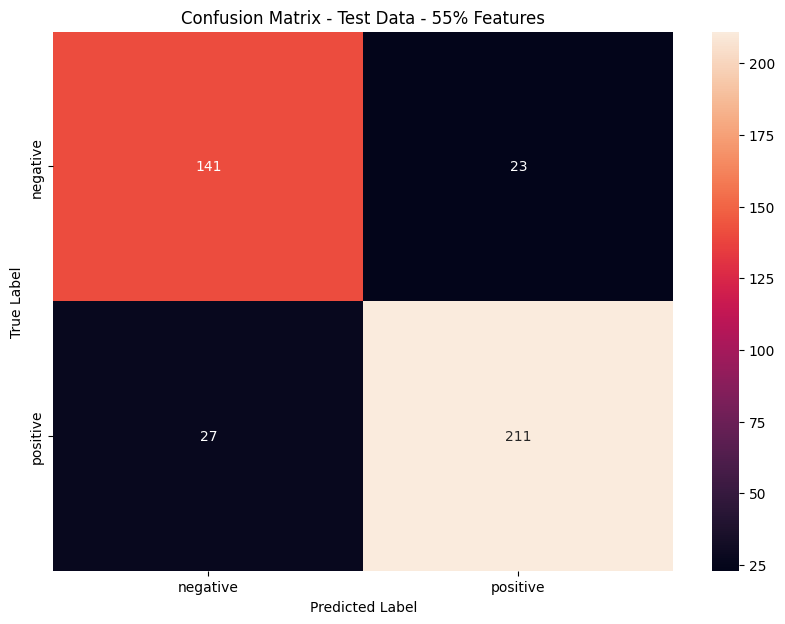

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



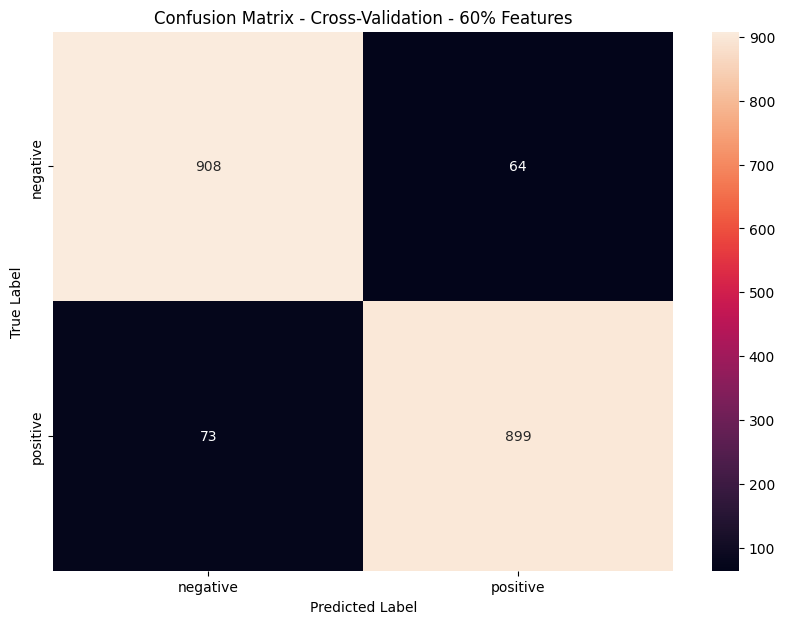

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (60% features): [0.92805755 0.90647482 0.92446043 0.88848921 0.93165468 0.96750903
 0.96028881]
Mean Accuracy: 0.9295620749403571
Standard Deviation: 0.02573706114128603
Test Accuracy: 0.8781094527363185
Test Precision: 0.878540917529818
Test Recall: 0.8781094527363185
Test F1 Score: 0.8782752817416848


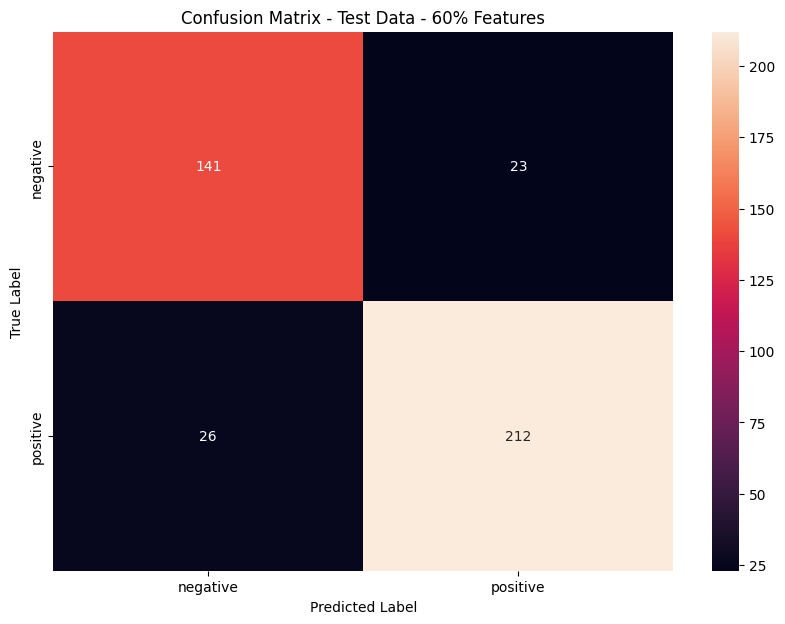

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402



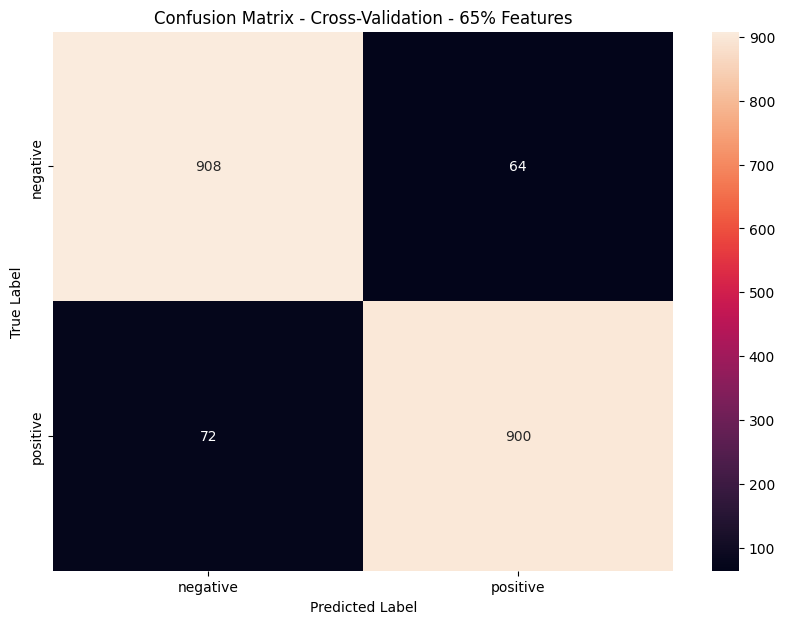

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       972
     Positif       0.93      0.93      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (65% features): [0.92805755 0.90647482 0.91726619 0.89568345 0.93165468 0.97111913
 0.96028881]
Mean Accuracy: 0.9300778046979642
Standard Deviation: 0.02537679821226107
Test Accuracy: 0.8756218905472637
Test Precision: 0.8758951820436311
Test Recall: 0.8756218905472637
Test F1 Score: 0.8757363928344468


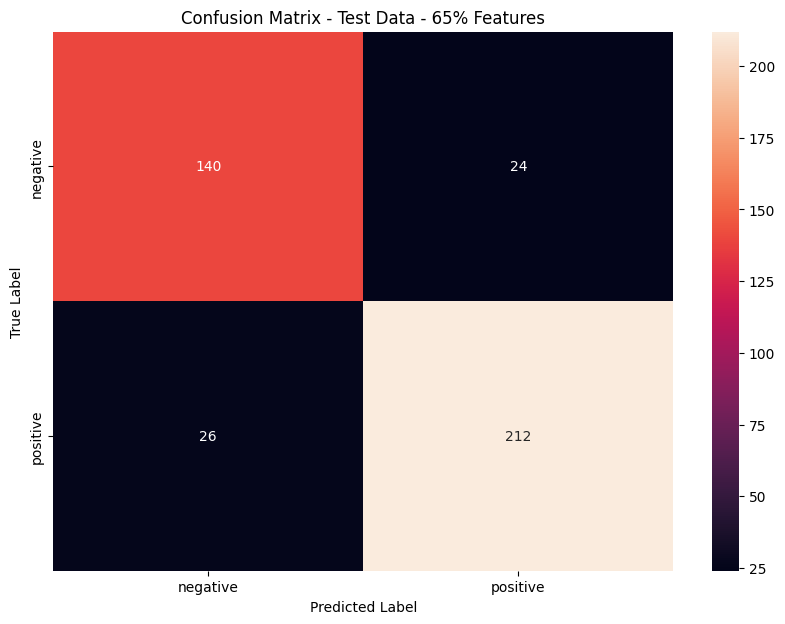

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



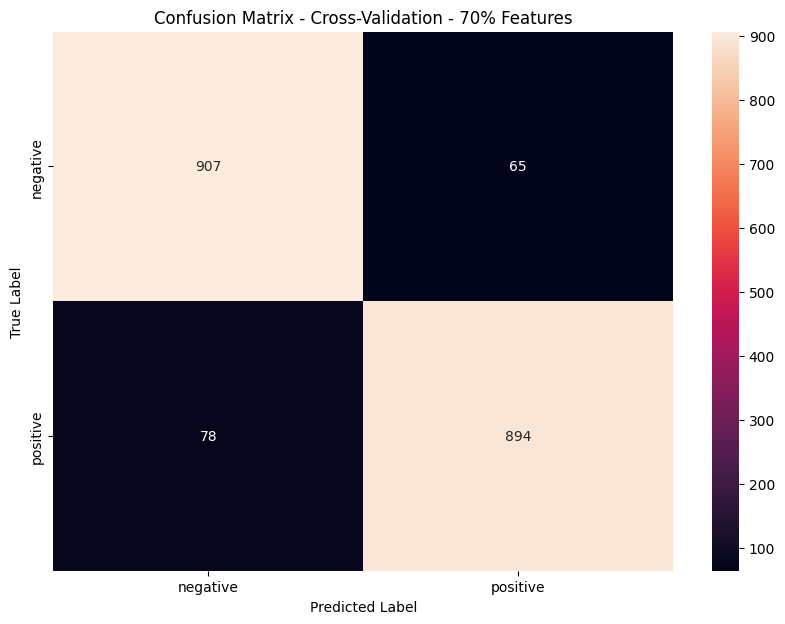

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (70% features): [0.92086331 0.90647482 0.91007194 0.89208633 0.92805755 0.97111913
 0.9566787 ]
Mean Accuracy: 0.9264788272527928
Standard Deviation: 0.026161601294170358
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


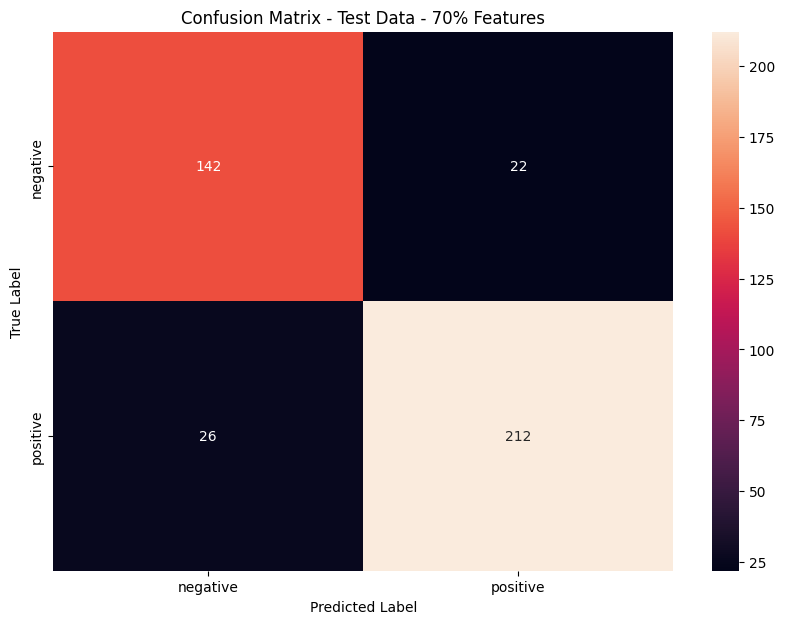

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



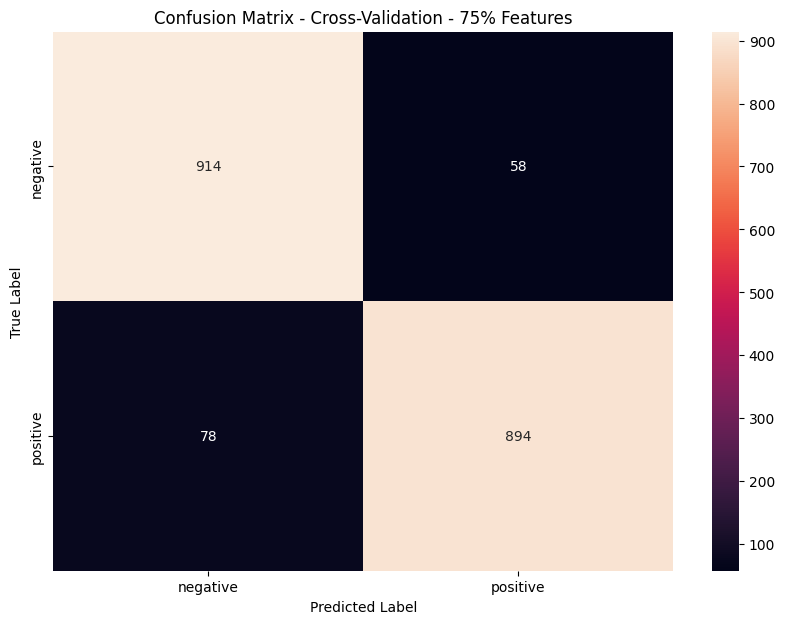

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (75% features): [0.92086331 0.9028777  0.9352518  0.90647482 0.92446043 0.96389892
 0.9566787 ]
Mean Accuracy: 0.9300722392689253
Standard Deviation: 0.021684931496756973
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


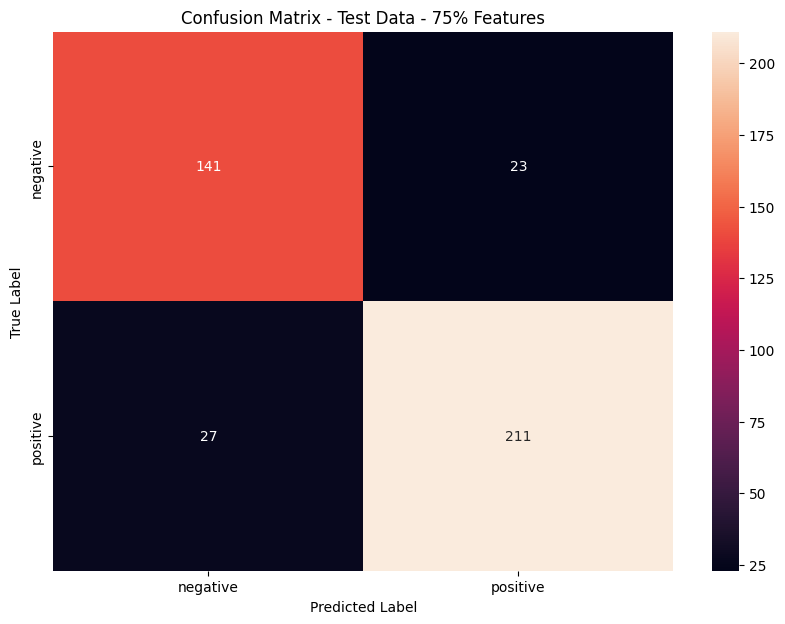

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



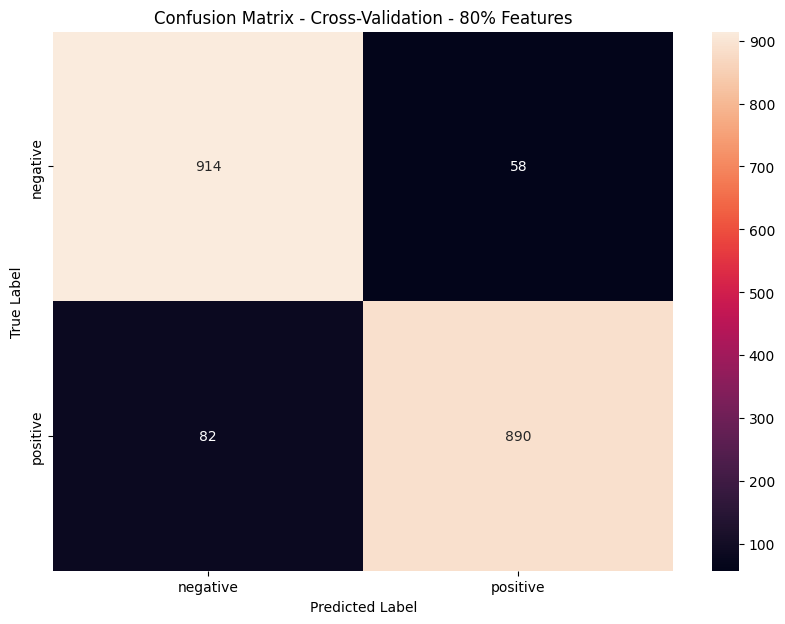

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (80% features): [0.91726619 0.89928058 0.92805755 0.90647482 0.93165468 0.96028881
 0.95306859]
Mean Accuracy: 0.9280130305245232
Standard Deviation: 0.021002427426997507
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


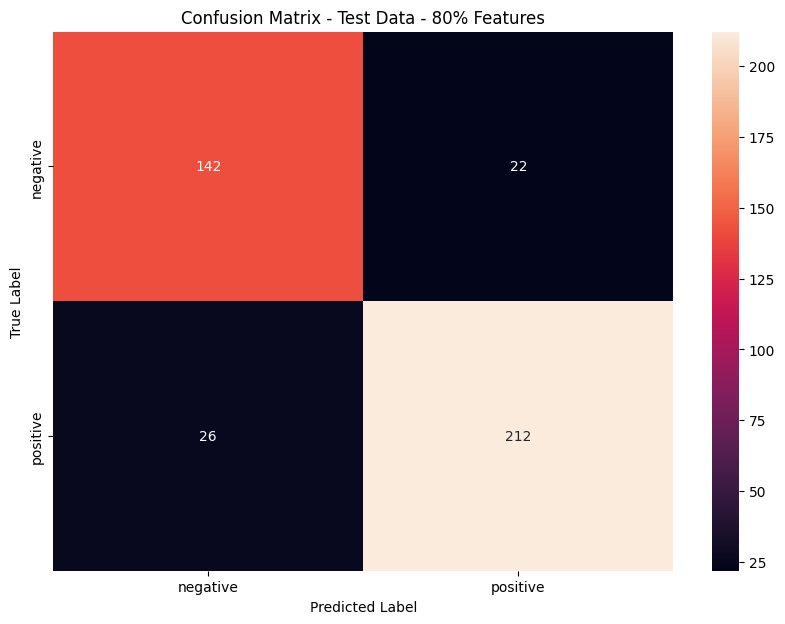

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



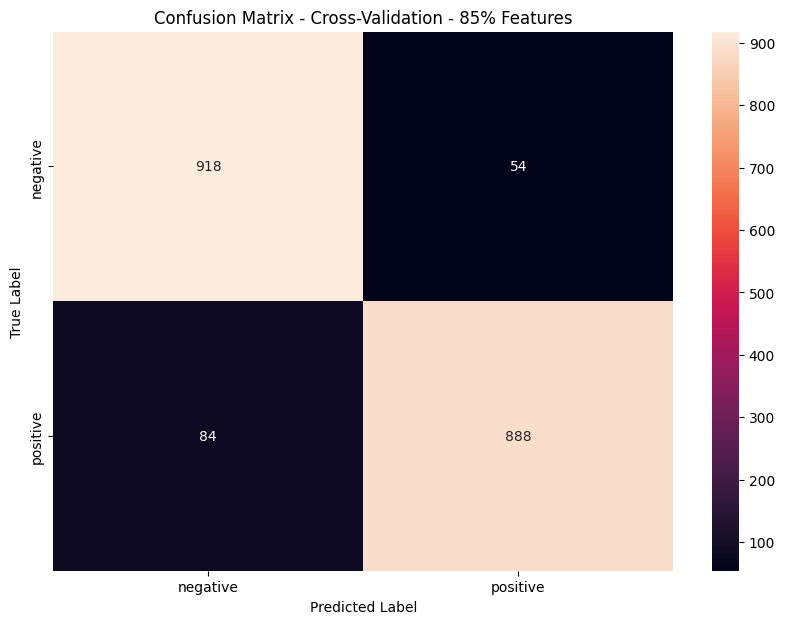

Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (85% features): [0.92086331 0.90647482 0.92446043 0.9028777  0.93165468 0.96750903
 0.94945848]
Mean Accuracy: 0.9290426348967243
Standard Deviation: 0.02133106714827601
Test Accuracy: 0.8930348258706468
Test Precision: 0.8942237245457983
Test Recall: 0.8930348258706468
Test F1 Score: 0.8933541248978986


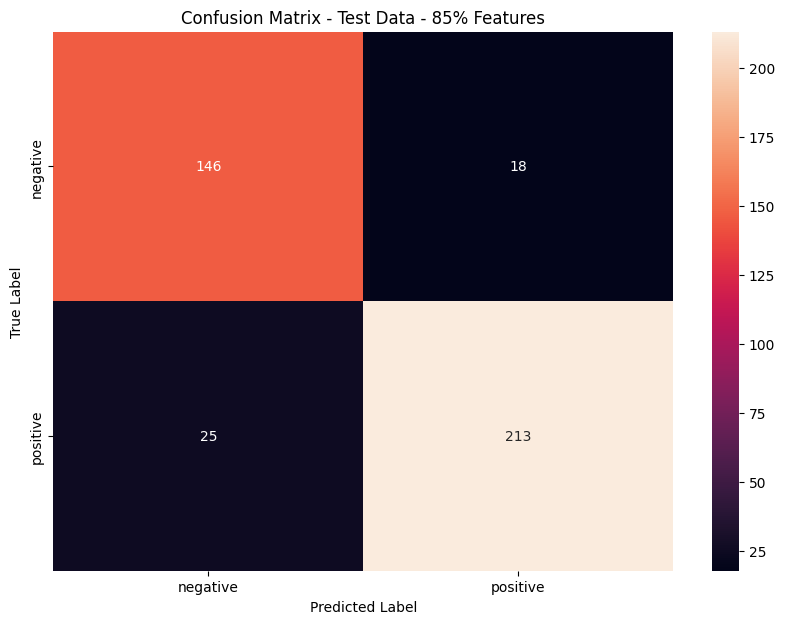

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.89      0.87       164
     Positif       0.92      0.89      0.91       238

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



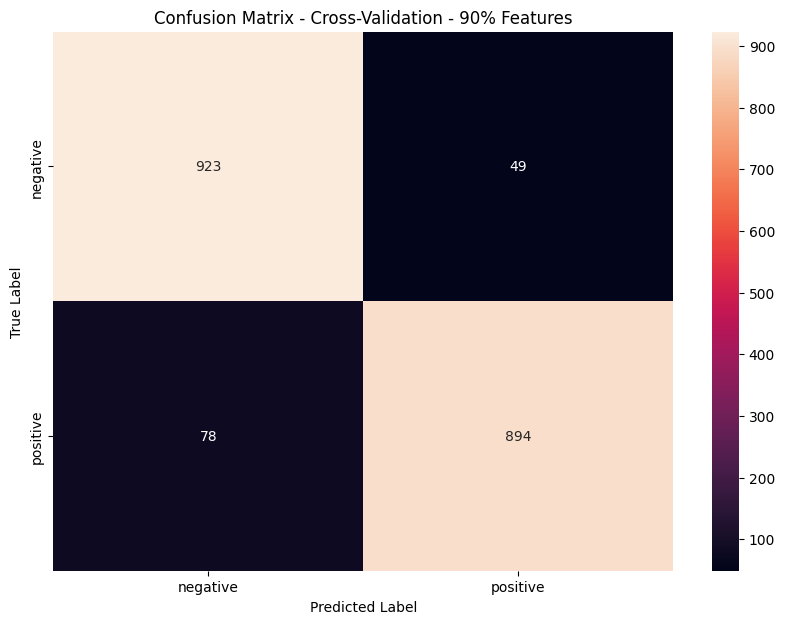

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.94       972
     Positif       0.95      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.94      0.93      0.93      1944
weighted avg       0.94      0.93      0.93      1944

Cross-Validation Scores (90% features): [0.92086331 0.92446043 0.92446043 0.92446043 0.9352518  0.96028881
 0.95306859]
Mean Accuracy: 0.9346934005142458
Standard Deviation: 0.014631164232506074
Test Accuracy: 0.900497512437811
Test Precision: 0.9014231580434542
Test Recall: 0.900497512437811
Test F1 Score: 0.9007561250949989


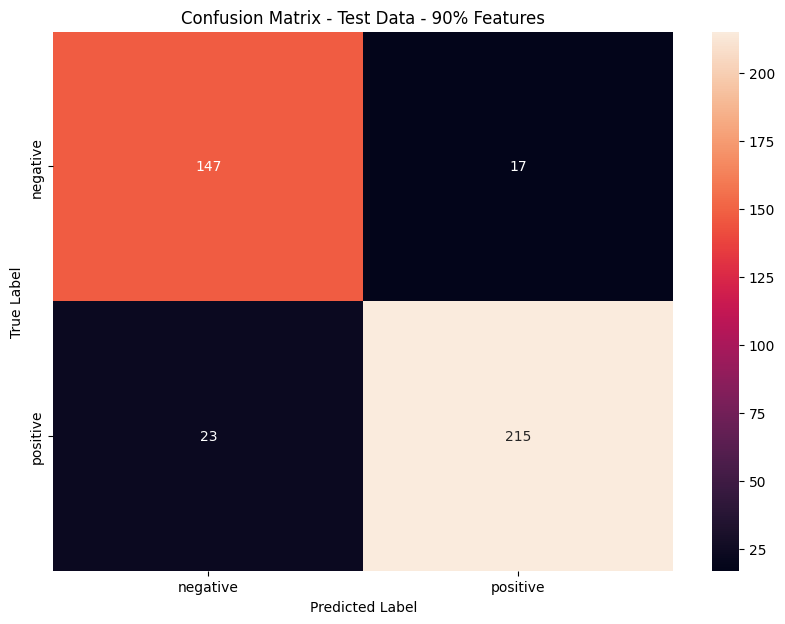

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88       164
     Positif       0.93      0.90      0.91       238

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



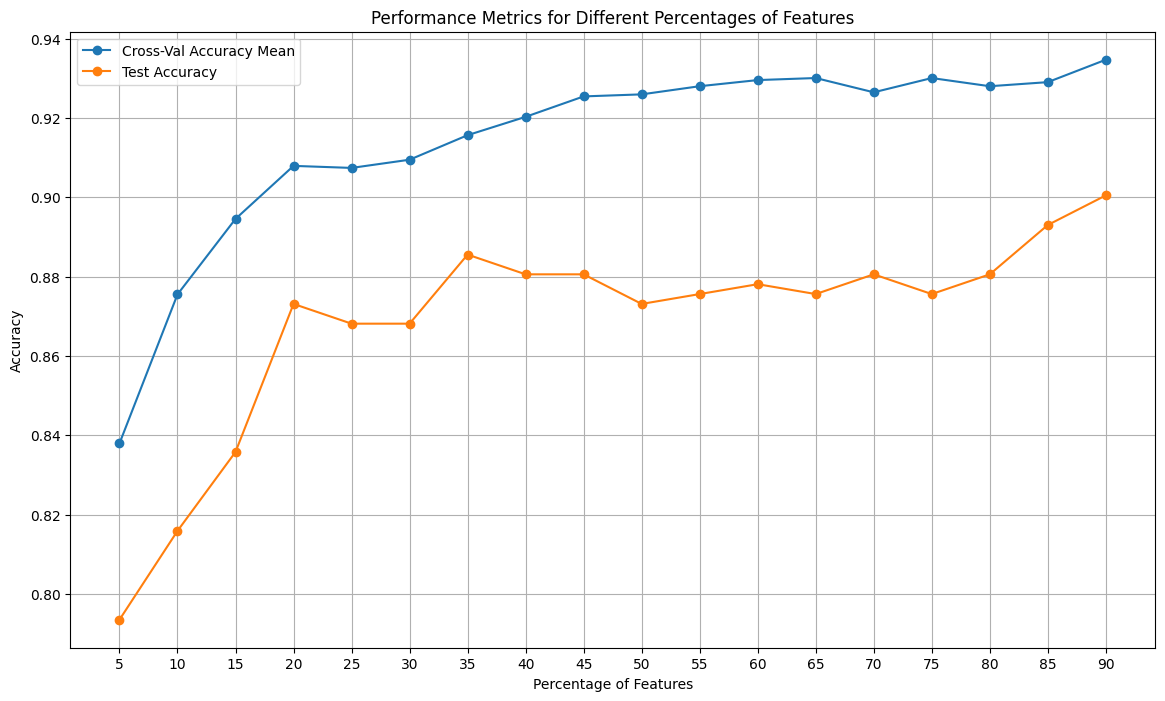

In [77]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)



# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * X_train_resampled.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest dengan Chi-Square
    selector = SelectKBest(chi2, k=num_feature_to_select)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=5
    k = 7
    scores = cross_val_score(modelsvm, X_train_selected, y_train_resampled, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train_selected, y_train_resampled, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train_resampled, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train_selected, y_train_resampled)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test_selected)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)
# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


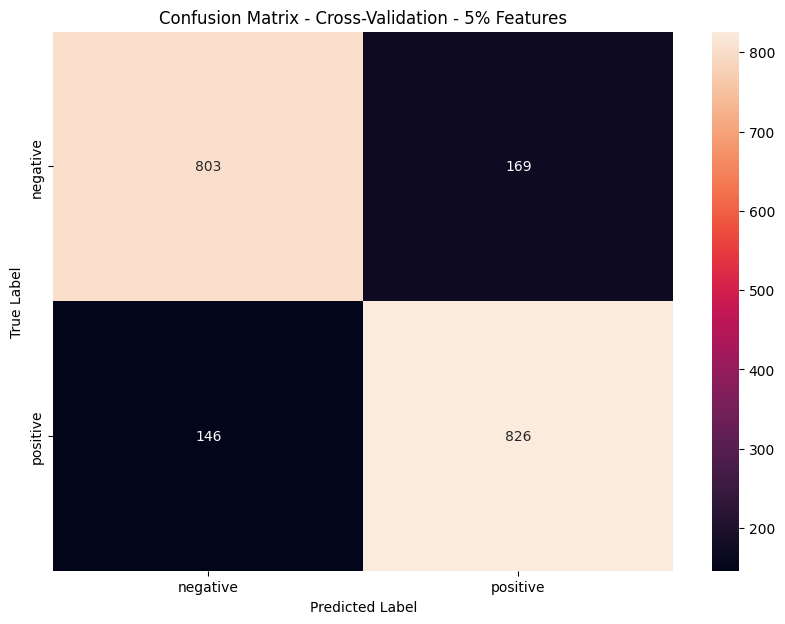

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.83      0.84       972
     Positif       0.83      0.85      0.84       972

    accuracy                           0.84      1944
   macro avg       0.84      0.84      0.84      1944
weighted avg       0.84      0.84      0.84      1944

Cross-Validation Scores (5% features): [0.85611511 0.80215827 0.83093525 0.81654676 0.85971223 0.84837545
 0.85198556]
Mean Accuracy: 0.8379755195328007
Standard Deviation: 0.020345589818599394
Test Accuracy: 0.7935323383084577
Test Precision: 0.7933437773015969
Test Recall: 0.7935323383084577
Test F1 Score: 0.7934330616454013


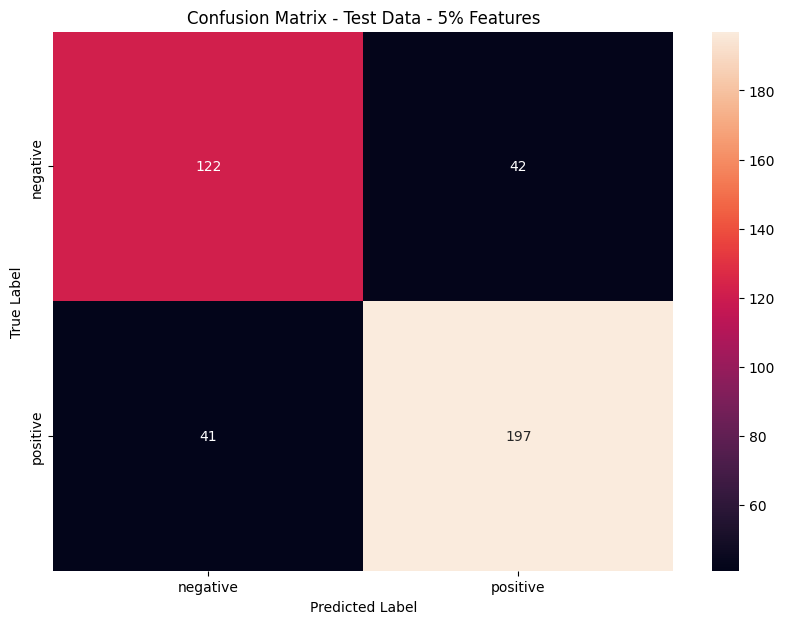

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.75      0.74      0.75       164
     Positif       0.82      0.83      0.83       238

    accuracy                           0.79       402
   macro avg       0.79      0.79      0.79       402
weighted avg       0.79      0.79      0.79       402



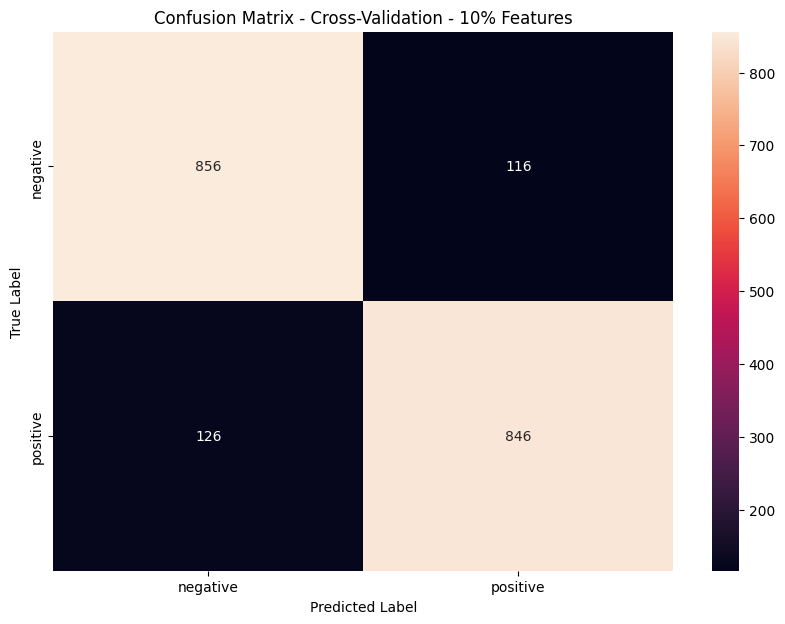

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.88      0.88       972
     Positif       0.88      0.87      0.87       972

    accuracy                           0.88      1944
   macro avg       0.88      0.88      0.88      1944
weighted avg       0.88      0.88      0.88      1944

Cross-Validation Scores (10% features): [0.88129496 0.86330935 0.85251799 0.83453237 0.90647482 0.89530686
 0.89530686]
Mean Accuracy: 0.87553474497349
Standard Deviation: 0.02429805173539142
Test Accuracy: 0.8159203980099502
Test Precision: 0.8163003646257178
Test Recall: 0.8159203980099502
Test F1 Score: 0.8160898613949814


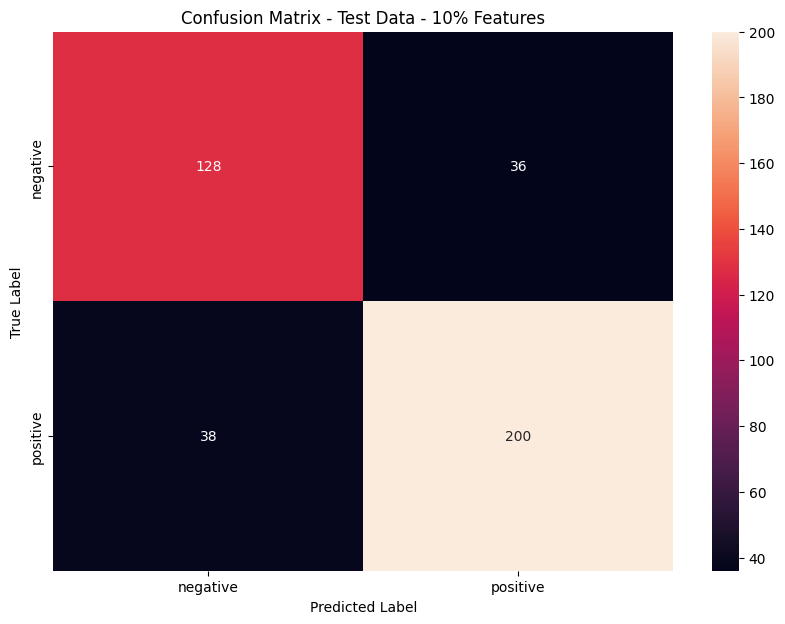

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.77      0.78      0.78       164
     Positif       0.85      0.84      0.84       238

    accuracy                           0.82       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.82      0.82      0.82       402



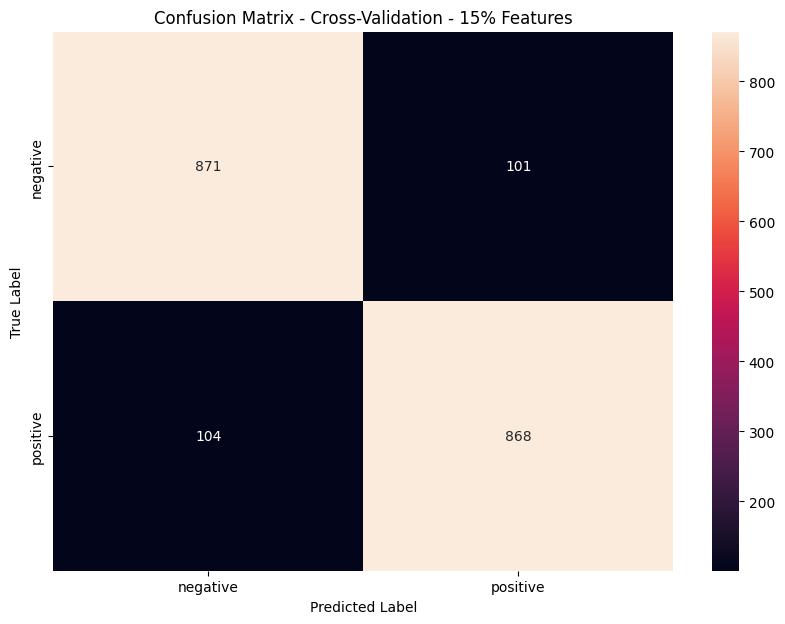

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.90      0.89       972
     Positif       0.90      0.89      0.89       972

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944

Cross-Validation Scores (15% features): [0.9028777  0.87769784 0.88129496 0.85611511 0.91366906 0.90613718
 0.92418773]
Mean Accuracy: 0.894568512286612
Standard Deviation: 0.02198855725912327
Test Accuracy: 0.835820895522388
Test Precision: 0.8351146083217434
Test Recall: 0.835820895522388
Test F1 Score: 0.8351255088195387


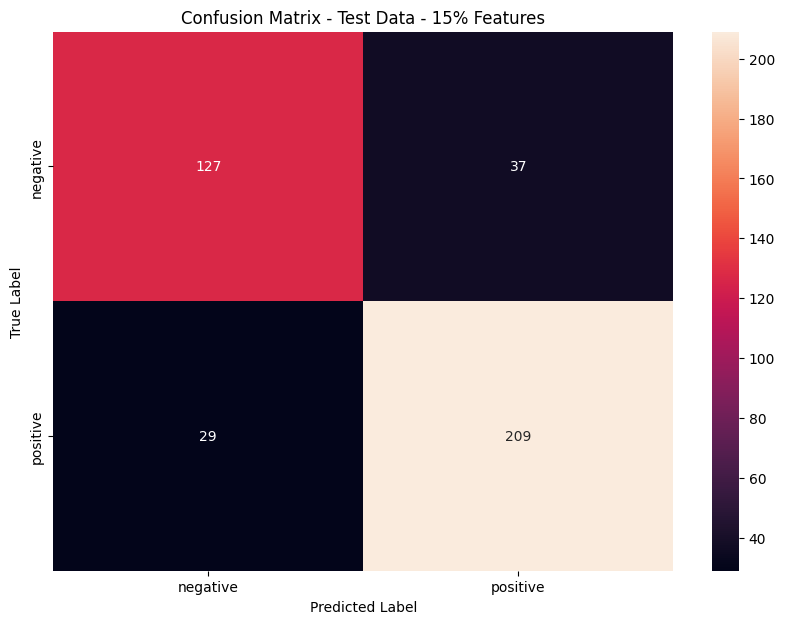

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.81      0.77      0.79       164
     Positif       0.85      0.88      0.86       238

    accuracy                           0.84       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.84      0.84      0.84       402



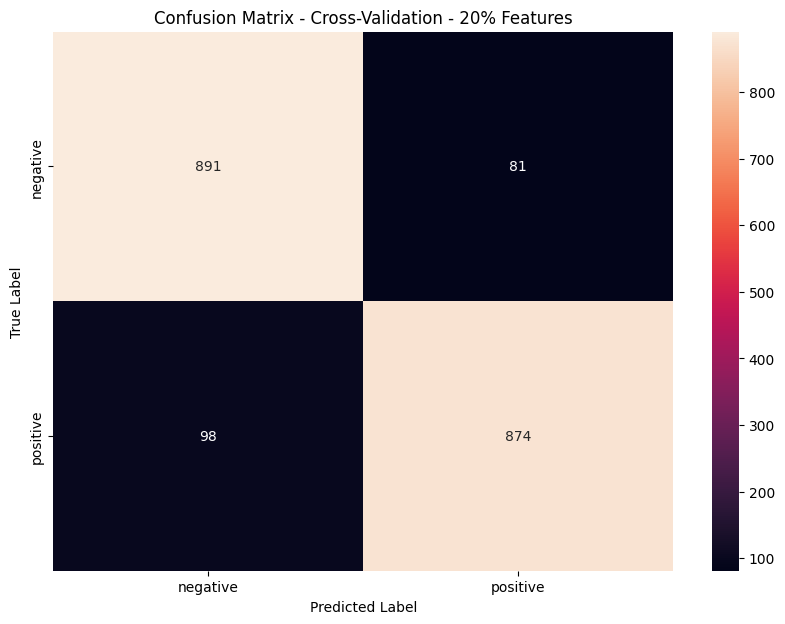

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (20% features): [0.90647482 0.89208633 0.91007194 0.88129496 0.92446043 0.9133574
 0.92779783]
Mean Accuracy: 0.907934817695096
Standard Deviation: 0.015420741915461443
Test Accuracy: 0.8731343283582089
Test Precision: 0.8744290244683018
Test Recall: 0.8731343283582089
Test F1 Score: 0.8735130318556471


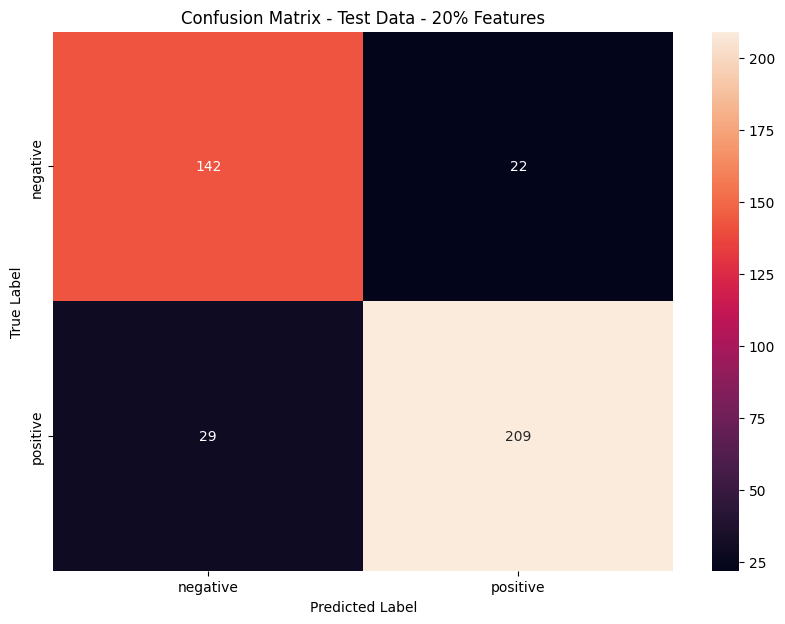

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.87      0.85       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



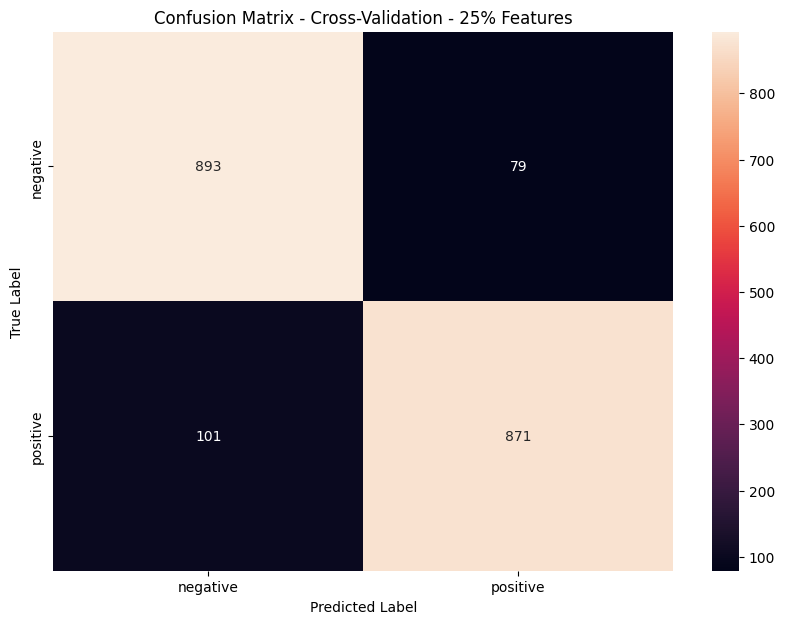

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.92      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (25% features): [0.89928058 0.89568345 0.90647482 0.88489209 0.92446043 0.9133574
 0.92779783]
Mean Accuracy: 0.907420943080502
Standard Deviation: 0.014408738259758977
Test Accuracy: 0.8681592039800995
Test Precision: 0.8690123549911767
Test Recall: 0.8681592039800995
Test F1 Score: 0.8684492078350811


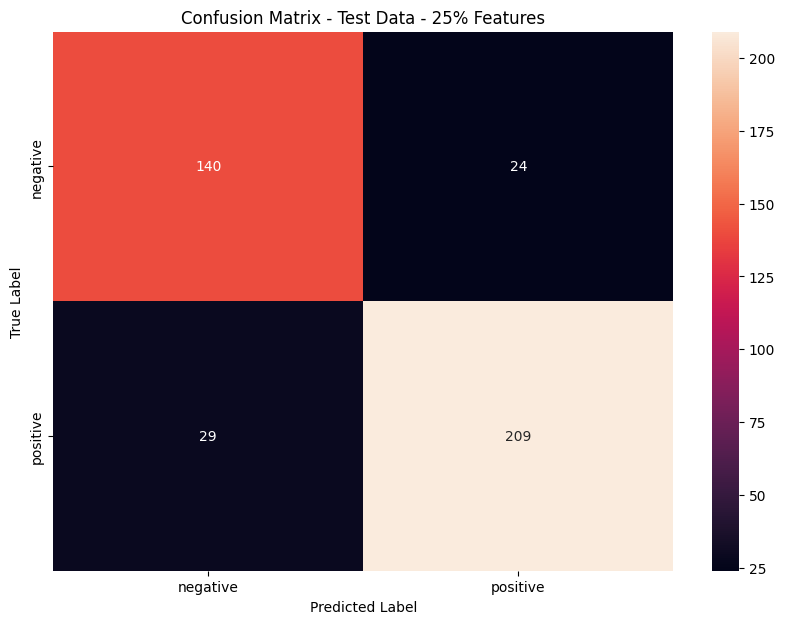

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402



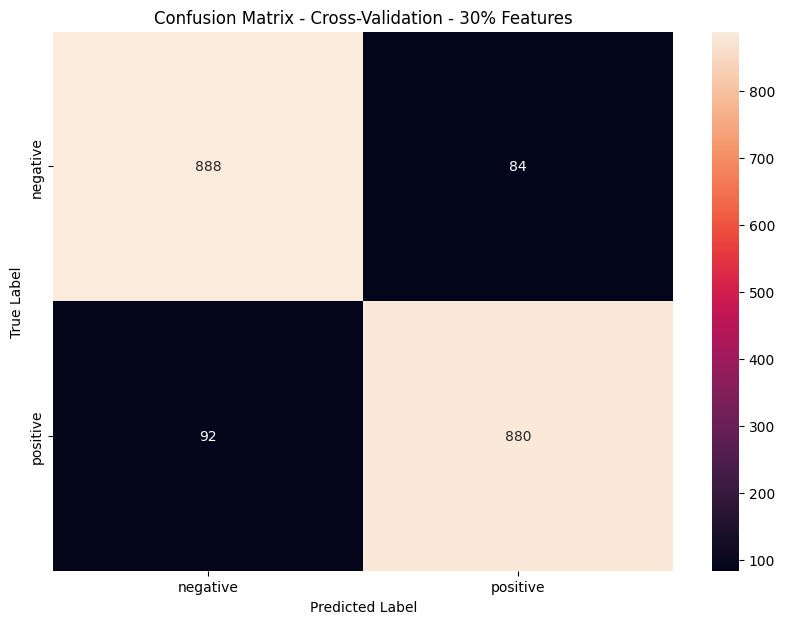

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.91      0.91       972
     Positif       0.91      0.91      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (30% features): [0.89928058 0.89568345 0.91366906 0.87769784 0.91726619 0.93501805
 0.92779783]
Mean Accuracy: 0.909487572396956
Standard Deviation: 0.0184018096268586
Test Accuracy: 0.8681592039800995
Test Precision: 0.868616530039318
Test Recall: 0.8681592039800995
Test F1 Score: 0.8683385700471283


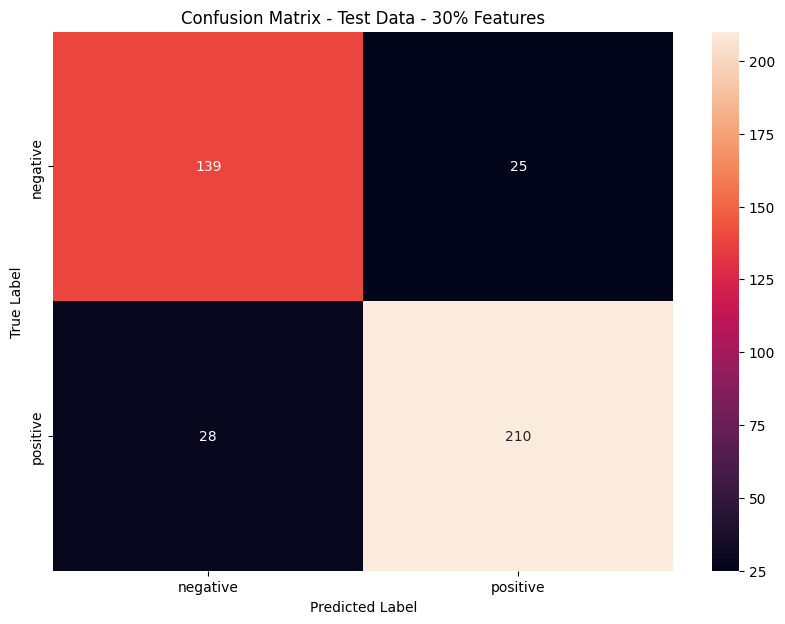

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.89      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



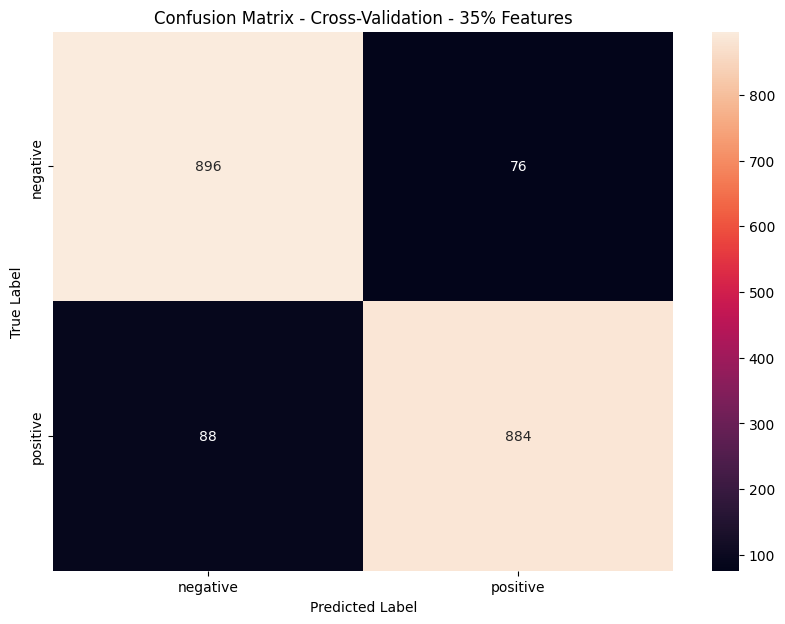

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.92      0.92       972
     Positif       0.92      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (35% features): [0.9028777  0.89208633 0.91007194 0.88489209 0.92086331 0.9566787
 0.94223827]
Mean Accuracy: 0.9156726192022143
Standard Deviation: 0.02423989450065085
Test Accuracy: 0.8855721393034826
Test Precision: 0.8865681733321223
Test Recall: 0.8855721393034826
Test F1 Score: 0.8858695438592489


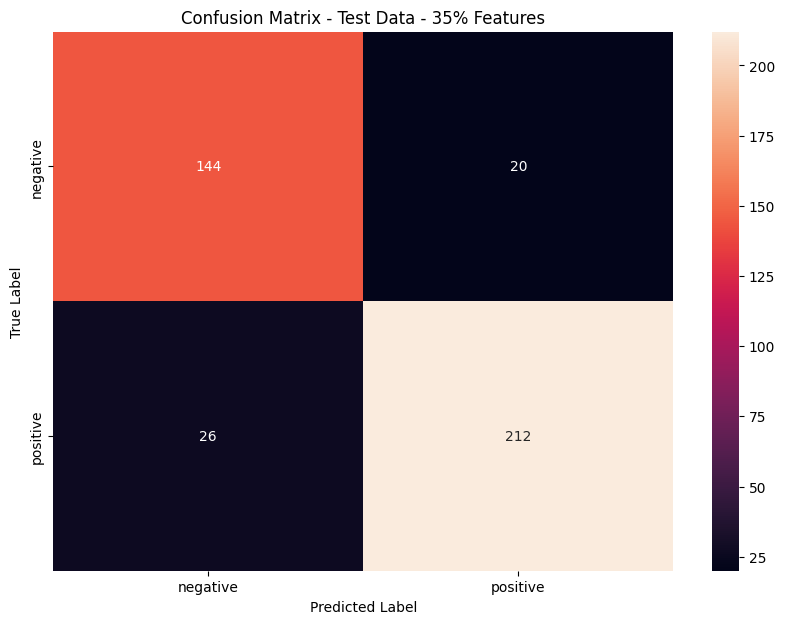

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.88      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



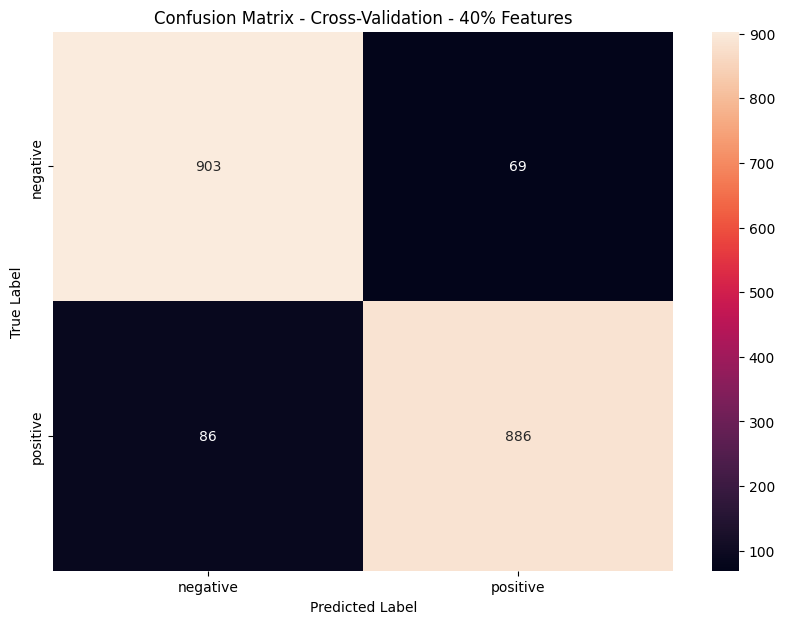

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (40% features): [0.91366906 0.89568345 0.91007194 0.88848921 0.93165468 0.96028881
 0.94223827]
Mean Accuracy: 0.9202993458765737
Standard Deviation: 0.023832164158488645
Test Accuracy: 0.8805970149253731
Test Precision: 0.882106152754931
Test Recall: 0.8805970149253731
Test F1 Score: 0.8809979406994332


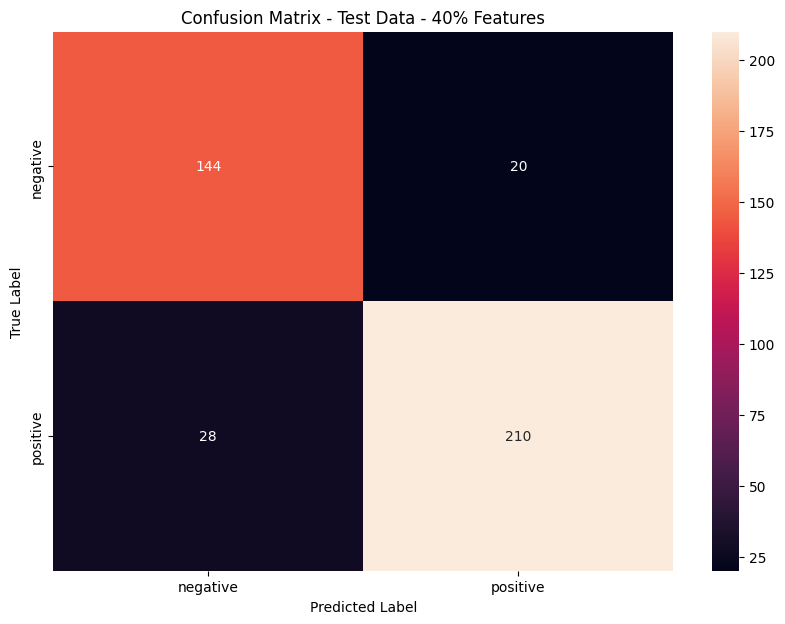

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.88      0.86       164
     Positif       0.91      0.88      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



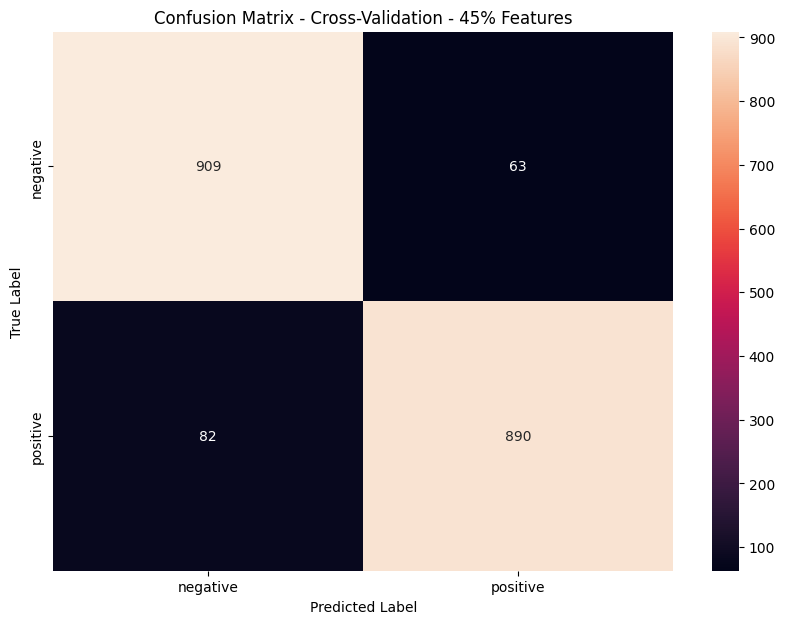

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (45% features): [0.92086331 0.89208633 0.92805755 0.89928058 0.92086331 0.96028881
 0.9566787 ]
Mean Accuracy: 0.925445512594566
Standard Deviation: 0.024011372794414787
Test Accuracy: 0.8805970149253731
Test Precision: 0.8805970149253731
Test Recall: 0.8805970149253731
Test F1 Score: 0.8805970149253731


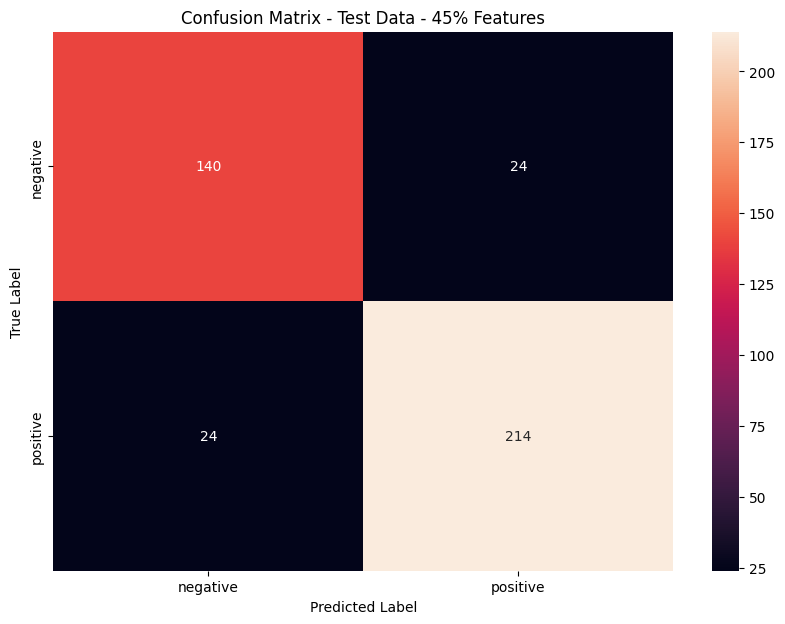

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       164
     Positif       0.90      0.90      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



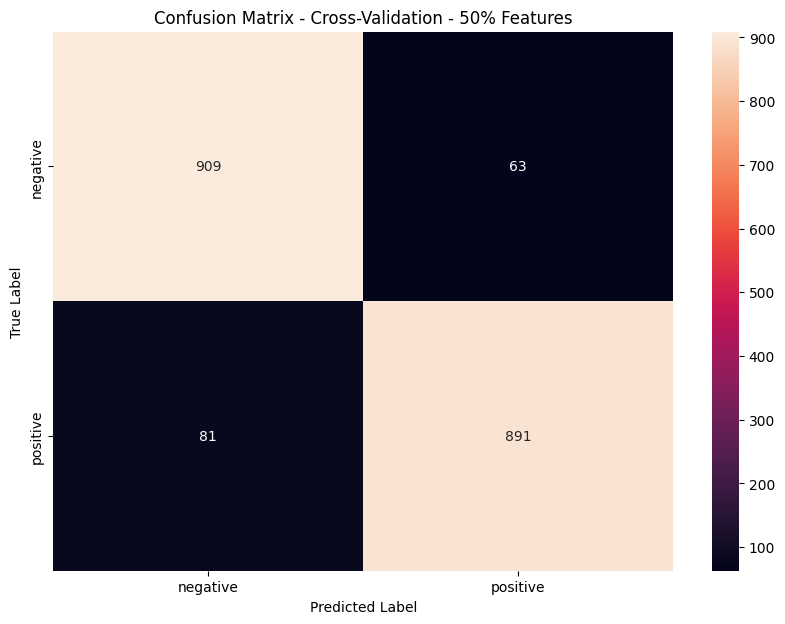

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (50% features): [0.92086331 0.90647482 0.92086331 0.89568345 0.91726619 0.96389892
 0.9566787 ]
Mean Accuracy: 0.925961242352173
Standard Deviation: 0.02332036625031277
Test Accuracy: 0.8731343283582089
Test Precision: 0.873578723784568
Test Recall: 0.8731343283582089
Test F1 Score: 0.8733069258944066


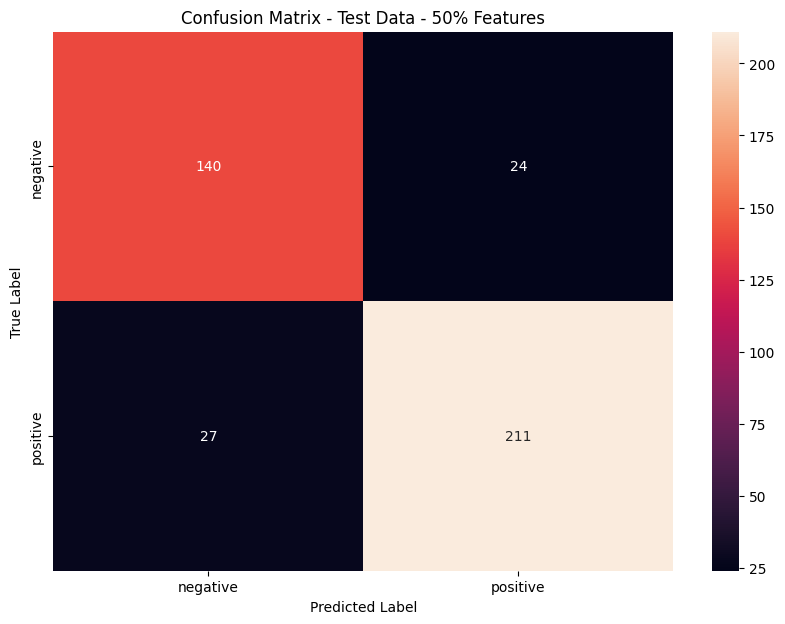

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



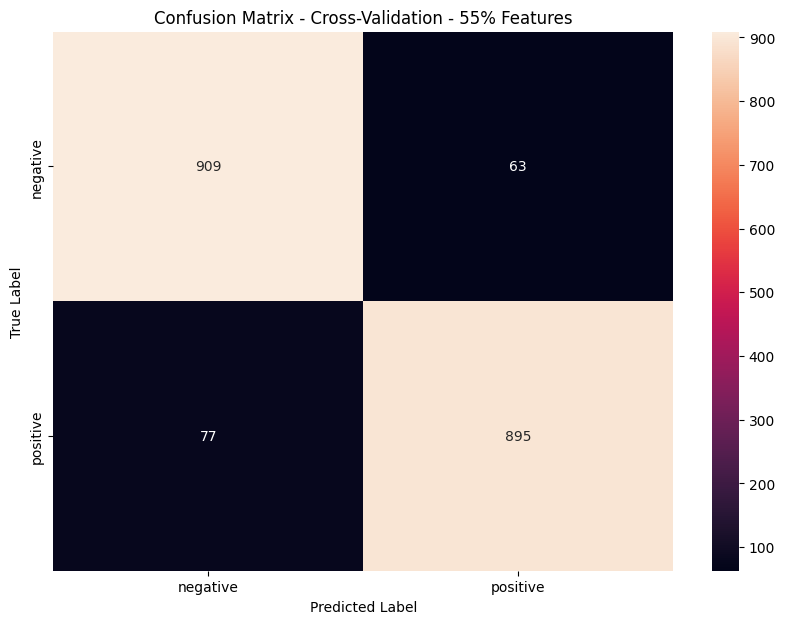

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (55% features): [0.92805755 0.91007194 0.91726619 0.89568345 0.92446043 0.96389892
 0.9566787 ]
Mean Accuracy: 0.9280167408105492
Standard Deviation: 0.02269272750507551
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


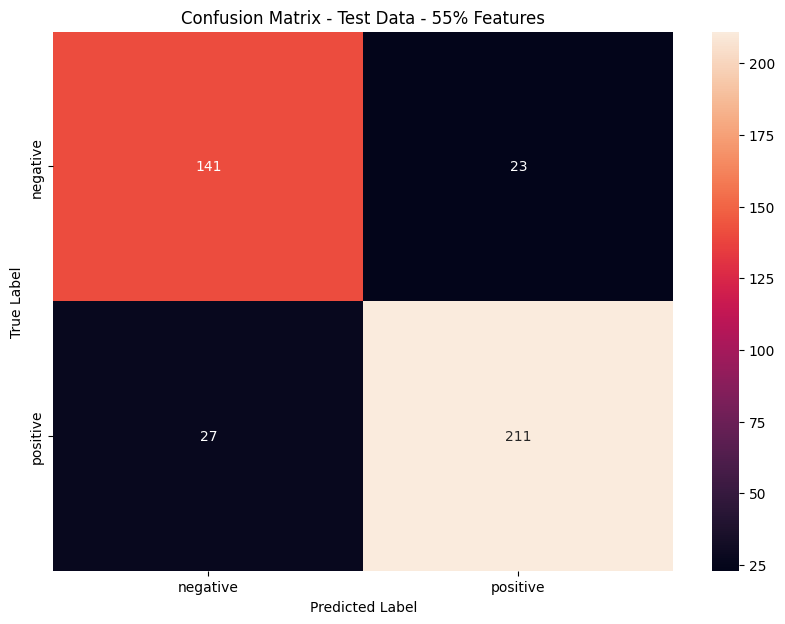

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



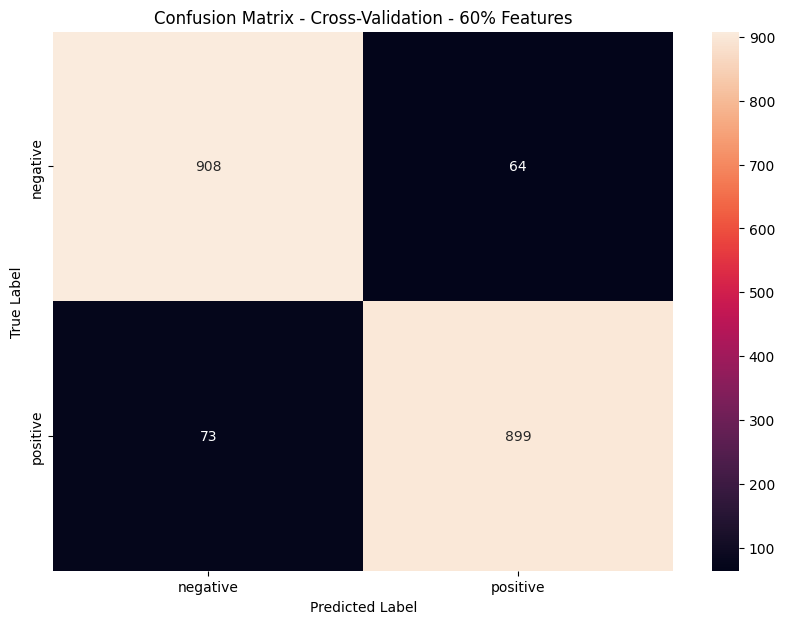

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (60% features): [0.92805755 0.90647482 0.92446043 0.88848921 0.93165468 0.96750903
 0.96028881]
Mean Accuracy: 0.9295620749403571
Standard Deviation: 0.02573706114128603
Test Accuracy: 0.8781094527363185
Test Precision: 0.878540917529818
Test Recall: 0.8781094527363185
Test F1 Score: 0.8782752817416848


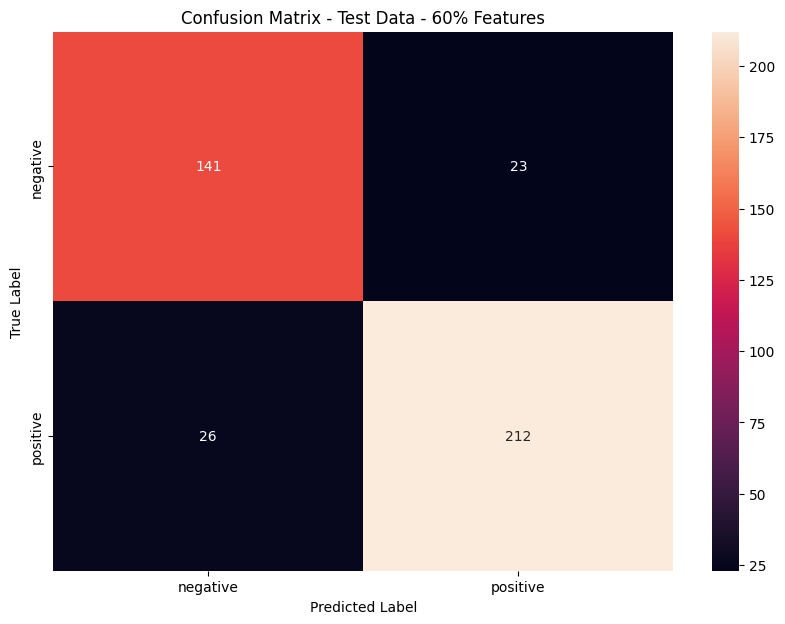

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402



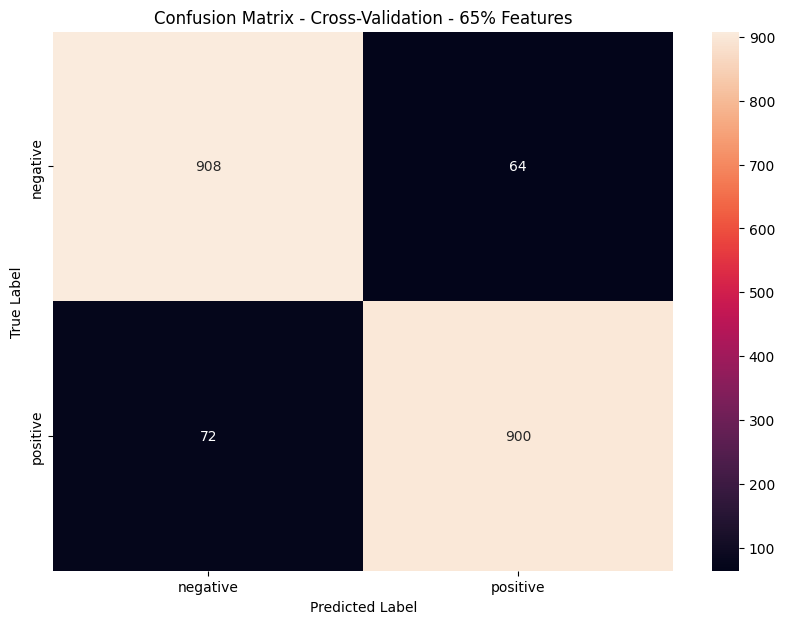

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       972
     Positif       0.93      0.93      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (65% features): [0.92805755 0.90647482 0.91726619 0.89568345 0.93165468 0.97111913
 0.96028881]
Mean Accuracy: 0.9300778046979642
Standard Deviation: 0.02537679821226107
Test Accuracy: 0.8756218905472637
Test Precision: 0.8758951820436311
Test Recall: 0.8756218905472637
Test F1 Score: 0.8757363928344468


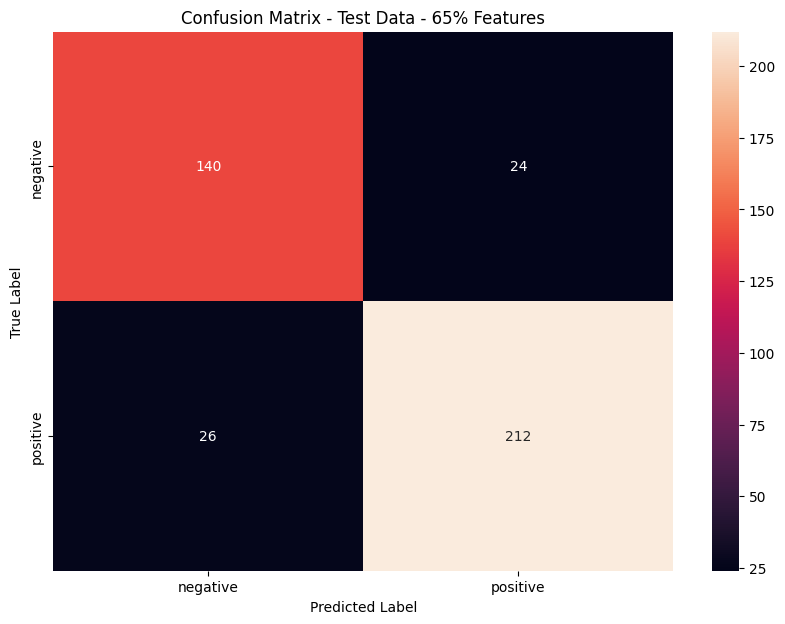

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



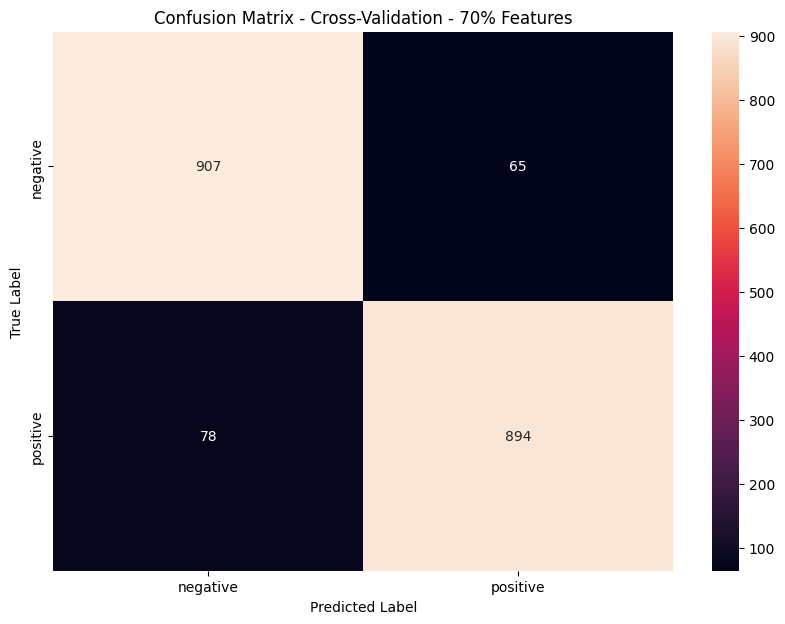

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.93       972
     Positif       0.93      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (70% features): [0.92086331 0.90647482 0.91007194 0.89208633 0.92805755 0.97111913
 0.9566787 ]
Mean Accuracy: 0.9264788272527928
Standard Deviation: 0.026161601294170358
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


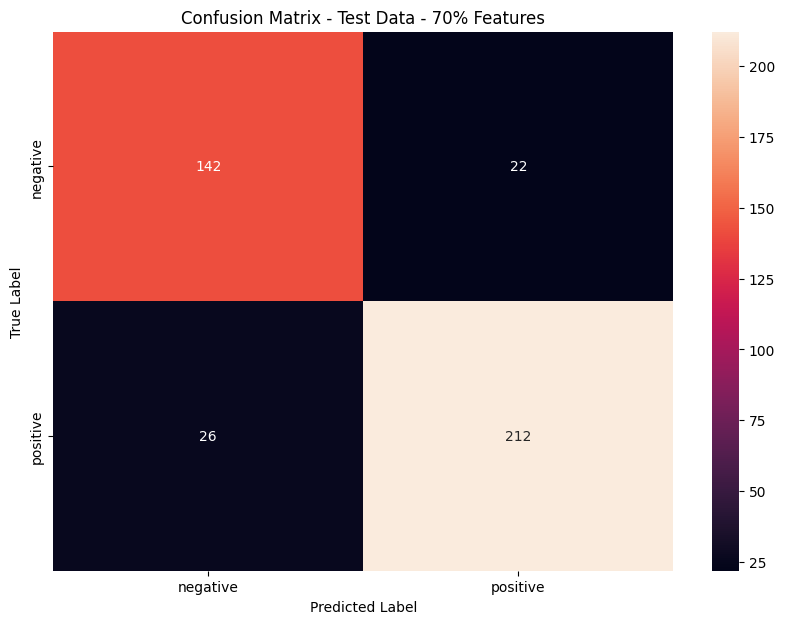

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



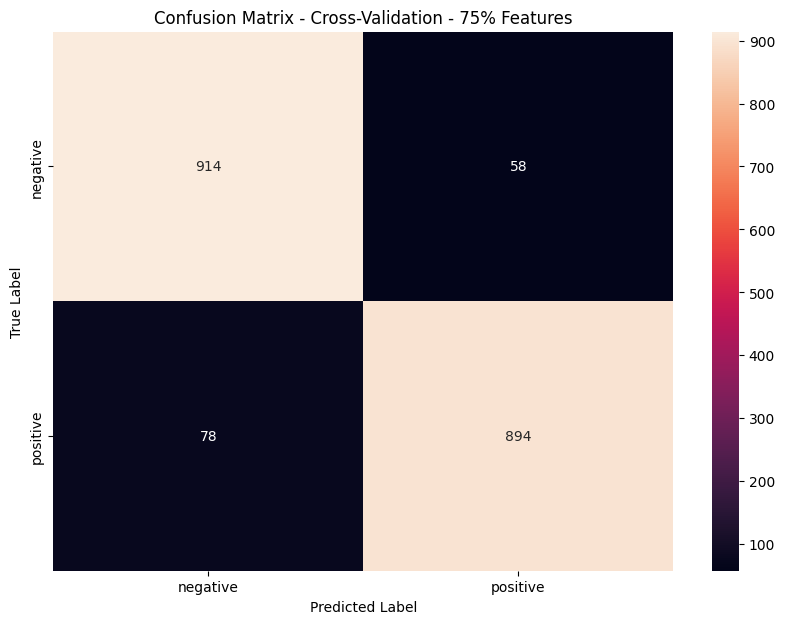

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (75% features): [0.92086331 0.9028777  0.9352518  0.90647482 0.92446043 0.96389892
 0.9566787 ]
Mean Accuracy: 0.9300722392689253
Standard Deviation: 0.021684931496756973
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


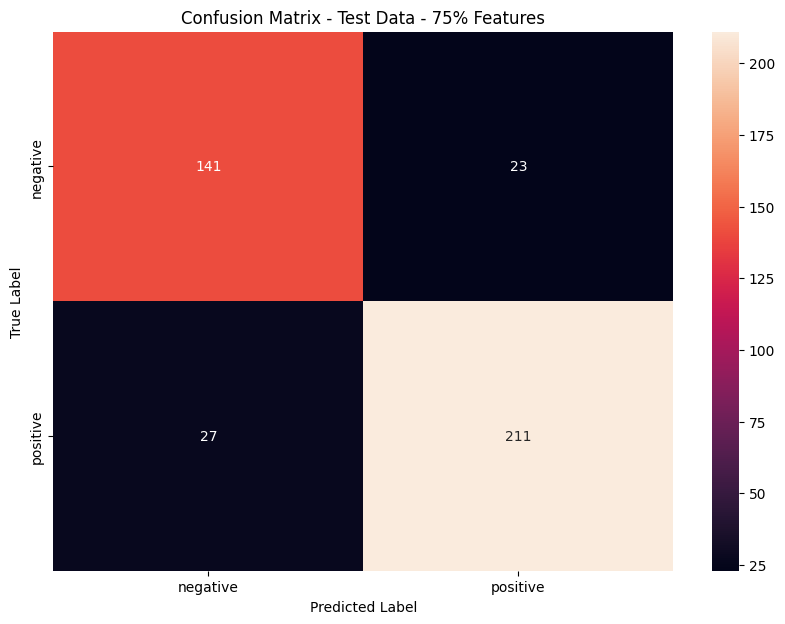

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



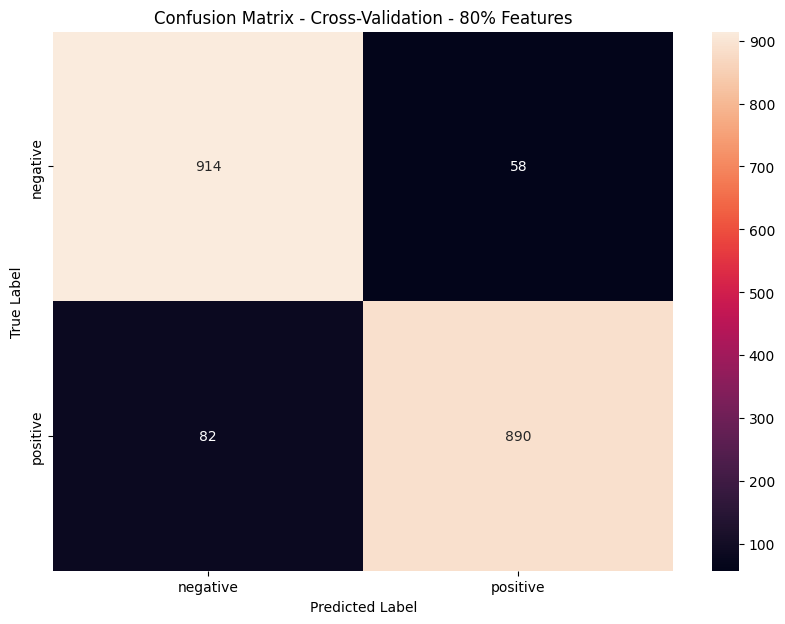

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (80% features): [0.91726619 0.89928058 0.92805755 0.90647482 0.93165468 0.96028881
 0.95306859]
Mean Accuracy: 0.9280130305245232
Standard Deviation: 0.021002427426997507
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


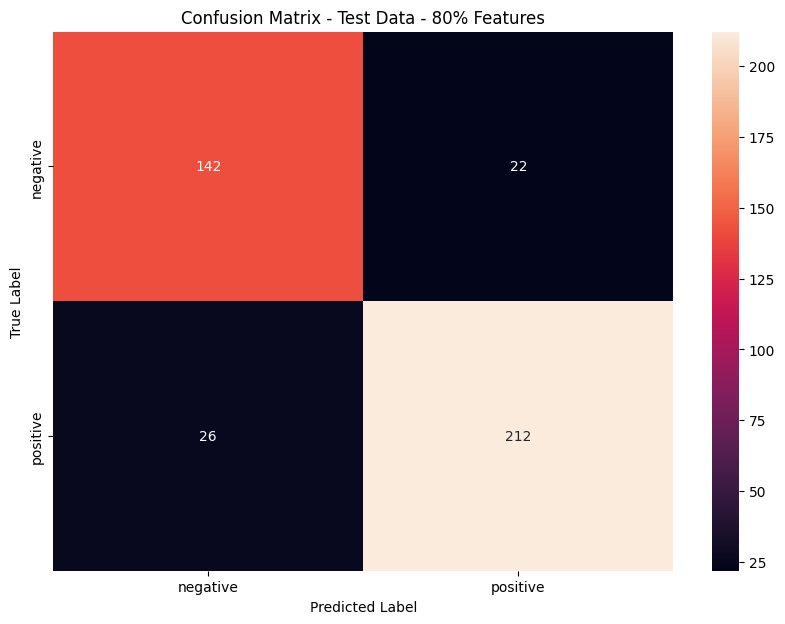

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



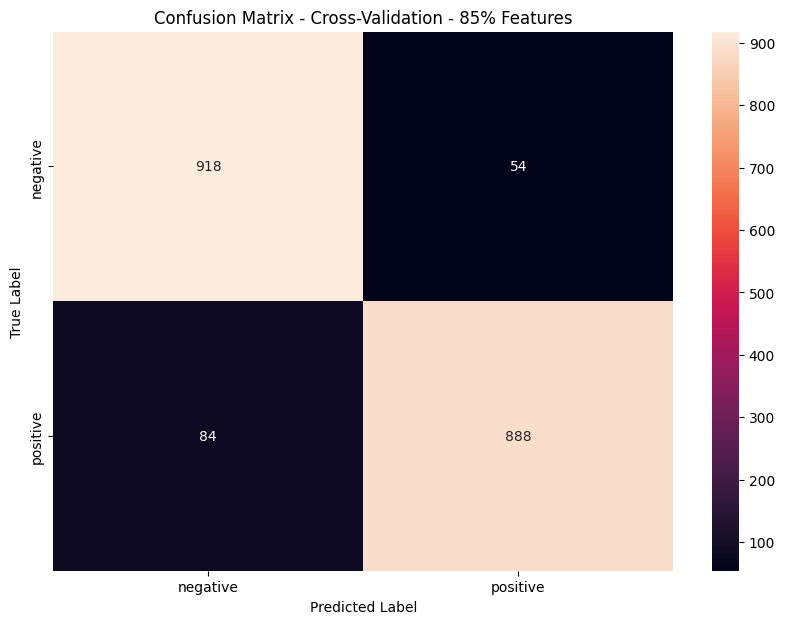

Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (85% features): [0.92086331 0.90647482 0.92446043 0.9028777  0.93165468 0.96750903
 0.94945848]
Mean Accuracy: 0.9290426348967243
Standard Deviation: 0.02133106714827601
Test Accuracy: 0.8930348258706468
Test Precision: 0.8942237245457983
Test Recall: 0.8930348258706468
Test F1 Score: 0.8933541248978986


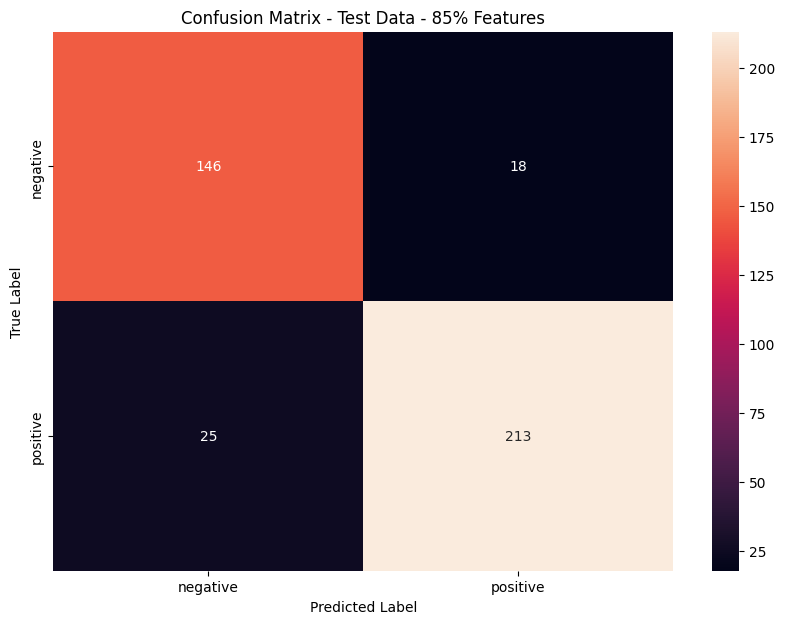

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.89      0.87       164
     Positif       0.92      0.89      0.91       238

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



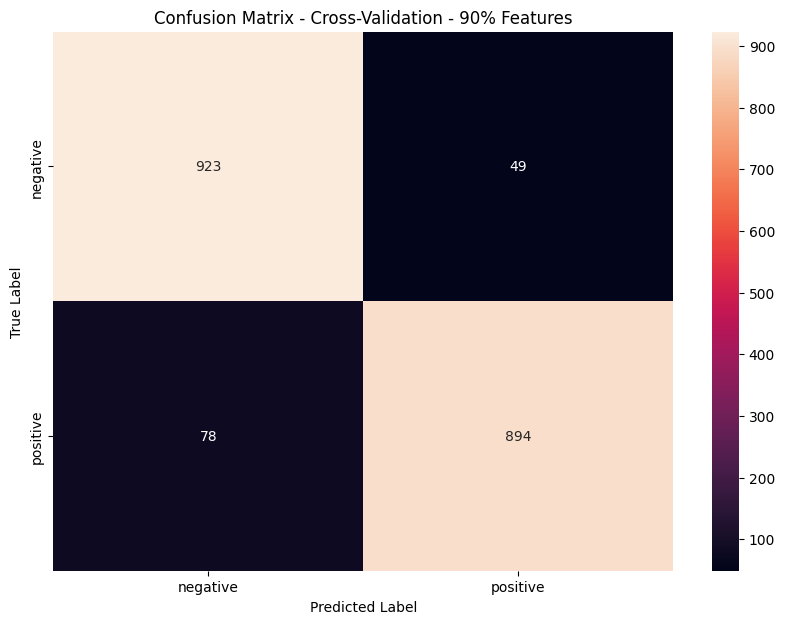

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.94       972
     Positif       0.95      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.94      0.93      0.93      1944
weighted avg       0.94      0.93      0.93      1944

Cross-Validation Scores (90% features): [0.92086331 0.92446043 0.92446043 0.92446043 0.9352518  0.96028881
 0.95306859]
Mean Accuracy: 0.9346934005142458
Standard Deviation: 0.014631164232506074
Test Accuracy: 0.900497512437811
Test Precision: 0.9014231580434542
Test Recall: 0.900497512437811
Test F1 Score: 0.9007561250949989


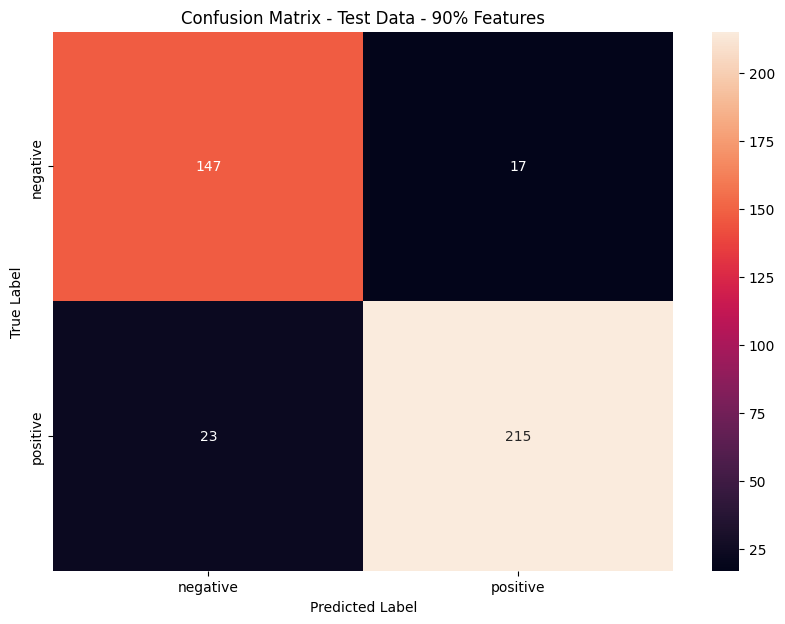

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88       164
     Positif       0.93      0.90      0.91       238

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



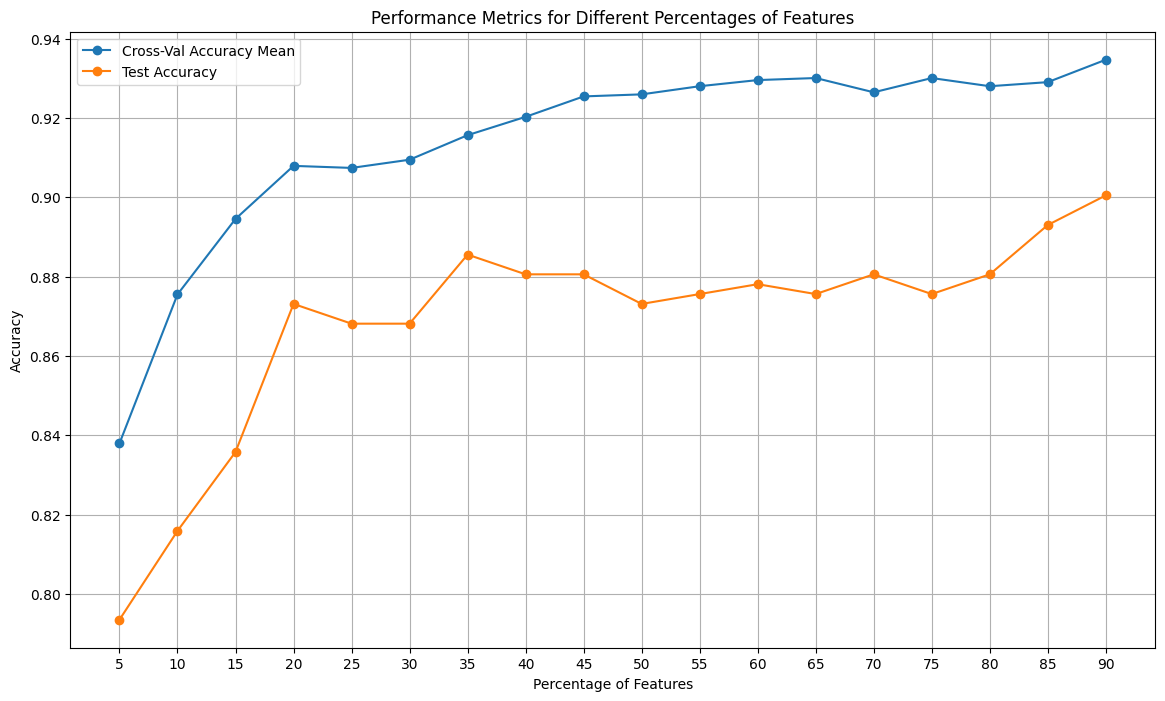

In [78]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)



# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []

# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * X_train_resampled.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest dengan Chi-Square
    selector = SelectKBest(chi2, k=num_feature_to_select)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=5
    k = 7
    scores = cross_val_score(modelsvm, X_train_selected, y_train_resampled, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train_selected, y_train_resampled, cv=k)
    if persen_fitur == 90:
      modelsvm.fit(X_train, y_train)


    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train_resampled, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train_selected, y_train_resampled)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test_selected)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)
# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [79]:
print(modelsvm)

SVC(C=1, gamma=0.01, kernel='linear')


In [80]:
import joblib
filenamemodelbest = '/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+chisquare.pkl'
joblib.dump(modelsvm,filenamemodelbest)

['/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/modelsvm+chisquare.pkl']

## K=9 c=1 gamma = 0,01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Sebelum SMOTE:
Sentimen
Positif    972
Negatif    633
Name: count, dtype: int64

Setelah SMOTE:
Sentimen
Positif    972
Negatif    972
Name: count, dtype: int64


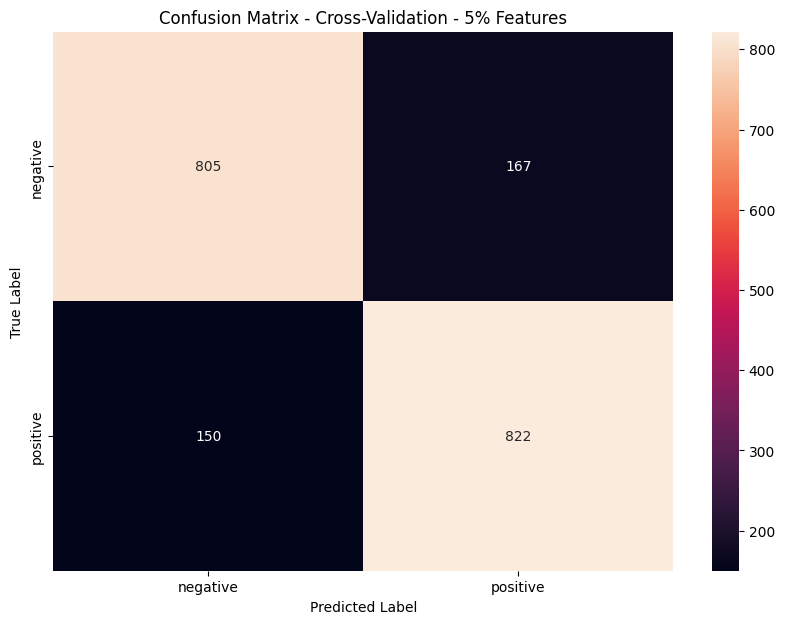

Classification Report - Cross-Validation - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.83      0.84       972
     Positif       0.83      0.85      0.84       972

    accuracy                           0.84      1944
   macro avg       0.84      0.84      0.84      1944
weighted avg       0.84      0.84      0.84      1944

Cross-Validation Scores (5% features): [0.84722222 0.81018519 0.80555556 0.85648148 0.80092593 0.85185185
 0.85185185 0.86111111 0.84722222]
Mean Accuracy: 0.8369341563786008
Standard Deviation: 0.0226571147587914
Test Accuracy: 0.7935323383084577
Test Precision: 0.7933437773015969
Test Recall: 0.7935323383084577
Test F1 Score: 0.7934330616454013


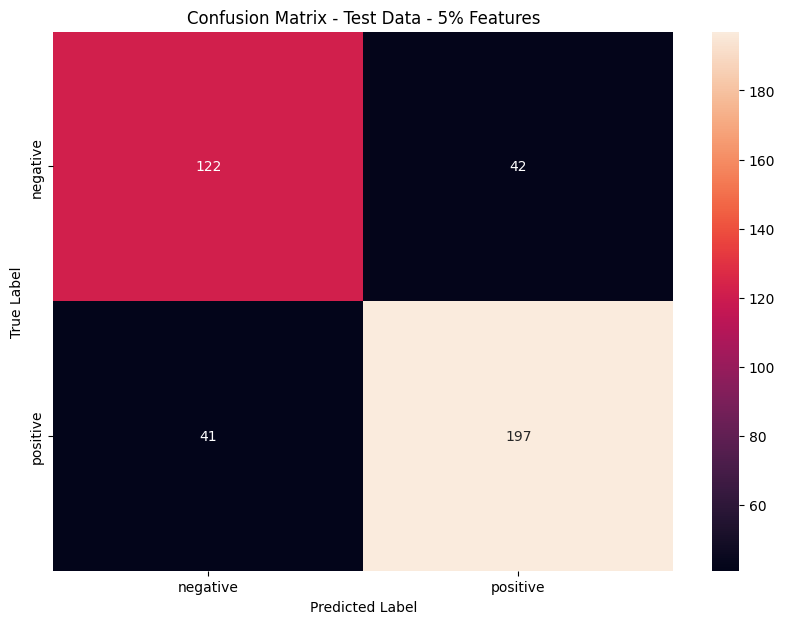

Classification Report - Test Data - 5% Features:
              precision    recall  f1-score   support

     Negatif       0.75      0.74      0.75       164
     Positif       0.82      0.83      0.83       238

    accuracy                           0.79       402
   macro avg       0.79      0.79      0.79       402
weighted avg       0.79      0.79      0.79       402



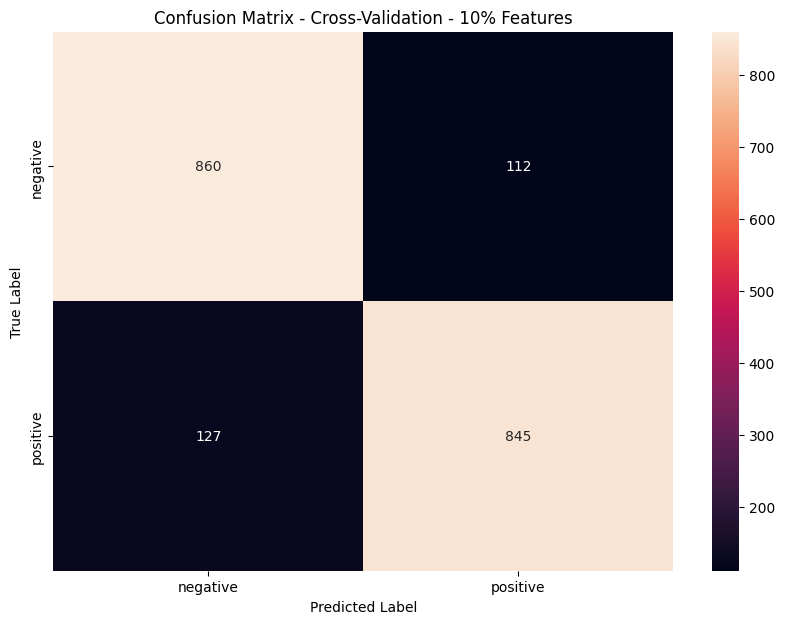

Classification Report - Cross-Validation - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.87      0.88      0.88       972
     Positif       0.88      0.87      0.88       972

    accuracy                           0.88      1944
   macro avg       0.88      0.88      0.88      1944
weighted avg       0.88      0.88      0.88      1944

Cross-Validation Scores (10% features): [0.88888889 0.88425926 0.84259259 0.84259259 0.82407407 0.875
 0.92592593 0.91203704 0.89814815]
Mean Accuracy: 0.8770576131687242
Standard Deviation: 0.03237881683509511
Test Accuracy: 0.8159203980099502
Test Precision: 0.8163003646257178
Test Recall: 0.8159203980099502
Test F1 Score: 0.8160898613949814


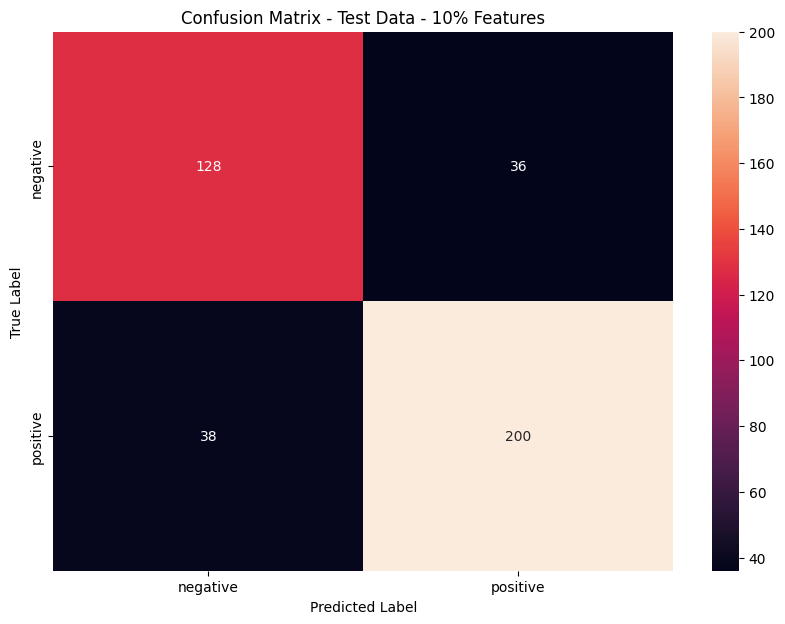

Classification Report - Test Data - 10% Features:
              precision    recall  f1-score   support

     Negatif       0.77      0.78      0.78       164
     Positif       0.85      0.84      0.84       238

    accuracy                           0.82       402
   macro avg       0.81      0.81      0.81       402
weighted avg       0.82      0.82      0.82       402



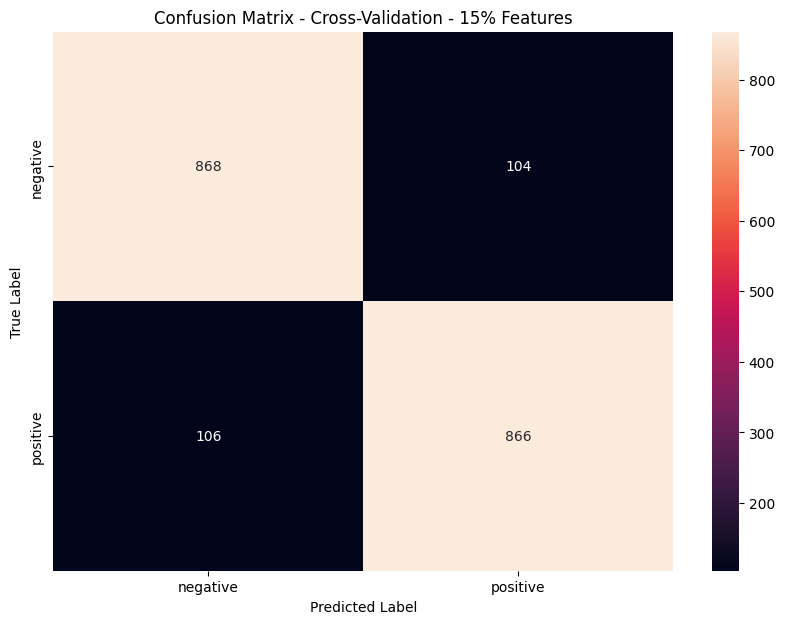

Classification Report - Cross-Validation - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.89      0.89       972
     Positif       0.89      0.89      0.89       972

    accuracy                           0.89      1944
   macro avg       0.89      0.89      0.89      1944
weighted avg       0.89      0.89      0.89      1944

Cross-Validation Scores (15% features): [0.91203704 0.89351852 0.86111111 0.87037037 0.83796296 0.87962963
 0.9212963  0.93055556 0.9212963 ]
Mean Accuracy: 0.8919753086419754
Standard Deviation: 0.030003429159295658
Test Accuracy: 0.835820895522388
Test Precision: 0.8351146083217434
Test Recall: 0.835820895522388
Test F1 Score: 0.8351255088195387


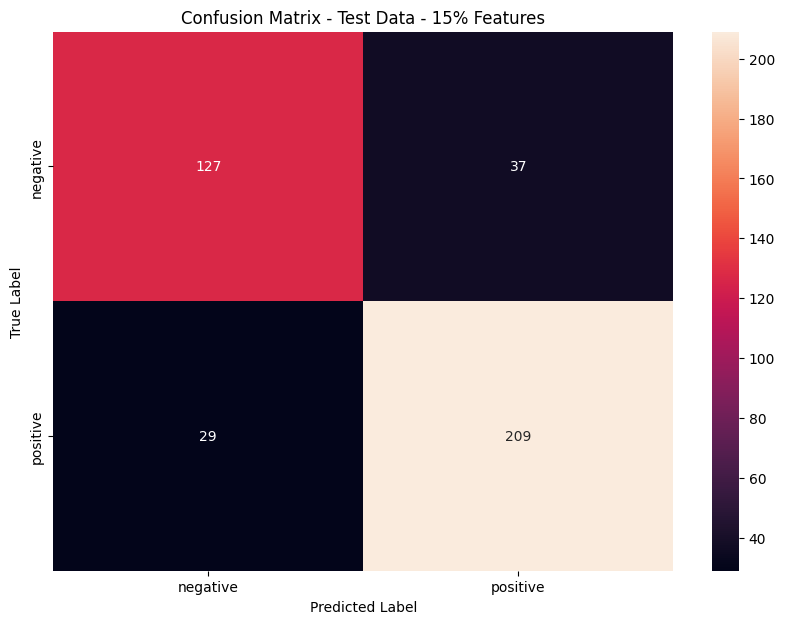

Classification Report - Test Data - 15% Features:
              precision    recall  f1-score   support

     Negatif       0.81      0.77      0.79       164
     Positif       0.85      0.88      0.86       238

    accuracy                           0.84       402
   macro avg       0.83      0.83      0.83       402
weighted avg       0.84      0.84      0.84       402



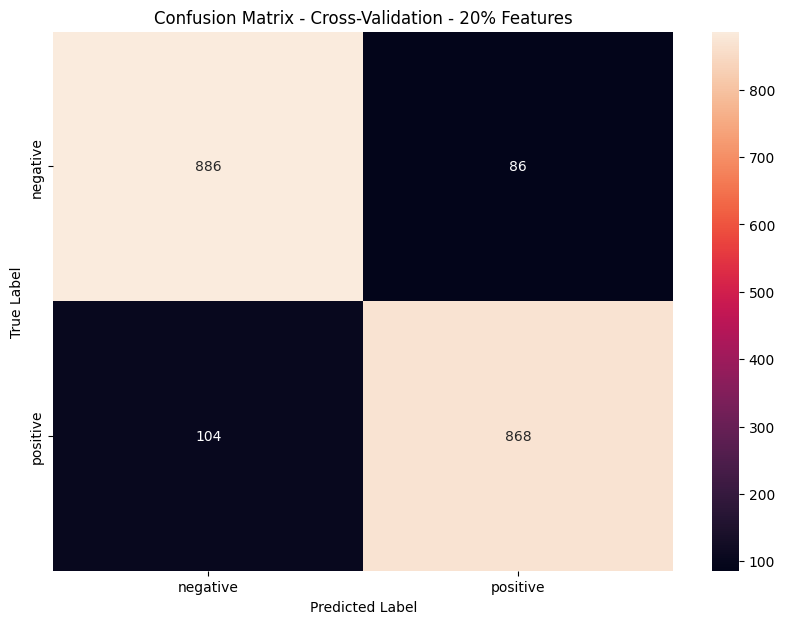

Classification Report - Cross-Validation - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.89      0.91      0.90       972
     Positif       0.91      0.89      0.90       972

    accuracy                           0.90      1944
   macro avg       0.90      0.90      0.90      1944
weighted avg       0.90      0.90      0.90      1944

Cross-Validation Scores (20% features): [0.91666667 0.90740741 0.86111111 0.89351852 0.85648148 0.90740741
 0.92592593 0.93518519 0.91666667]
Mean Accuracy: 0.9022633744855967
Standard Deviation: 0.025771553600566554
Test Accuracy: 0.8731343283582089
Test Precision: 0.8744290244683018
Test Recall: 0.8731343283582089
Test F1 Score: 0.8735130318556471


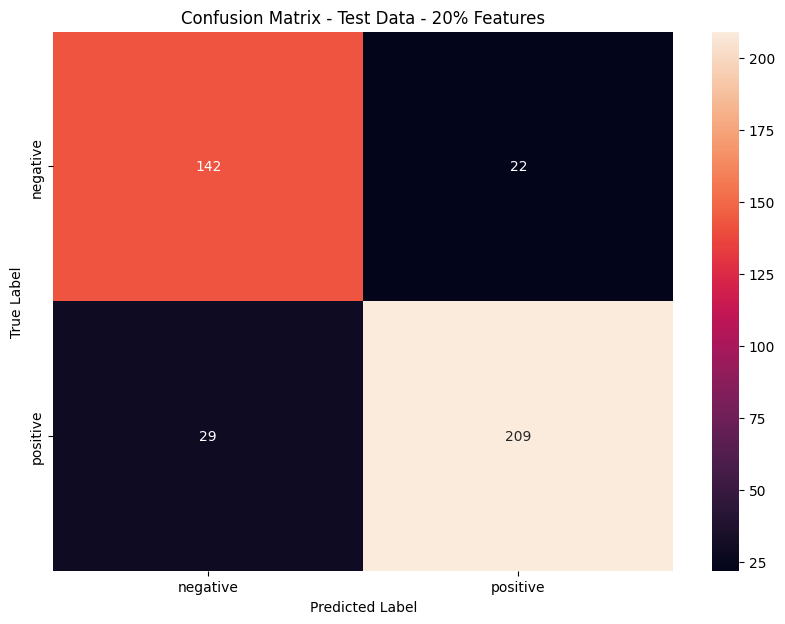

Classification Report - Test Data - 20% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.87      0.85       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



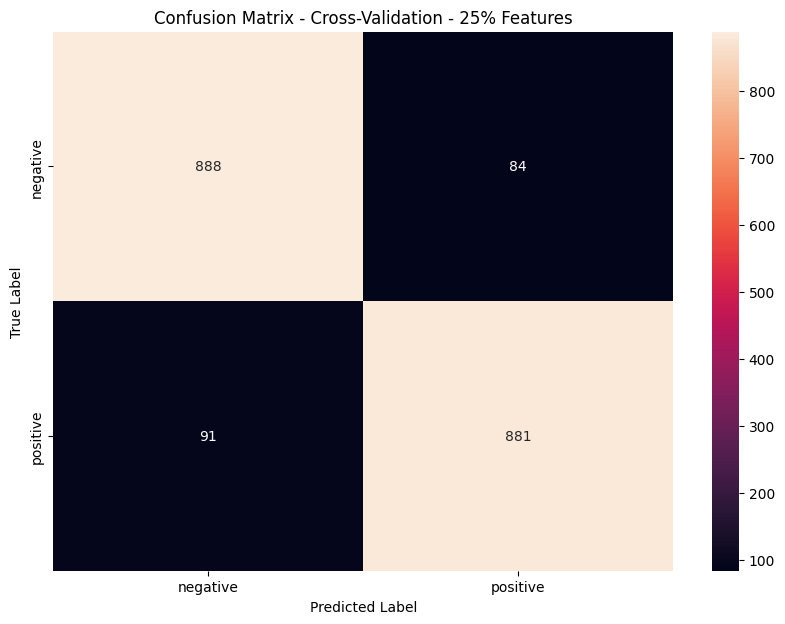

Classification Report - Cross-Validation - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.91      0.91       972
     Positif       0.91      0.91      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (25% features): [0.90277778 0.91203704 0.88888889 0.90740741 0.875      0.90740741
 0.92592593 0.94907407 0.9212963 ]
Mean Accuracy: 0.9099794238683128
Standard Deviation: 0.020134141760062688
Test Accuracy: 0.8681592039800995
Test Precision: 0.8690123549911767
Test Recall: 0.8681592039800995
Test F1 Score: 0.8684492078350811


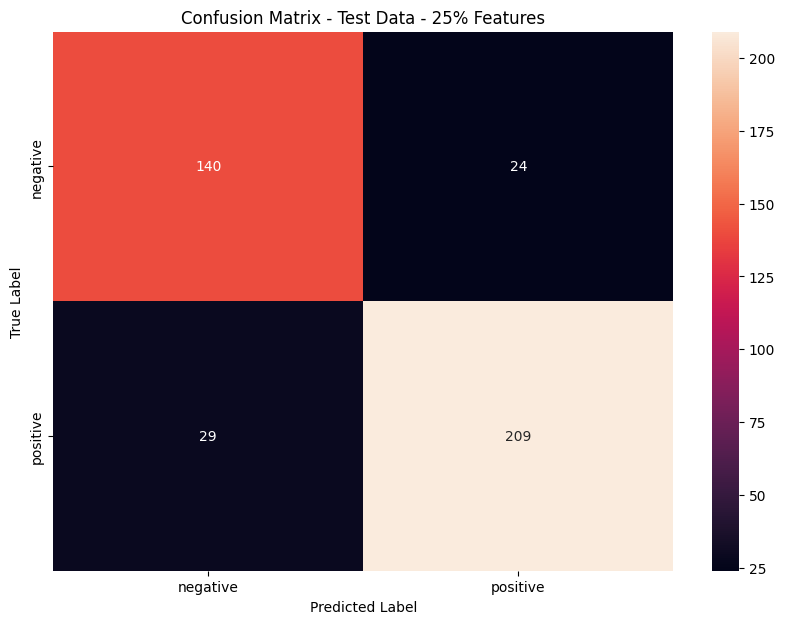

Classification Report - Test Data - 25% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.90      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.87      0.86       402
weighted avg       0.87      0.87      0.87       402



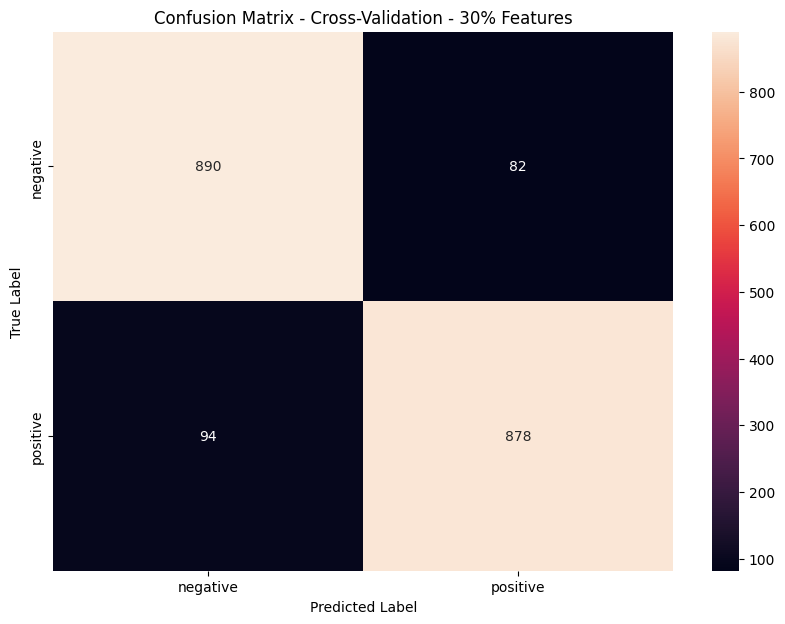

Classification Report - Cross-Validation - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.90      0.92      0.91       972
     Positif       0.91      0.90      0.91       972

    accuracy                           0.91      1944
   macro avg       0.91      0.91      0.91      1944
weighted avg       0.91      0.91      0.91      1944

Cross-Validation Scores (30% features): [0.90277778 0.90740741 0.875      0.90277778 0.875      0.89814815
 0.93055556 0.95833333 0.93518519]
Mean Accuracy: 0.9094650205761317
Standard Deviation: 0.026016807852678597
Test Accuracy: 0.8681592039800995
Test Precision: 0.868616530039318
Test Recall: 0.8681592039800995
Test F1 Score: 0.8683385700471283


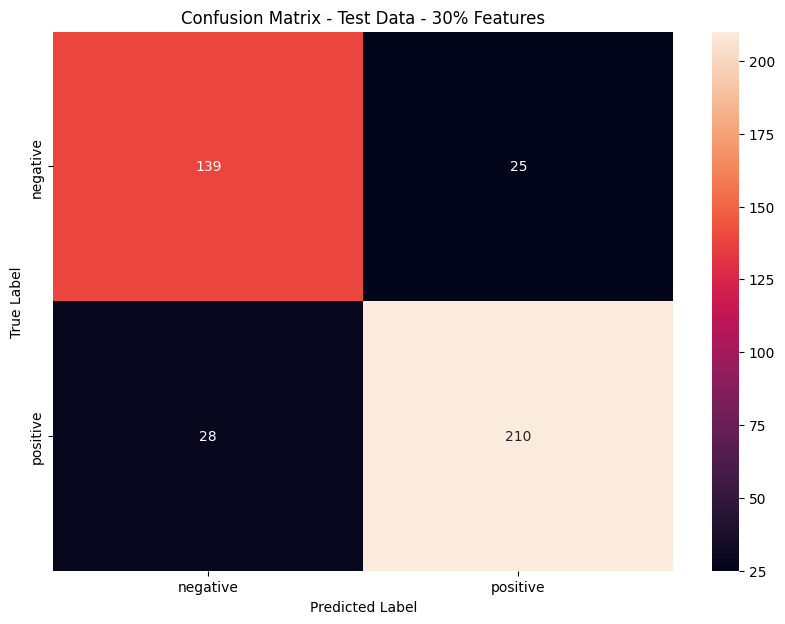

Classification Report - Test Data - 30% Features:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       164
     Positif       0.89      0.88      0.89       238

    accuracy                           0.87       402
   macro avg       0.86      0.86      0.86       402
weighted avg       0.87      0.87      0.87       402



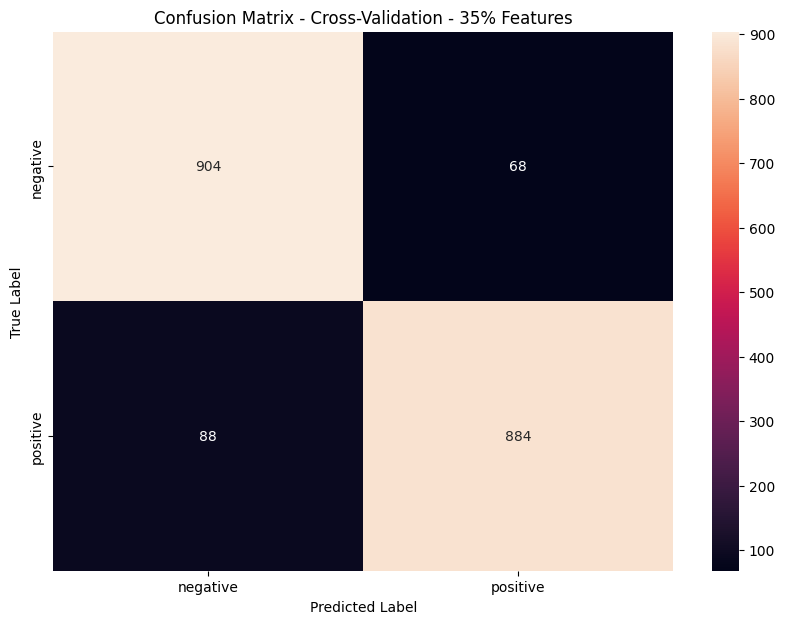

Classification Report - Cross-Validation - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.93      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (35% features): [0.90740741 0.9212963  0.88425926 0.91666667 0.88888889 0.91203704
 0.94444444 0.96296296 0.93981481]
Mean Accuracy: 0.9197530864197532
Standard Deviation: 0.024302493438308037
Test Accuracy: 0.8855721393034826
Test Precision: 0.8865681733321223
Test Recall: 0.8855721393034826
Test F1 Score: 0.8858695438592489


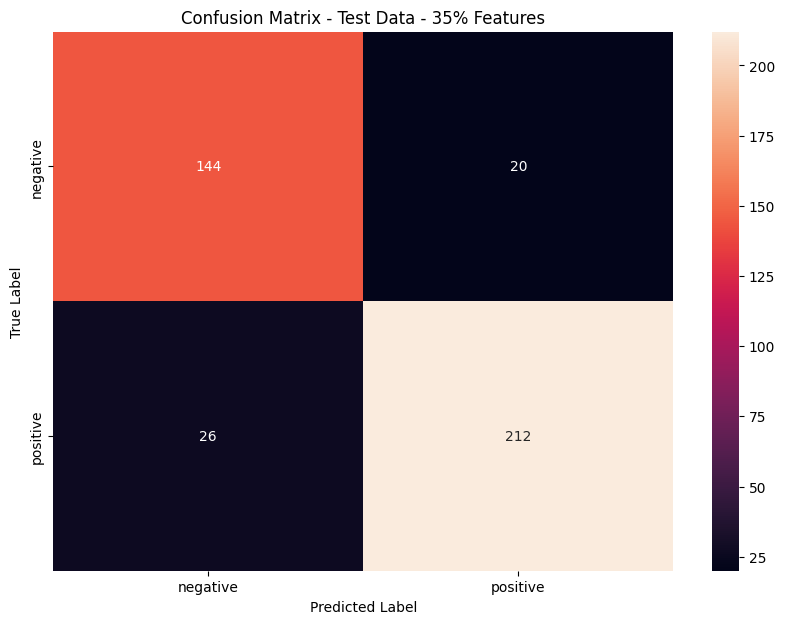

Classification Report - Test Data - 35% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.88      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



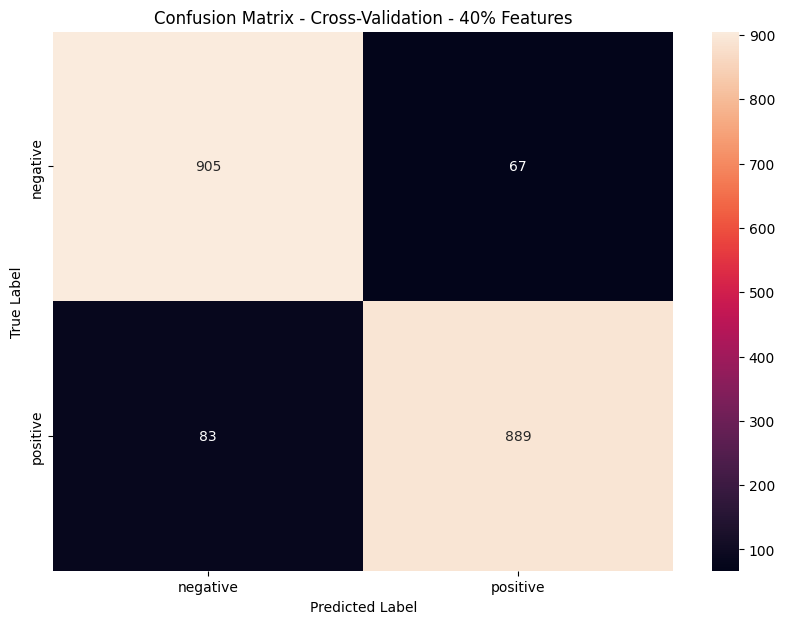

Classification Report - Cross-Validation - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.92       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (40% features): [0.90740741 0.93055556 0.88425926 0.91203704 0.89351852 0.91666667
 0.96296296 0.96296296 0.93518519]
Mean Accuracy: 0.9228395061728395
Standard Deviation: 0.02618914004394618
Test Accuracy: 0.8805970149253731
Test Precision: 0.882106152754931
Test Recall: 0.8805970149253731
Test F1 Score: 0.8809979406994332


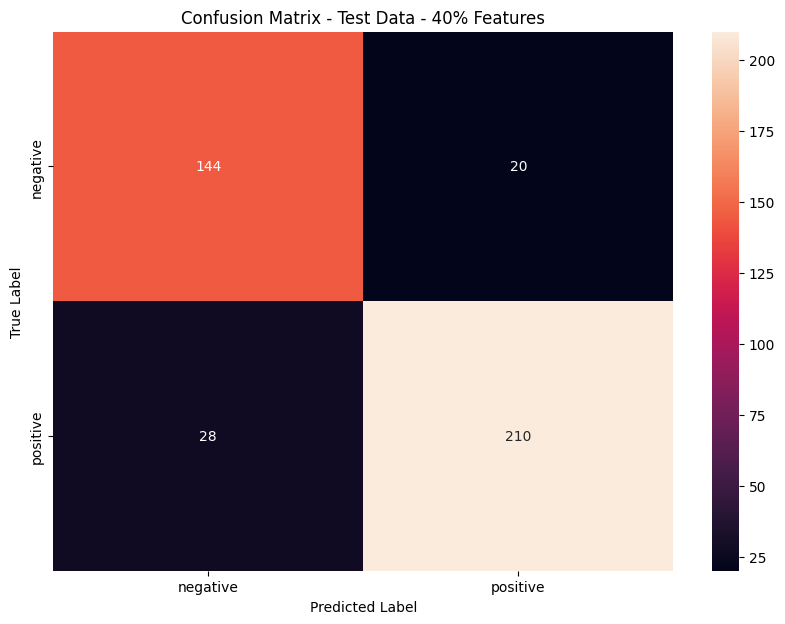

Classification Report - Test Data - 40% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.88      0.86       164
     Positif       0.91      0.88      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



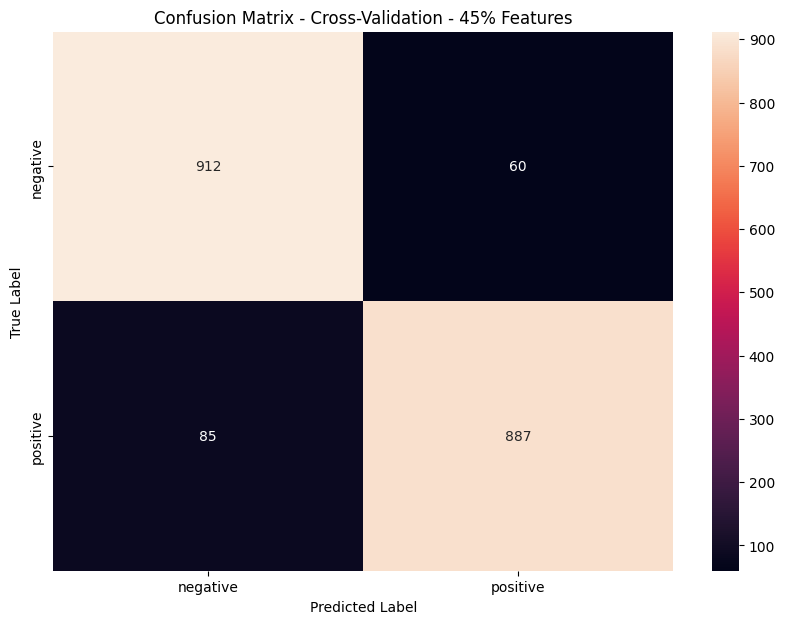

Classification Report - Cross-Validation - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.93       972
     Positif       0.94      0.91      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (45% features): [0.91203704 0.93055556 0.89351852 0.91203704 0.90740741 0.91666667
 0.93981481 0.97222222 0.94444444]
Mean Accuracy: 0.9254115226337447
Standard Deviation: 0.02251653151053424
Test Accuracy: 0.8805970149253731
Test Precision: 0.8805970149253731
Test Recall: 0.8805970149253731
Test F1 Score: 0.8805970149253731


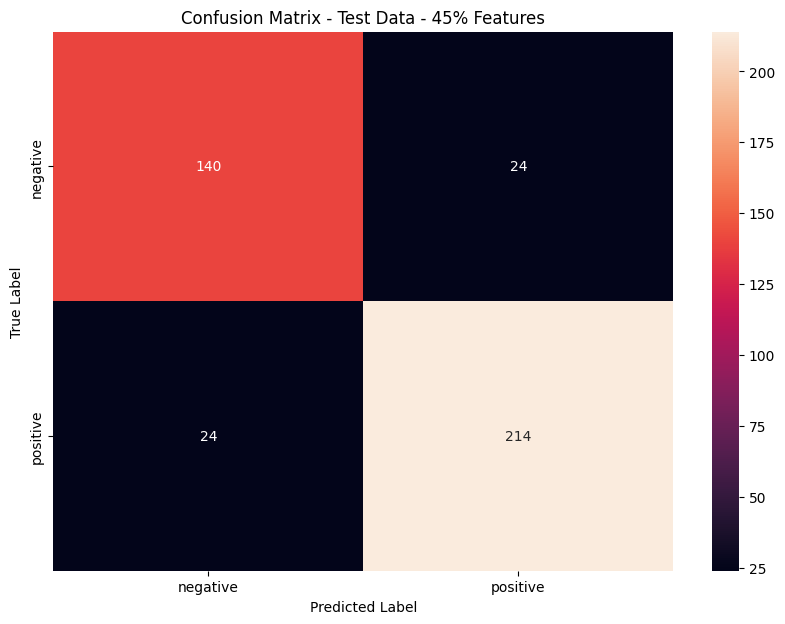

Classification Report - Test Data - 45% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.85      0.85       164
     Positif       0.90      0.90      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



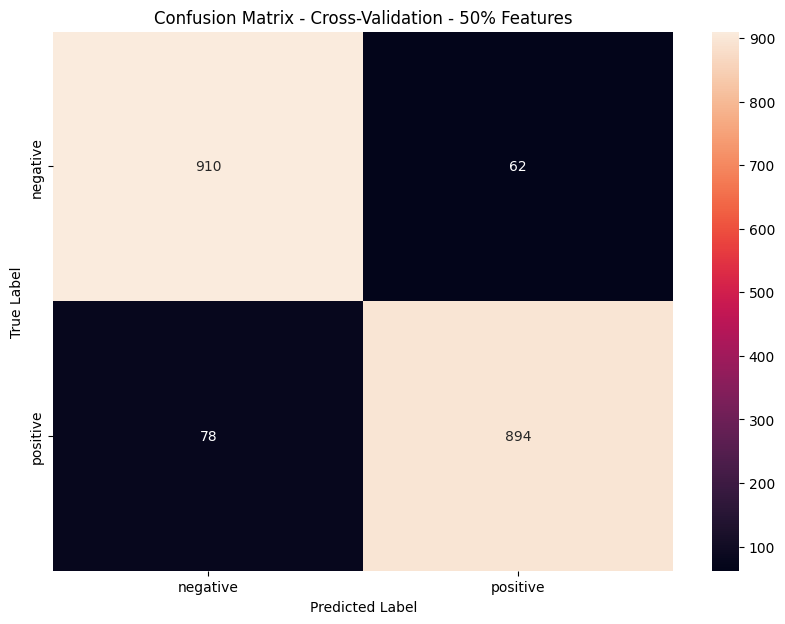

Classification Report - Cross-Validation - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (50% features): [0.91666667 0.93981481 0.89351852 0.90277778 0.91203704 0.9212963
 0.94444444 0.98148148 0.93981481]
Mean Accuracy: 0.9279835390946501
Standard Deviation: 0.02508474349842924
Test Accuracy: 0.8731343283582089
Test Precision: 0.873578723784568
Test Recall: 0.8731343283582089
Test F1 Score: 0.8733069258944066


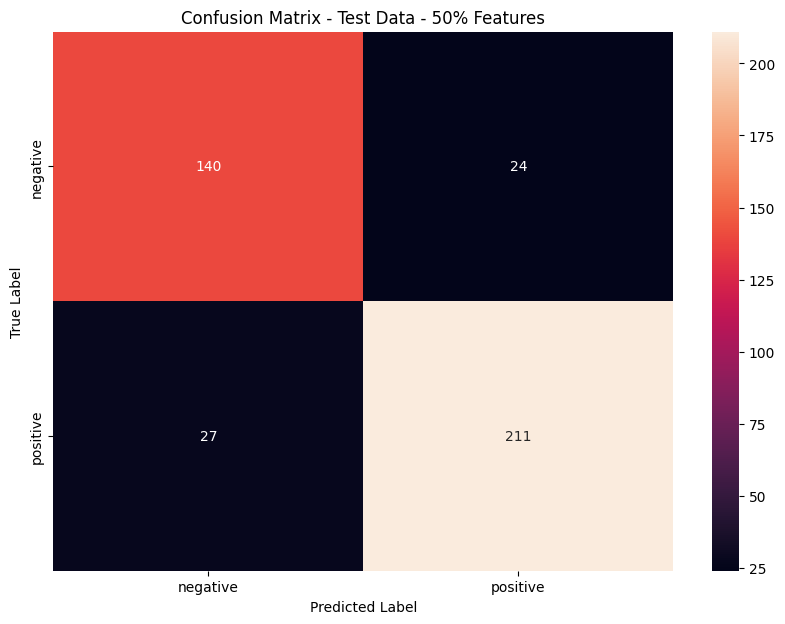

Classification Report - Test Data - 50% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.87       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.87      0.87      0.87       402



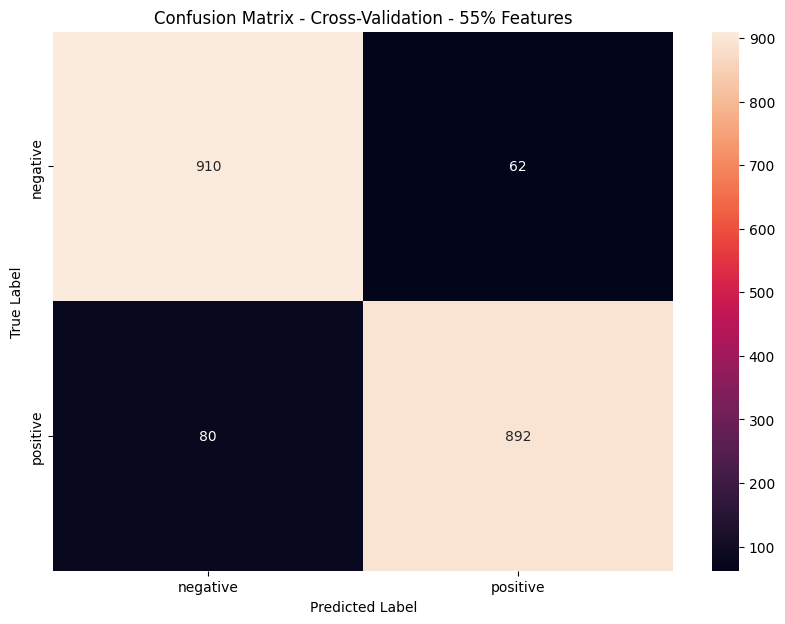

Classification Report - Cross-Validation - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (55% features): [0.91203704 0.93518519 0.88888889 0.91203704 0.90277778 0.9212963
 0.94444444 0.98148148 0.94444444]
Mean Accuracy: 0.9269547325102881
Standard Deviation: 0.026168924571968944
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


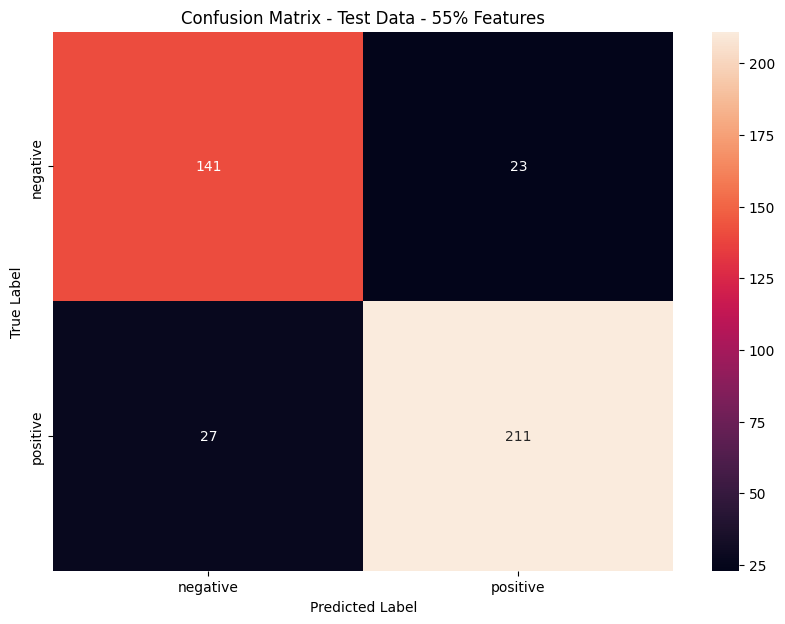

Classification Report - Test Data - 55% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



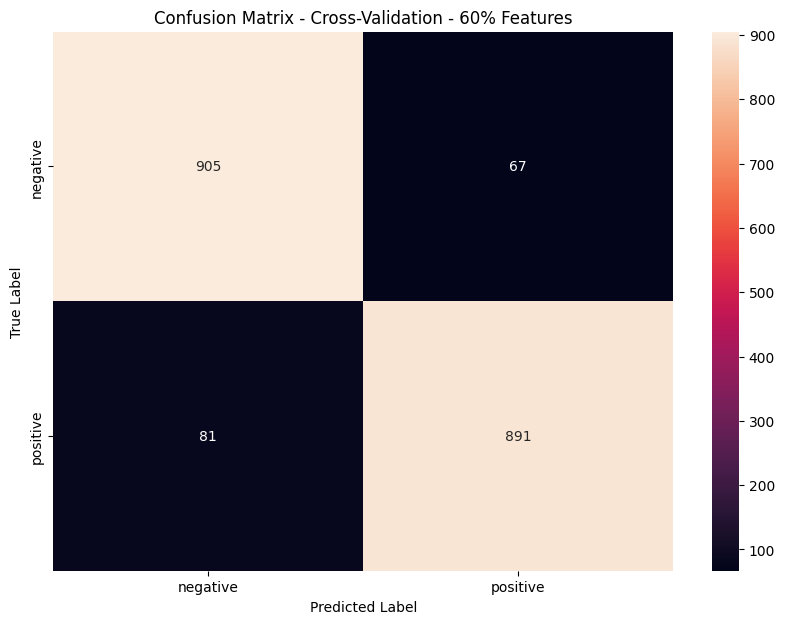

Classification Report - Cross-Validation - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.92       972
     Positif       0.93      0.92      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (60% features): [0.90740741 0.93981481 0.89351852 0.88888889 0.89351852 0.9212963
 0.93055556 0.99074074 0.94907407]
Mean Accuracy: 0.9238683127572016
Standard Deviation: 0.031179799301834853
Test Accuracy: 0.8781094527363185
Test Precision: 0.878540917529818
Test Recall: 0.8781094527363185
Test F1 Score: 0.8782752817416848


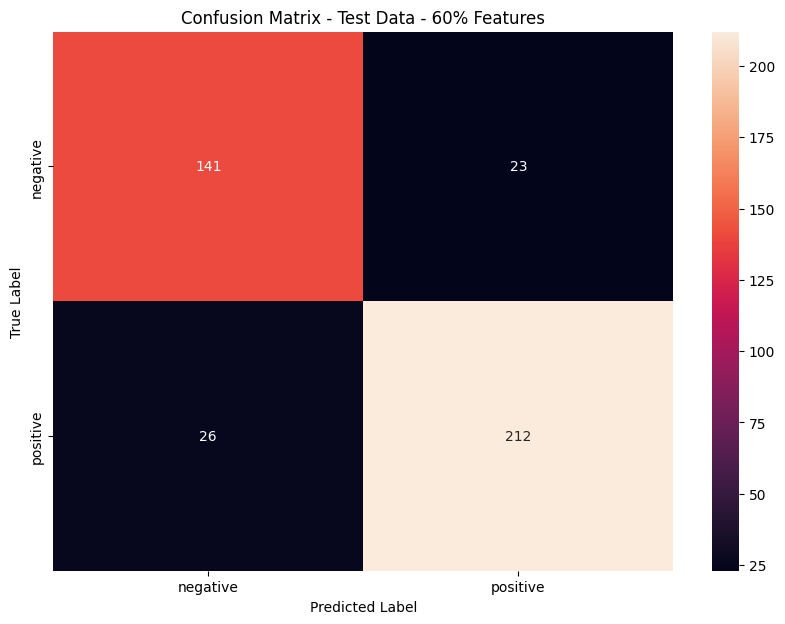

Classification Report - Test Data - 60% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.87      0.88      0.87       402
weighted avg       0.88      0.88      0.88       402



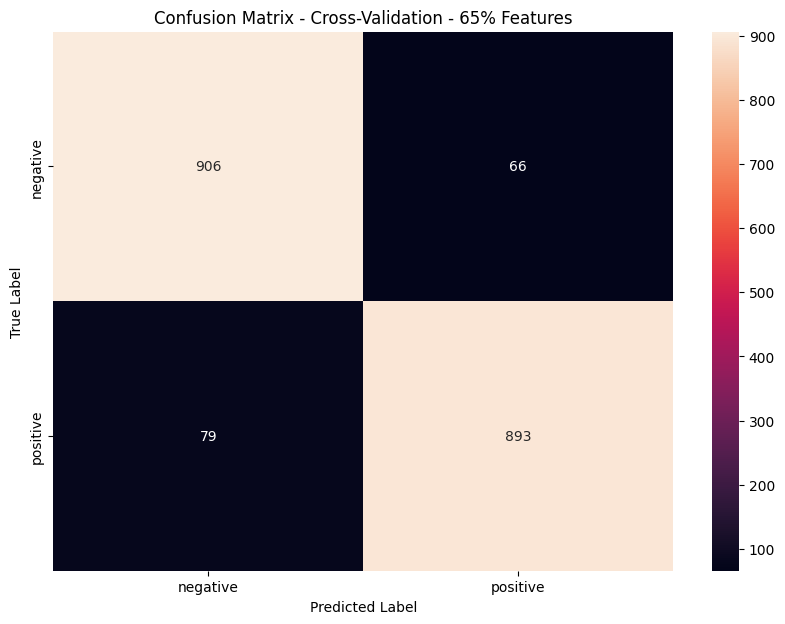

Classification Report - Cross-Validation - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.93      0.93       972
     Positif       0.93      0.92      0.92       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (65% features): [0.91203704 0.94444444 0.88888889 0.88888889 0.89814815 0.9212963
 0.93055556 0.99074074 0.9537037 ]
Mean Accuracy: 0.9254115226337449
Standard Deviation: 0.031734972870755516
Test Accuracy: 0.8756218905472637
Test Precision: 0.8758951820436311
Test Recall: 0.8756218905472637
Test F1 Score: 0.8757363928344468


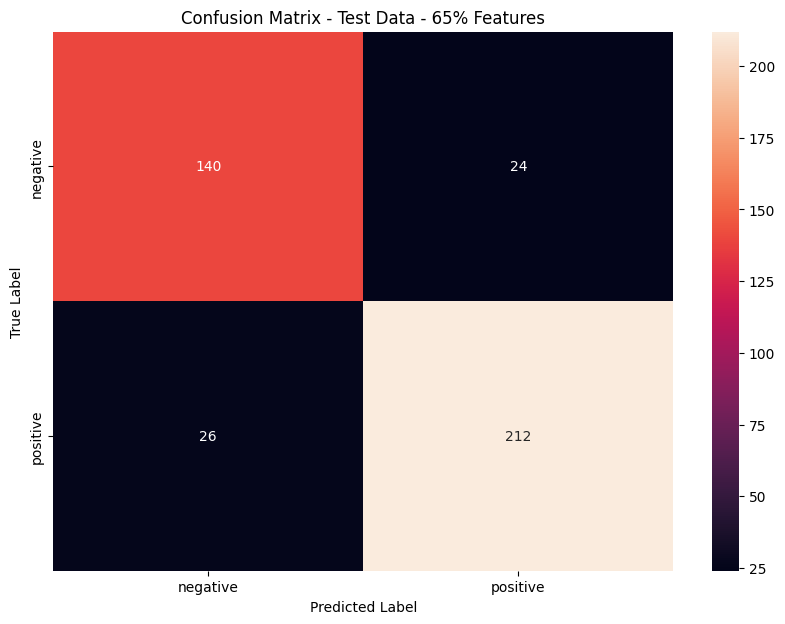

Classification Report - Test Data - 65% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.85      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



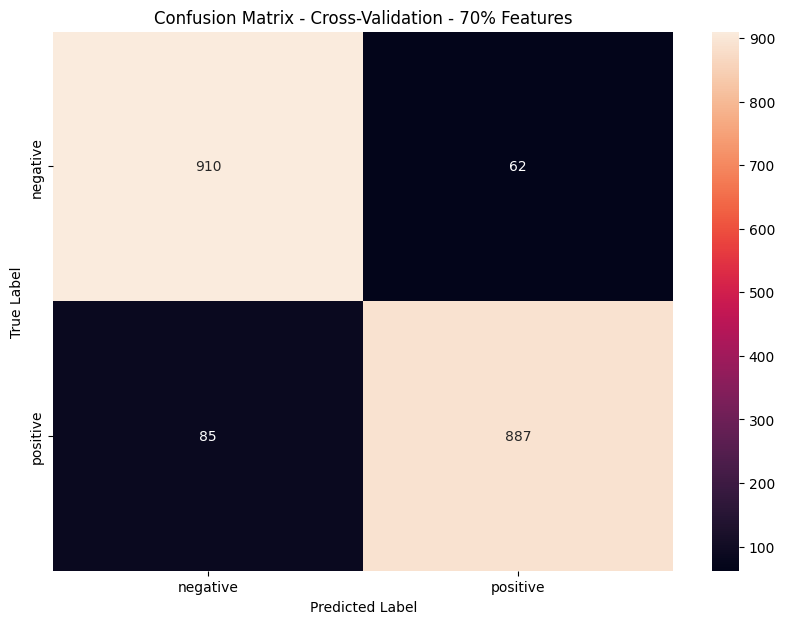

Classification Report - Cross-Validation - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.94      0.93       972
     Positif       0.93      0.91      0.92       972

    accuracy                           0.92      1944
   macro avg       0.92      0.92      0.92      1944
weighted avg       0.92      0.92      0.92      1944

Cross-Validation Scores (70% features): [0.90277778 0.93518519 0.89814815 0.88888889 0.90277778 0.91203704
 0.94444444 0.98611111 0.94907407]
Mean Accuracy: 0.9243827160493827
Standard Deviation: 0.029764354200595554
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


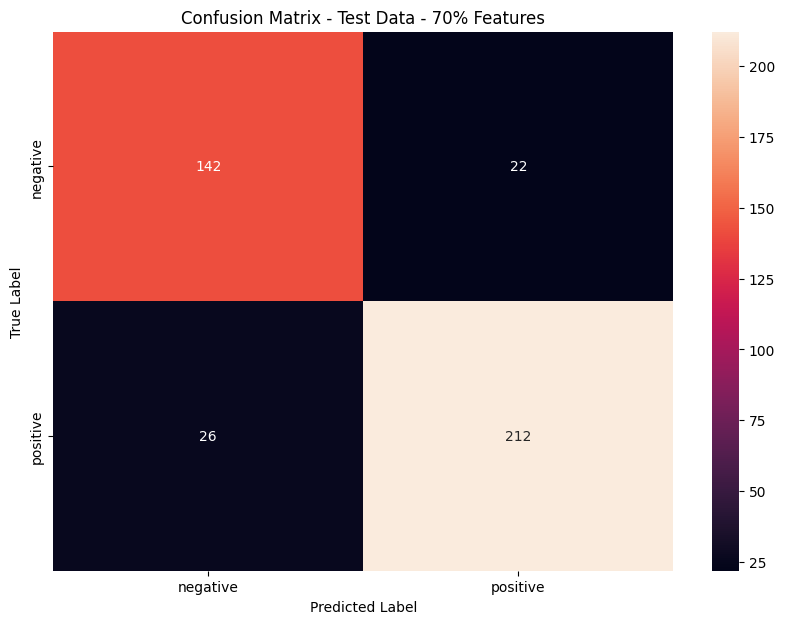

Classification Report - Test Data - 70% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



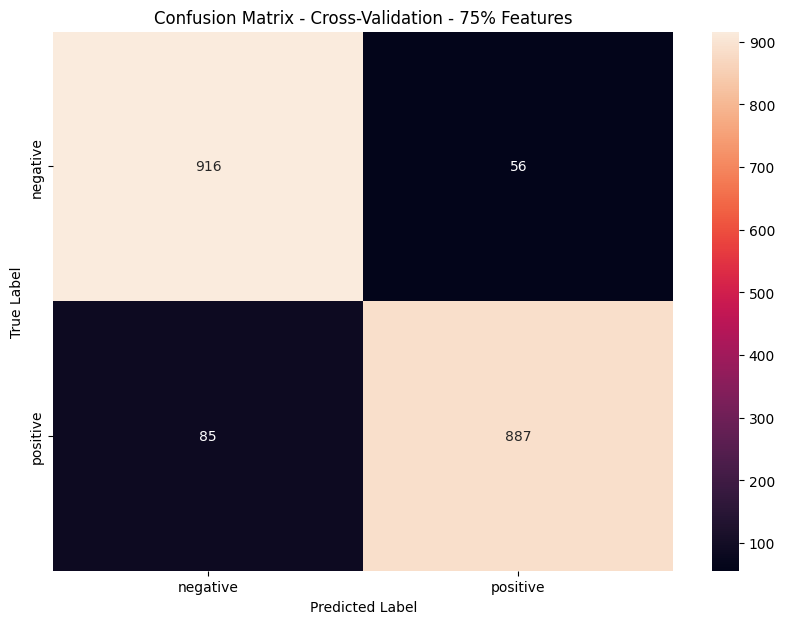

Classification Report - Cross-Validation - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (75% features): [0.90277778 0.93518519 0.90740741 0.90740741 0.89814815 0.92592593
 0.93981481 0.98611111 0.94444444]
Mean Accuracy: 0.927469135802469
Standard Deviation: 0.026279917231367907
Test Accuracy: 0.8756218905472637
Test Precision: 0.8762430217654098
Test Recall: 0.8756218905472637
Test F1 Score: 0.8758441303793469


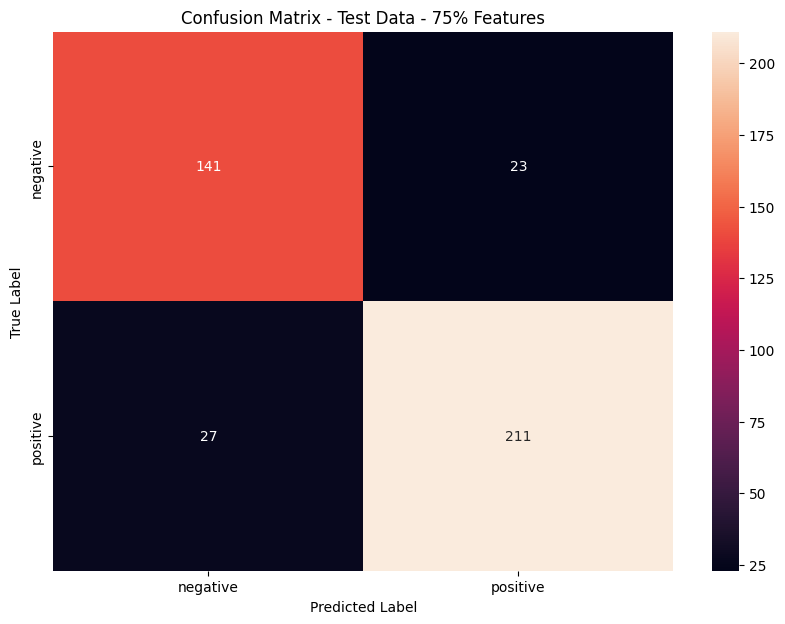

Classification Report - Test Data - 75% Features:
              precision    recall  f1-score   support

     Negatif       0.84      0.86      0.85       164
     Positif       0.90      0.89      0.89       238

    accuracy                           0.88       402
   macro avg       0.87      0.87      0.87       402
weighted avg       0.88      0.88      0.88       402



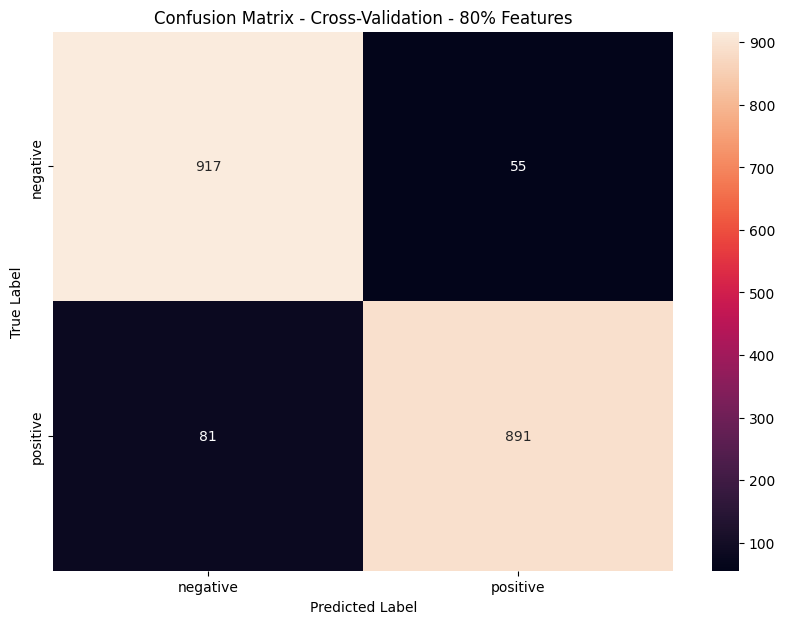

Classification Report - Cross-Validation - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.94      0.93       972
     Positif       0.94      0.92      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (80% features): [0.91203704 0.93518519 0.90740741 0.91203704 0.90740741 0.92592593
 0.94444444 0.98611111 0.93981481]
Mean Accuracy: 0.9300411522633745
Standard Deviation: 0.02395153647494406
Test Accuracy: 0.8805970149253731
Test Precision: 0.8812014409029334
Test Recall: 0.8805970149253731
Test F1 Score: 0.880810365164173


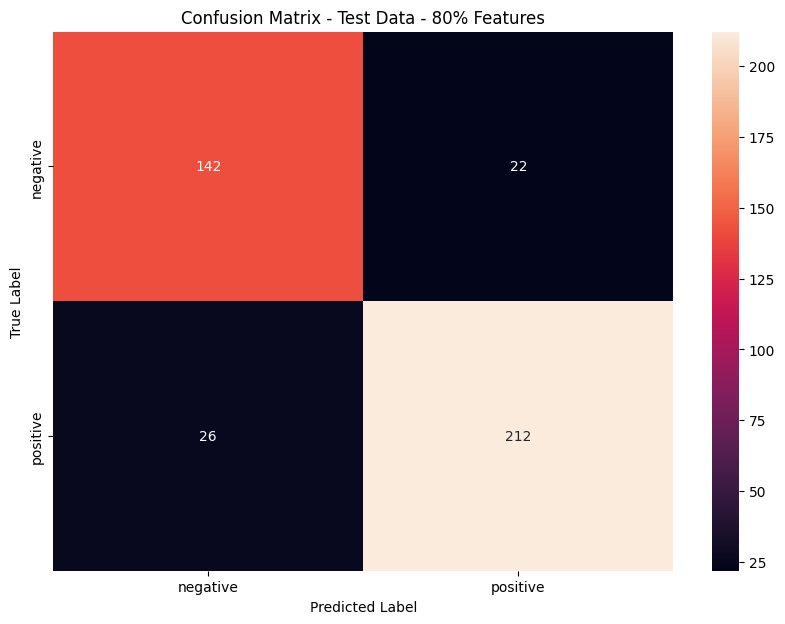

Classification Report - Test Data - 80% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.87      0.86       164
     Positif       0.91      0.89      0.90       238

    accuracy                           0.88       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.88      0.88      0.88       402



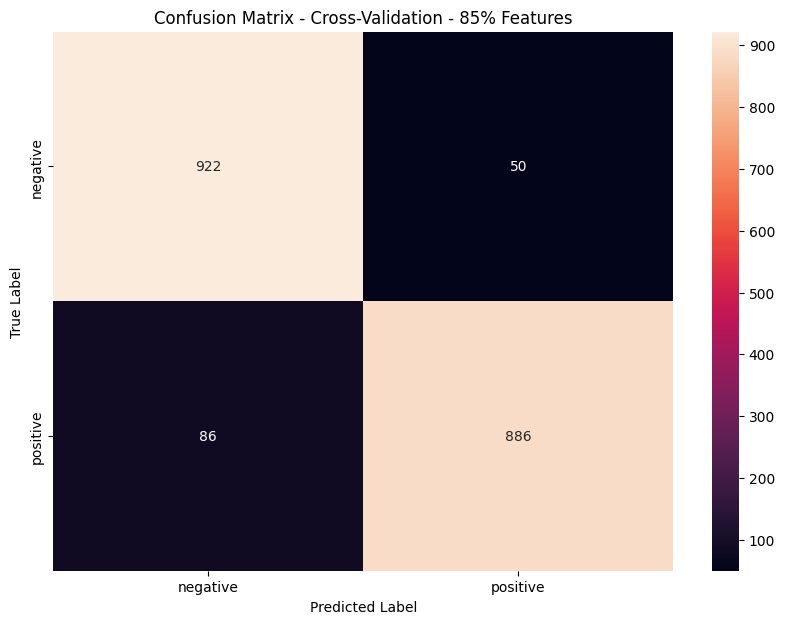

Classification Report - Cross-Validation - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.91      0.95      0.93       972
     Positif       0.95      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (85% features): [0.91666667 0.92592593 0.91666667 0.91203704 0.91666667 0.9212963
 0.93518519 0.98148148 0.94444444]
Mean Accuracy: 0.9300411522633745
Standard Deviation: 0.0206403319421182
Test Accuracy: 0.8930348258706468
Test Precision: 0.8942237245457983
Test Recall: 0.8930348258706468
Test F1 Score: 0.8933541248978986


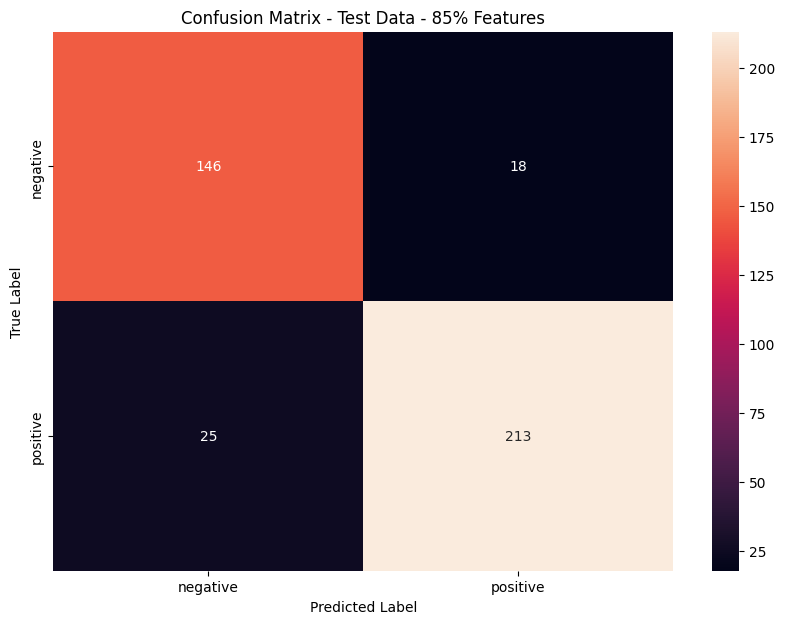

Classification Report - Test Data - 85% Features:
              precision    recall  f1-score   support

     Negatif       0.85      0.89      0.87       164
     Positif       0.92      0.89      0.91       238

    accuracy                           0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



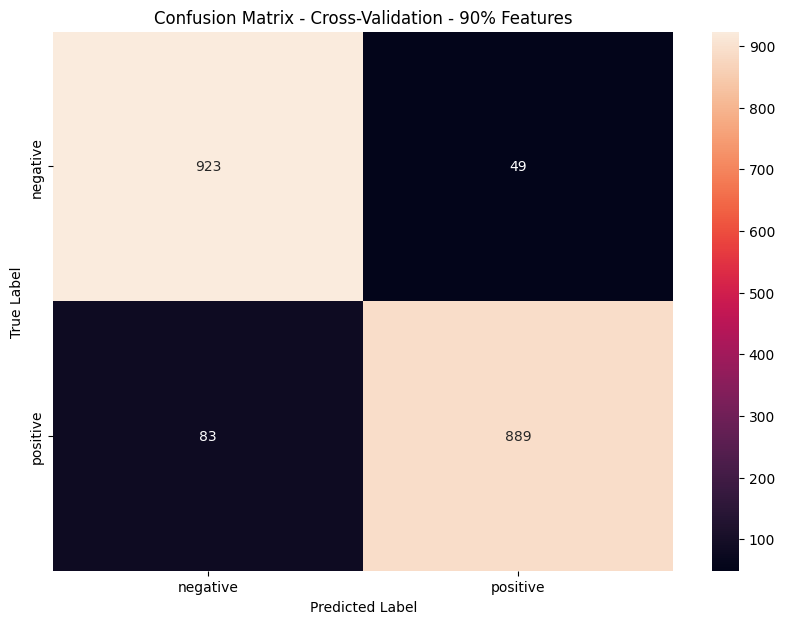

Classification Report - Cross-Validation - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.92      0.95      0.93       972
     Positif       0.95      0.91      0.93       972

    accuracy                           0.93      1944
   macro avg       0.93      0.93      0.93      1944
weighted avg       0.93      0.93      0.93      1944

Cross-Validation Scores (90% features): [0.91666667 0.93055556 0.90740741 0.91666667 0.93518519 0.92592593
 0.92592593 0.98148148 0.94907407]
Mean Accuracy: 0.9320987654320988
Standard Deviation: 0.02081903944943217
Test Accuracy: 0.900497512437811
Test Precision: 0.9014231580434542
Test Recall: 0.900497512437811
Test F1 Score: 0.9007561250949989


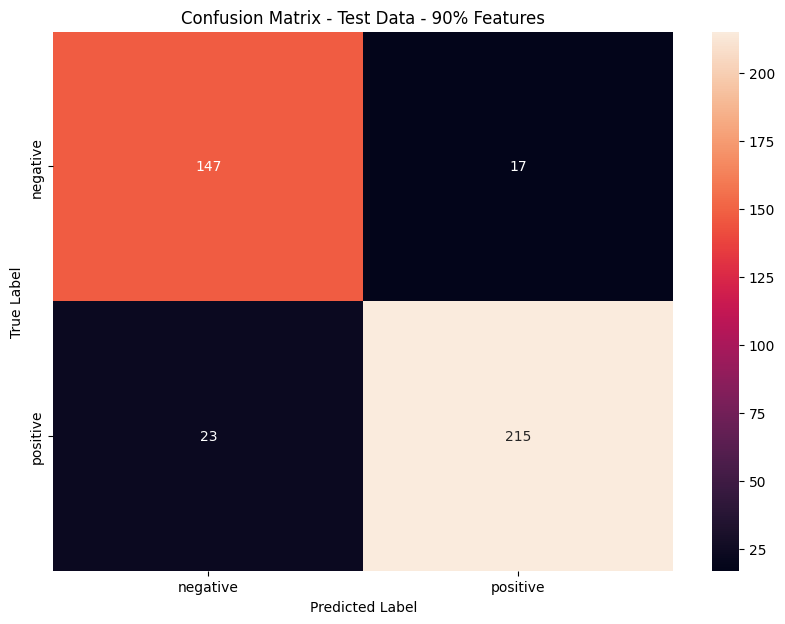

Classification Report - Test Data - 90% Features:
              precision    recall  f1-score   support

     Negatif       0.86      0.90      0.88       164
     Positif       0.93      0.90      0.91       238

    accuracy                           0.90       402
   macro avg       0.90      0.90      0.90       402
weighted avg       0.90      0.90      0.90       402



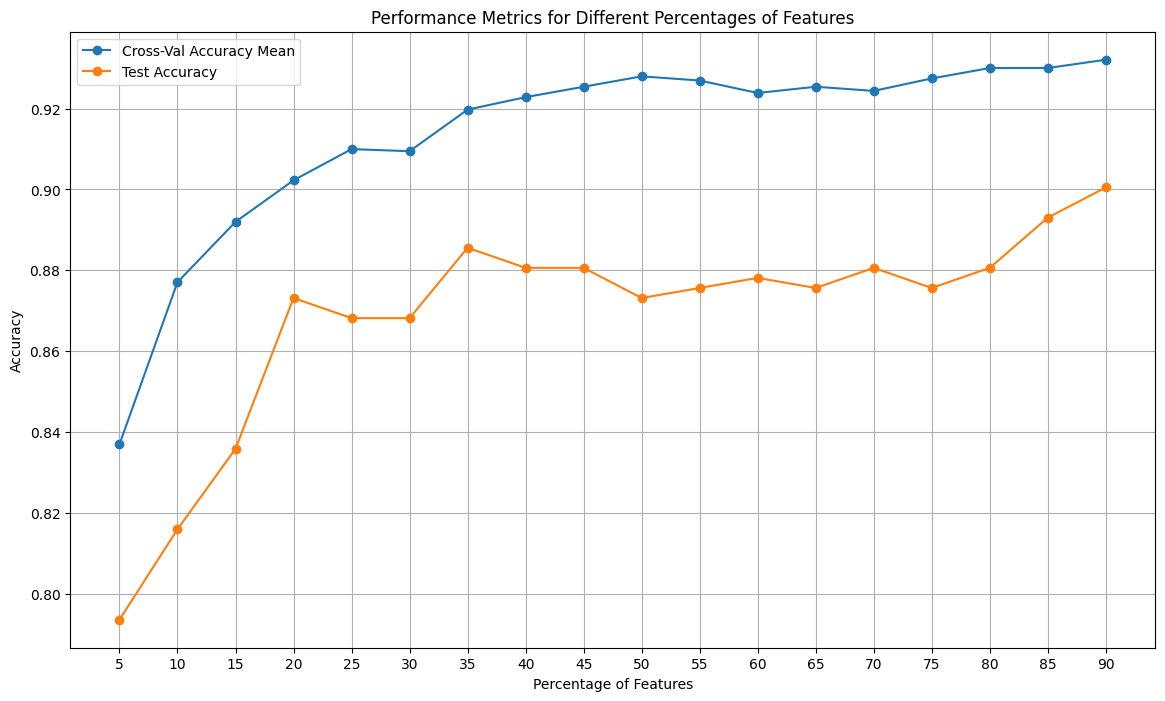

In [81]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/labellingfix.csv')
y = data['Sentimen']
tf_idf = pd.read_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/tfidffix.csv')

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size=0.2, shuffle=True, random_state=42)

# Penerapan SMOTE untuk menyeimbangkan data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menyimpan hasil resampling untuk digunakan nanti
pd.DataFrame(X_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/X_train_resampled.csv', index=False)
pd.Series(y_train_resampled).to_csv('/content/drive/MyDrive/Skripsi/Program Skripsi/Hasil/y_train_resampled.csv', index=False)

# Menampilkan hasil SMOTE
print("Sebelum SMOTE:")
print(y_train.value_counts())
print("\nSetelah SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Daftar persentase fitur yang akan dievaluasi
persen_fitur_list = range(5, 95, 5)

# Menyimpan hasil performa untuk setiap persentase fitur
all_performances = []


# Melakukan seleksi fitur dan evaluasi model
for persen_fitur in persen_fitur_list:
    # Menentukan jumlah fitur yang akan dipilih
    num_feature_to_select = int(persen_fitur * X_train_resampled.shape[1] / 100)

    # Seleksi fitur menggunakan SelectKBest dengan Chi-Square
    selector = SelectKBest(chi2, k=num_feature_to_select)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Membuat model SVM
    modelsvm = SVC(kernel='linear', gamma=0.01, C=1)

    # Menggunakan k-fold cross-validation dengan k=9
    k = 9
    scores = cross_val_score(modelsvm, X_train_selected, y_train_resampled, cv=k)
    y_train_pred = cross_val_predict(modelsvm, X_train_selected, y_train_resampled, cv=k)

    # Confusion Matrix untuk cross-validation
    conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
    class_label = ["negative", "positive"]
    df_cm = pd.DataFrame(conf_matrix, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Cross-Validation - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report
    print(f"Classification Report - Cross-Validation - {persen_fitur}% Features:")
    print(classification_report(y_train_resampled, y_train_pred))

    # Menampilkan performa cross-validation
    print(f"Cross-Validation Scores ({persen_fitur}% features): {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

    # Melatih model dengan seluruh data latih
    modelsvm.fit(X_train_selected, y_train_resampled)

    # Memprediksi data uji
    y_pred = modelsvm.predict(X_test_selected)

    # Menghitung performa pada data uji
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Test Accuracy: {accuracy}")
    print(f"Test Precision: {precision}")
    print(f"Test Recall: {recall}")
    print(f"Test F1 Score: {f1}")

    # Confusion Matrix untuk data uji
    conf_matrix_test = confusion_matrix(y_test, y_pred)
    df_cm_test = pd.DataFrame(conf_matrix_test, index=class_label, columns=class_label)

    # Visualisasi Confusion Matrix untuk data uji
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm_test, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - Test Data - {persen_fitur}% Features")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Print classification report untuk data uji
    print(f"Classification Report - Test Data - {persen_fitur}% Features:")
    print(classification_report(y_test, y_pred))

    # Menyimpan hasil performa
    performance = {
        'persen_fitur': persen_fitur,
        'cross_val_accuracy_mean': scores.mean(),
        'cross_val_accuracy_std': scores.std(),
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1
    }
    all_performances.append(performance)

# Visualisasi performa berdasarkan persentase fitur
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


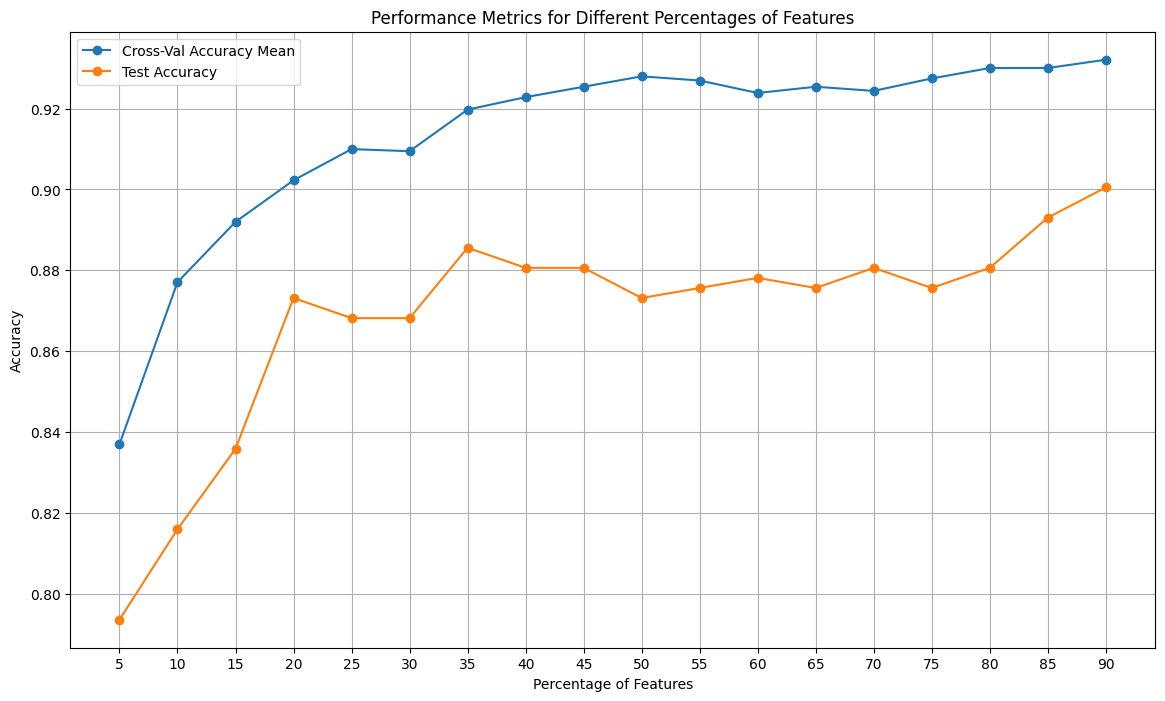

In [82]:
df_performance = pd.DataFrame(all_performances)

plt.figure(figsize=(14, 8))
plt.plot(df_performance['persen_fitur'], df_performance['cross_val_accuracy_mean'], marker='o', label='Cross-Val Accuracy Mean')
plt.plot(df_performance['persen_fitur'], df_performance['test_accuracy'], marker='o', label='Test Accuracy')

# Mengatur label x-axis agar menampilkan persentase fitur secara lengkap
plt.xticks(df_performance['persen_fitur'])

plt.title('Performance Metrics for Different Percentages of Features')
plt.xlabel('Percentage of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()